In [6]:
import matplotlib.pyplot as plt
import csv
import gym
import gym.spaces
import numpy as np
import random

In [7]:

def randomagent(prints=False):
    # Initializing the list of scores
    scores = []
    
    # Creating the gym environment
    env = gym.make("Taxi-v2")

    # Amount of games the agent plays
    episodes = 50000

    # Maximum steps the agent has per episode
    max_steps = 100

    for episode in range(episodes):
        # Reset the state, done and score before every episode
        env.reset()
        done = False
        score = 0

        for _ in range(max_steps):
            # Act randomly until done or maximum steps reached
            action = env.action_space.sample()
            _, reward, done, _ = env.step(action)
            score += reward
            if done:
                break
        
        scores.append(score)
        if prints:
            print("Episode: {}/{}, score: {}".format(episode+1, episodes, score))

    return scores



#randomagent(prints=True)

In [8]:
def taxiagent(prints=False):
    # List of all scores
    scores = []
    
    # Creating the gym environment
    env = gym.make("Taxi-v2")

    # Initializing the Q-table of size state-space x action-space with zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Set the hyper-parameters
    epsilon = 1.0
    epsilon_min = 0.005
    epsilon_decay = 0.99993
    episodes = 50000
    max_steps = 100
    learning_rate = 0.65
    gamma = 0.65

    for episode in range(episodes):
        # Reset the game-state, done and score before every episode
        state = env.reset()
        done = False
        score = 0

        for _ in range(max_steps):
            # With the probabilty of (1 - epsilon) take the best action in our Q-table
            if random.uniform(0, 1) > epsilon:
                action = np.argmax(Q[state, :])
            # Else take a random action
            else:
                action = env.action_space.sample()

            # Step the game forward
            next_state, reward, done, _ = env.step(action)

            # Add up the score
            score += reward

            # Update our Q-table with our Q-function
            Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + gamma * np.max(Q[next_state,:]))

            # Set the next state as the current state
            state = next_state

            if done:
                break
        
        # Reducing our epsilon each episode (Exploration-Exploitation trade-off)
        if epsilon >= epsilon_min:
            epsilon *= epsilon_decay

        scores.append(score)
        
        if prints:
            print("Episode: {}/{}, score: {}".format(episode+1, episodes, score))
    
    return scores



#taxiagent(prints=True)

In [11]:
# Calculate the scores of both agents
random_agent_scores = randomagent(prints=True)
q_agent_scores = taxiagent(prints=True)

Episode: 1/50000, score: -352
Episode: 2/50000, score: -406
Episode: 3/50000, score: -352
Episode: 4/50000, score: -415
Episode: 5/50000, score: -433
Episode: 6/50000, score: -397
Episode: 7/50000, score: -406
Episode: 8/50000, score: -379
Episode: 9/50000, score: -370
Episode: 10/50000, score: -352
Episode: 11/50000, score: -451
Episode: 12/50000, score: -334
Episode: 13/50000, score: -379
Episode: 14/50000, score: -388
Episode: 15/50000, score: -343
Episode: 16/50000, score: -334
Episode: 17/50000, score: -388
Episode: 18/50000, score: -478
Episode: 19/50000, score: -388
Episode: 20/50000, score: -370
Episode: 21/50000, score: -469
Episode: 22/50000, score: -424
Episode: 23/50000, score: -379
Episode: 24/50000, score: -487
Episode: 25/50000, score: -433
Episode: 26/50000, score: -334
Episode: 27/50000, score: -370
Episode: 28/50000, score: -370
Episode: 29/50000, score: -388
Episode: 30/50000, score: -289
Episode: 31/50000, score: -370
Episode: 32/50000, score: -379
Episode: 33/50000

Episode: 435/50000, score: -433
Episode: 436/50000, score: -397
Episode: 437/50000, score: -388
Episode: 438/50000, score: -460
Episode: 439/50000, score: -388
Episode: 440/50000, score: -343
Episode: 441/50000, score: -424
Episode: 442/50000, score: -379
Episode: 443/50000, score: -352
Episode: 444/50000, score: -370
Episode: 445/50000, score: -334
Episode: 446/50000, score: -370
Episode: 447/50000, score: -397
Episode: 448/50000, score: -460
Episode: 449/50000, score: -334
Episode: 450/50000, score: -469
Episode: 451/50000, score: -397
Episode: 452/50000, score: -415
Episode: 453/50000, score: -352
Episode: 454/50000, score: -343
Episode: 455/50000, score: -352
Episode: 456/50000, score: -352
Episode: 457/50000, score: -451
Episode: 458/50000, score: -451
Episode: 459/50000, score: -451
Episode: 460/50000, score: -415
Episode: 461/50000, score: -460
Episode: 462/50000, score: -442
Episode: 463/50000, score: -370
Episode: 464/50000, score: -433
Episode: 465/50000, score: -460
Episode:

Episode: 853/50000, score: -352
Episode: 854/50000, score: -433
Episode: 855/50000, score: -388
Episode: 856/50000, score: -316
Episode: 857/50000, score: -289
Episode: 858/50000, score: -334
Episode: 859/50000, score: -343
Episode: 860/50000, score: -370
Episode: 861/50000, score: -397
Episode: 862/50000, score: -379
Episode: 863/50000, score: -442
Episode: 864/50000, score: -352
Episode: 865/50000, score: -406
Episode: 866/50000, score: -388
Episode: 867/50000, score: -343
Episode: 868/50000, score: -415
Episode: 869/50000, score: -397
Episode: 870/50000, score: -316
Episode: 871/50000, score: -352
Episode: 872/50000, score: -361
Episode: 873/50000, score: -406
Episode: 874/50000, score: -415
Episode: 875/50000, score: -343
Episode: 876/50000, score: -406
Episode: 877/50000, score: -415
Episode: 878/50000, score: -370
Episode: 879/50000, score: -352
Episode: 880/50000, score: -424
Episode: 881/50000, score: -379
Episode: 882/50000, score: -361
Episode: 883/50000, score: -388
Episode:

Episode: 1276/50000, score: -424
Episode: 1277/50000, score: -325
Episode: 1278/50000, score: -379
Episode: 1279/50000, score: -352
Episode: 1280/50000, score: -307
Episode: 1281/50000, score: -379
Episode: 1282/50000, score: -379
Episode: 1283/50000, score: -388
Episode: 1284/50000, score: -460
Episode: 1285/50000, score: -343
Episode: 1286/50000, score: -415
Episode: 1287/50000, score: -370
Episode: 1288/50000, score: -334
Episode: 1289/50000, score: -397
Episode: 1290/50000, score: -361
Episode: 1291/50000, score: -370
Episode: 1292/50000, score: -415
Episode: 1293/50000, score: -379
Episode: 1294/50000, score: -460
Episode: 1295/50000, score: -424
Episode: 1296/50000, score: -352
Episode: 1297/50000, score: -424
Episode: 1298/50000, score: -361
Episode: 1299/50000, score: -433
Episode: 1300/50000, score: -460
Episode: 1301/50000, score: -343
Episode: 1302/50000, score: -352
Episode: 1303/50000, score: -397
Episode: 1304/50000, score: -370
Episode: 1305/50000, score: -424
Episode: 1

Episode: 1720/50000, score: -478
Episode: 1721/50000, score: -370
Episode: 1722/50000, score: -271
Episode: 1723/50000, score: -487
Episode: 1724/50000, score: -361
Episode: 1725/50000, score: -406
Episode: 1726/50000, score: -361
Episode: 1727/50000, score: -397
Episode: 1728/50000, score: -379
Episode: 1729/50000, score: -415
Episode: 1730/50000, score: -397
Episode: 1731/50000, score: -379
Episode: 1732/50000, score: -388
Episode: 1733/50000, score: -424
Episode: 1734/50000, score: -406
Episode: 1735/50000, score: -388
Episode: 1736/50000, score: -334
Episode: 1737/50000, score: -433
Episode: 1738/50000, score: -352
Episode: 1739/50000, score: -370
Episode: 1740/50000, score: -379
Episode: 1741/50000, score: -397
Episode: 1742/50000, score: -361
Episode: 1743/50000, score: -361
Episode: 1744/50000, score: -370
Episode: 1745/50000, score: -388
Episode: 1746/50000, score: -316
Episode: 1747/50000, score: -514
Episode: 1748/50000, score: -433
Episode: 1749/50000, score: -361
Episode: 1

Episode: 2068/50000, score: -397
Episode: 2069/50000, score: -388
Episode: 2070/50000, score: -433
Episode: 2071/50000, score: -442
Episode: 2072/50000, score: -433
Episode: 2073/50000, score: -424
Episode: 2074/50000, score: -451
Episode: 2075/50000, score: -397
Episode: 2076/50000, score: -406
Episode: 2077/50000, score: -370
Episode: 2078/50000, score: -397
Episode: 2079/50000, score: -397
Episode: 2080/50000, score: -370
Episode: 2081/50000, score: -415
Episode: 2082/50000, score: -379
Episode: 2083/50000, score: -424
Episode: 2084/50000, score: -415
Episode: 2085/50000, score: -352
Episode: 2086/50000, score: -370
Episode: 2087/50000, score: -451
Episode: 2088/50000, score: -415
Episode: 2089/50000, score: -325
Episode: 2090/50000, score: -361
Episode: 2091/50000, score: -352
Episode: 2092/50000, score: -352
Episode: 2093/50000, score: -487
Episode: 2094/50000, score: -379
Episode: 2095/50000, score: -415
Episode: 2096/50000, score: -397
Episode: 2097/50000, score: -361
Episode: 2

Episode: 2460/50000, score: -370
Episode: 2461/50000, score: -433
Episode: 2462/50000, score: -343
Episode: 2463/50000, score: -370
Episode: 2464/50000, score: -478
Episode: 2465/50000, score: -406
Episode: 2466/50000, score: -370
Episode: 2467/50000, score: -433
Episode: 2468/50000, score: -388
Episode: 2469/50000, score: -370
Episode: 2470/50000, score: -388
Episode: 2471/50000, score: -352
Episode: 2472/50000, score: -388
Episode: 2473/50000, score: -361
Episode: 2474/50000, score: -415
Episode: 2475/50000, score: -388
Episode: 2476/50000, score: -433
Episode: 2477/50000, score: -201
Episode: 2478/50000, score: -361
Episode: 2479/50000, score: -424
Episode: 2480/50000, score: -280
Episode: 2481/50000, score: -415
Episode: 2482/50000, score: -343
Episode: 2483/50000, score: -334
Episode: 2484/50000, score: -370
Episode: 2485/50000, score: -370
Episode: 2486/50000, score: -316
Episode: 2487/50000, score: -343
Episode: 2488/50000, score: -424
Episode: 2489/50000, score: -379
Episode: 2

Episode: 2776/50000, score: -352
Episode: 2777/50000, score: -379
Episode: 2778/50000, score: -379
Episode: 2779/50000, score: -433
Episode: 2780/50000, score: -343
Episode: 2781/50000, score: -451
Episode: 2782/50000, score: -298
Episode: 2783/50000, score: -424
Episode: 2784/50000, score: -406
Episode: 2785/50000, score: -460
Episode: 2786/50000, score: -433
Episode: 2787/50000, score: -460
Episode: 2788/50000, score: -433
Episode: 2789/50000, score: -361
Episode: 2790/50000, score: -388
Episode: 2791/50000, score: -361
Episode: 2792/50000, score: -379
Episode: 2793/50000, score: -388
Episode: 2794/50000, score: -415
Episode: 2795/50000, score: -370
Episode: 2796/50000, score: -433
Episode: 2797/50000, score: -379
Episode: 2798/50000, score: -370
Episode: 2799/50000, score: -406
Episode: 2800/50000, score: -397
Episode: 2801/50000, score: -388
Episode: 2802/50000, score: -361
Episode: 2803/50000, score: -406
Episode: 2804/50000, score: -424
Episode: 2805/50000, score: -379
Episode: 2

Episode: 3140/50000, score: -424
Episode: 3141/50000, score: -397
Episode: 3142/50000, score: -388
Episode: 3143/50000, score: -388
Episode: 3144/50000, score: -397
Episode: 3145/50000, score: -415
Episode: 3146/50000, score: -388
Episode: 3147/50000, score: -460
Episode: 3148/50000, score: -397
Episode: 3149/50000, score: -460
Episode: 3150/50000, score: -388
Episode: 3151/50000, score: -361
Episode: 3152/50000, score: -370
Episode: 3153/50000, score: -343
Episode: 3154/50000, score: -197
Episode: 3155/50000, score: -361
Episode: 3156/50000, score: -361
Episode: 3157/50000, score: -424
Episode: 3158/50000, score: -334
Episode: 3159/50000, score: -469
Episode: 3160/50000, score: -451
Episode: 3161/50000, score: -406
Episode: 3162/50000, score: -388
Episode: 3163/50000, score: -370
Episode: 3164/50000, score: -388
Episode: 3165/50000, score: -370
Episode: 3166/50000, score: -370
Episode: 3167/50000, score: -379
Episode: 3168/50000, score: -352
Episode: 3169/50000, score: -397
Episode: 3

Episode: 3537/50000, score: -370
Episode: 3538/50000, score: -298
Episode: 3539/50000, score: -406
Episode: 3540/50000, score: -352
Episode: 3541/50000, score: -397
Episode: 3542/50000, score: -361
Episode: 3543/50000, score: -415
Episode: 3544/50000, score: -343
Episode: 3545/50000, score: -424
Episode: 3546/50000, score: -388
Episode: 3547/50000, score: -361
Episode: 3548/50000, score: -334
Episode: 3549/50000, score: -361
Episode: 3550/50000, score: -379
Episode: 3551/50000, score: -451
Episode: 3552/50000, score: -334
Episode: 3553/50000, score: -442
Episode: 3554/50000, score: -307
Episode: 3555/50000, score: -340
Episode: 3556/50000, score: -361
Episode: 3557/50000, score: -379
Episode: 3558/50000, score: -424
Episode: 3559/50000, score: -424
Episode: 3560/50000, score: -424
Episode: 3561/50000, score: -442
Episode: 3562/50000, score: -442
Episode: 3563/50000, score: -388
Episode: 3564/50000, score: -325
Episode: 3565/50000, score: -370
Episode: 3566/50000, score: -397
Episode: 3

Episode: 3892/50000, score: -343
Episode: 3893/50000, score: -388
Episode: 3894/50000, score: -352
Episode: 3895/50000, score: -478
Episode: 3896/50000, score: -343
Episode: 3897/50000, score: -406
Episode: 3898/50000, score: -397
Episode: 3899/50000, score: -334
Episode: 3900/50000, score: -343
Episode: 3901/50000, score: -361
Episode: 3902/50000, score: -370
Episode: 3903/50000, score: -325
Episode: 3904/50000, score: -361
Episode: 3905/50000, score: -433
Episode: 3906/50000, score: -271
Episode: 3907/50000, score: -217
Episode: 3908/50000, score: -415
Episode: 3909/50000, score: -388
Episode: 3910/50000, score: -379
Episode: 3911/50000, score: -370
Episode: 3912/50000, score: -379
Episode: 3913/50000, score: -325
Episode: 3914/50000, score: -361
Episode: 3915/50000, score: -406
Episode: 3916/50000, score: -370
Episode: 3917/50000, score: -487
Episode: 3918/50000, score: -406
Episode: 3919/50000, score: -406
Episode: 3920/50000, score: -379
Episode: 3921/50000, score: -334
Episode: 3

Episode: 4250/50000, score: -451
Episode: 4251/50000, score: -433
Episode: 4252/50000, score: -415
Episode: 4253/50000, score: -487
Episode: 4254/50000, score: -397
Episode: 4255/50000, score: -424
Episode: 4256/50000, score: -334
Episode: 4257/50000, score: -469
Episode: 4258/50000, score: -343
Episode: 4259/50000, score: -469
Episode: 4260/50000, score: -287
Episode: 4261/50000, score: -361
Episode: 4262/50000, score: -388
Episode: 4263/50000, score: -406
Episode: 4264/50000, score: -505
Episode: 4265/50000, score: -406
Episode: 4266/50000, score: -478
Episode: 4267/50000, score: -415
Episode: 4268/50000, score: -406
Episode: 4269/50000, score: -406
Episode: 4270/50000, score: -361
Episode: 4271/50000, score: -478
Episode: 4272/50000, score: -361
Episode: 4273/50000, score: -379
Episode: 4274/50000, score: -424
Episode: 4275/50000, score: -370
Episode: 4276/50000, score: -379
Episode: 4277/50000, score: -415
Episode: 4278/50000, score: -397
Episode: 4279/50000, score: -343
Episode: 4

Episode: 4632/50000, score: -388
Episode: 4633/50000, score: -361
Episode: 4634/50000, score: -388
Episode: 4635/50000, score: -415
Episode: 4636/50000, score: -379
Episode: 4637/50000, score: -343
Episode: 4638/50000, score: -424
Episode: 4639/50000, score: -406
Episode: 4640/50000, score: -397
Episode: 4641/50000, score: -192
Episode: 4642/50000, score: -325
Episode: 4643/50000, score: -388
Episode: 4644/50000, score: -415
Episode: 4645/50000, score: -406
Episode: 4646/50000, score: -325
Episode: 4647/50000, score: -424
Episode: 4648/50000, score: -460
Episode: 4649/50000, score: -451
Episode: 4650/50000, score: -460
Episode: 4651/50000, score: -370
Episode: 4652/50000, score: -469
Episode: 4653/50000, score: -424
Episode: 4654/50000, score: -397
Episode: 4655/50000, score: -379
Episode: 4656/50000, score: -388
Episode: 4657/50000, score: -415
Episode: 4658/50000, score: -433
Episode: 4659/50000, score: -334
Episode: 4660/50000, score: -424
Episode: 4661/50000, score: -361
Episode: 4

Episode: 5008/50000, score: -379
Episode: 5009/50000, score: -433
Episode: 5010/50000, score: -361
Episode: 5011/50000, score: -388
Episode: 5012/50000, score: -406
Episode: 5013/50000, score: -451
Episode: 5014/50000, score: -406
Episode: 5015/50000, score: -379
Episode: 5016/50000, score: -397
Episode: 5017/50000, score: -316
Episode: 5018/50000, score: -424
Episode: 5019/50000, score: -424
Episode: 5020/50000, score: -343
Episode: 5021/50000, score: -397
Episode: 5022/50000, score: -298
Episode: 5023/50000, score: -415
Episode: 5024/50000, score: -406
Episode: 5025/50000, score: -415
Episode: 5026/50000, score: -415
Episode: 5027/50000, score: -397
Episode: 5028/50000, score: -469
Episode: 5029/50000, score: -424
Episode: 5030/50000, score: -388
Episode: 5031/50000, score: -343
Episode: 5032/50000, score: -424
Episode: 5033/50000, score: -433
Episode: 5034/50000, score: -343
Episode: 5035/50000, score: -397
Episode: 5036/50000, score: -379
Episode: 5037/50000, score: -487
Episode: 5

Episode: 5371/50000, score: -361
Episode: 5372/50000, score: -370
Episode: 5373/50000, score: -451
Episode: 5374/50000, score: -406
Episode: 5375/50000, score: -379
Episode: 5376/50000, score: -424
Episode: 5377/50000, score: -316
Episode: 5378/50000, score: -379
Episode: 5379/50000, score: -388
Episode: 5380/50000, score: -352
Episode: 5381/50000, score: -496
Episode: 5382/50000, score: -424
Episode: 5383/50000, score: -379
Episode: 5384/50000, score: -388
Episode: 5385/50000, score: -397
Episode: 5386/50000, score: -370
Episode: 5387/50000, score: -469
Episode: 5388/50000, score: -343
Episode: 5389/50000, score: -343
Episode: 5390/50000, score: -406
Episode: 5391/50000, score: -406
Episode: 5392/50000, score: -460
Episode: 5393/50000, score: -469
Episode: 5394/50000, score: -397
Episode: 5395/50000, score: -352
Episode: 5396/50000, score: -433
Episode: 5397/50000, score: -424
Episode: 5398/50000, score: -388
Episode: 5399/50000, score: -406
Episode: 5400/50000, score: -451
Episode: 5

Episode: 5772/50000, score: -424
Episode: 5773/50000, score: -433
Episode: 5774/50000, score: -361
Episode: 5775/50000, score: -352
Episode: 5776/50000, score: -478
Episode: 5777/50000, score: -496
Episode: 5778/50000, score: -352
Episode: 5779/50000, score: -415
Episode: 5780/50000, score: -379
Episode: 5781/50000, score: -469
Episode: 5782/50000, score: -424
Episode: 5783/50000, score: -451
Episode: 5784/50000, score: -433
Episode: 5785/50000, score: -343
Episode: 5786/50000, score: -388
Episode: 5787/50000, score: -379
Episode: 5788/50000, score: -379
Episode: 5789/50000, score: -352
Episode: 5790/50000, score: -397
Episode: 5791/50000, score: -451
Episode: 5792/50000, score: -424
Episode: 5793/50000, score: -433
Episode: 5794/50000, score: -388
Episode: 5795/50000, score: -415
Episode: 5796/50000, score: -415
Episode: 5797/50000, score: -451
Episode: 5798/50000, score: -316
Episode: 5799/50000, score: -424
Episode: 5800/50000, score: -370
Episode: 5801/50000, score: -352
Episode: 5

Episode: 6197/50000, score: -415
Episode: 6198/50000, score: -397
Episode: 6199/50000, score: -433
Episode: 6200/50000, score: -406
Episode: 6201/50000, score: -406
Episode: 6202/50000, score: -442
Episode: 6203/50000, score: -352
Episode: 6204/50000, score: -415
Episode: 6205/50000, score: -379
Episode: 6206/50000, score: -397
Episode: 6207/50000, score: -370
Episode: 6208/50000, score: -370
Episode: 6209/50000, score: -343
Episode: 6210/50000, score: -424
Episode: 6211/50000, score: -298
Episode: 6212/50000, score: -397
Episode: 6213/50000, score: -280
Episode: 6214/50000, score: -415
Episode: 6215/50000, score: -370
Episode: 6216/50000, score: -442
Episode: 6217/50000, score: -370
Episode: 6218/50000, score: -307
Episode: 6219/50000, score: -314
Episode: 6220/50000, score: -388
Episode: 6221/50000, score: -397
Episode: 6222/50000, score: -451
Episode: 6223/50000, score: -415
Episode: 6224/50000, score: -361
Episode: 6225/50000, score: -370
Episode: 6226/50000, score: -424
Episode: 6

Episode: 6534/50000, score: -433
Episode: 6535/50000, score: -424
Episode: 6536/50000, score: -370
Episode: 6537/50000, score: -469
Episode: 6538/50000, score: -334
Episode: 6539/50000, score: -415
Episode: 6540/50000, score: -433
Episode: 6541/50000, score: -352
Episode: 6542/50000, score: -388
Episode: 6543/50000, score: -397
Episode: 6544/50000, score: -181
Episode: 6545/50000, score: -307
Episode: 6546/50000, score: -343
Episode: 6547/50000, score: -451
Episode: 6548/50000, score: -397
Episode: 6549/50000, score: -361
Episode: 6550/50000, score: -415
Episode: 6551/50000, score: -487
Episode: 6552/50000, score: -406
Episode: 6553/50000, score: -415
Episode: 6554/50000, score: -361
Episode: 6555/50000, score: -406
Episode: 6556/50000, score: -424
Episode: 6557/50000, score: -433
Episode: 6558/50000, score: -442
Episode: 6559/50000, score: -307
Episode: 6560/50000, score: -260
Episode: 6561/50000, score: -352
Episode: 6562/50000, score: -370
Episode: 6563/50000, score: -352
Episode: 6

Episode: 6813/50000, score: -379
Episode: 6814/50000, score: -424
Episode: 6815/50000, score: -388
Episode: 6816/50000, score: -397
Episode: 6817/50000, score: -397
Episode: 6818/50000, score: -415
Episode: 6819/50000, score: -361
Episode: 6820/50000, score: -415
Episode: 6821/50000, score: -388
Episode: 6822/50000, score: -316
Episode: 6823/50000, score: -433
Episode: 6824/50000, score: -460
Episode: 6825/50000, score: -388
Episode: 6826/50000, score: -397
Episode: 6827/50000, score: -415
Episode: 6828/50000, score: -379
Episode: 6829/50000, score: -370
Episode: 6830/50000, score: -424
Episode: 6831/50000, score: -397
Episode: 6832/50000, score: -388
Episode: 6833/50000, score: -460
Episode: 6834/50000, score: -361
Episode: 6835/50000, score: -370
Episode: 6836/50000, score: -370
Episode: 6837/50000, score: -318
Episode: 6838/50000, score: -334
Episode: 6839/50000, score: -352
Episode: 6840/50000, score: -415
Episode: 6841/50000, score: -325
Episode: 6842/50000, score: -406
Episode: 6

Episode: 7200/50000, score: -415
Episode: 7201/50000, score: -370
Episode: 7202/50000, score: -406
Episode: 7203/50000, score: -415
Episode: 7204/50000, score: -433
Episode: 7205/50000, score: -415
Episode: 7206/50000, score: -460
Episode: 7207/50000, score: -460
Episode: 7208/50000, score: -406
Episode: 7209/50000, score: -370
Episode: 7210/50000, score: -406
Episode: 7211/50000, score: -352
Episode: 7212/50000, score: -397
Episode: 7213/50000, score: -451
Episode: 7214/50000, score: -397
Episode: 7215/50000, score: -442
Episode: 7216/50000, score: -415
Episode: 7217/50000, score: -406
Episode: 7218/50000, score: -433
Episode: 7219/50000, score: -433
Episode: 7220/50000, score: -442
Episode: 7221/50000, score: -397
Episode: 7222/50000, score: -361
Episode: 7223/50000, score: -442
Episode: 7224/50000, score: -415
Episode: 7225/50000, score: -379
Episode: 7226/50000, score: -433
Episode: 7227/50000, score: -415
Episode: 7228/50000, score: -379
Episode: 7229/50000, score: -370
Episode: 7

Episode: 7560/50000, score: -379
Episode: 7561/50000, score: -343
Episode: 7562/50000, score: -397
Episode: 7563/50000, score: -379
Episode: 7564/50000, score: -424
Episode: 7565/50000, score: -442
Episode: 7566/50000, score: -379
Episode: 7567/50000, score: -397
Episode: 7568/50000, score: -433
Episode: 7569/50000, score: -451
Episode: 7570/50000, score: -487
Episode: 7571/50000, score: -379
Episode: 7572/50000, score: -406
Episode: 7573/50000, score: -415
Episode: 7574/50000, score: -460
Episode: 7575/50000, score: -397
Episode: 7576/50000, score: -388
Episode: 7577/50000, score: -433
Episode: 7578/50000, score: -424
Episode: 7579/50000, score: -433
Episode: 7580/50000, score: -478
Episode: 7581/50000, score: -379
Episode: 7582/50000, score: -433
Episode: 7583/50000, score: -442
Episode: 7584/50000, score: -397
Episode: 7585/50000, score: -406
Episode: 7586/50000, score: -424
Episode: 7587/50000, score: -505
Episode: 7588/50000, score: -424
Episode: 7589/50000, score: -433
Episode: 7

Episode: 7948/50000, score: -415
Episode: 7949/50000, score: -379
Episode: 7950/50000, score: -415
Episode: 7951/50000, score: -325
Episode: 7952/50000, score: -406
Episode: 7953/50000, score: -397
Episode: 7954/50000, score: -451
Episode: 7955/50000, score: -406
Episode: 7956/50000, score: -406
Episode: 7957/50000, score: -352
Episode: 7958/50000, score: -406
Episode: 7959/50000, score: -397
Episode: 7960/50000, score: -397
Episode: 7961/50000, score: -370
Episode: 7962/50000, score: -406
Episode: 7963/50000, score: -451
Episode: 7964/50000, score: -406
Episode: 7965/50000, score: -424
Episode: 7966/50000, score: -370
Episode: 7967/50000, score: -442
Episode: 7968/50000, score: -460
Episode: 7969/50000, score: -415
Episode: 7970/50000, score: -334
Episode: 7971/50000, score: -388
Episode: 7972/50000, score: -388
Episode: 7973/50000, score: -370
Episode: 7974/50000, score: -406
Episode: 7975/50000, score: -397
Episode: 7976/50000, score: -415
Episode: 7977/50000, score: -167
Episode: 7

Episode: 8355/50000, score: -433
Episode: 8356/50000, score: -406
Episode: 8357/50000, score: -460
Episode: 8358/50000, score: -352
Episode: 8359/50000, score: -334
Episode: 8360/50000, score: -388
Episode: 8361/50000, score: -406
Episode: 8362/50000, score: -415
Episode: 8363/50000, score: -370
Episode: 8364/50000, score: -406
Episode: 8365/50000, score: -442
Episode: 8366/50000, score: -151
Episode: 8367/50000, score: -424
Episode: 8368/50000, score: -415
Episode: 8369/50000, score: -388
Episode: 8370/50000, score: -415
Episode: 8371/50000, score: -397
Episode: 8372/50000, score: -469
Episode: 8373/50000, score: -325
Episode: 8374/50000, score: -325
Episode: 8375/50000, score: -370
Episode: 8376/50000, score: -307
Episode: 8377/50000, score: -379
Episode: 8378/50000, score: -343
Episode: 8379/50000, score: -397
Episode: 8380/50000, score: -370
Episode: 8381/50000, score: -343
Episode: 8382/50000, score: -442
Episode: 8383/50000, score: -379
Episode: 8384/50000, score: -379
Episode: 8

Episode: 8711/50000, score: -316
Episode: 8712/50000, score: -415
Episode: 8713/50000, score: -397
Episode: 8714/50000, score: -352
Episode: 8715/50000, score: -478
Episode: 8716/50000, score: -361
Episode: 8717/50000, score: -433
Episode: 8718/50000, score: -334
Episode: 8719/50000, score: -316
Episode: 8720/50000, score: -325
Episode: 8721/50000, score: -415
Episode: 8722/50000, score: -388
Episode: 8723/50000, score: -388
Episode: 8724/50000, score: -379
Episode: 8725/50000, score: -379
Episode: 8726/50000, score: -397
Episode: 8727/50000, score: -352
Episode: 8728/50000, score: -433
Episode: 8729/50000, score: -415
Episode: 8730/50000, score: -424
Episode: 8731/50000, score: -370
Episode: 8732/50000, score: -397
Episode: 8733/50000, score: -442
Episode: 8734/50000, score: -478
Episode: 8735/50000, score: -451
Episode: 8736/50000, score: -379
Episode: 8737/50000, score: -415
Episode: 8738/50000, score: -406
Episode: 8739/50000, score: -307
Episode: 8740/50000, score: -406
Episode: 8

Episode: 9098/50000, score: -469
Episode: 9099/50000, score: -343
Episode: 9100/50000, score: -334
Episode: 9101/50000, score: -370
Episode: 9102/50000, score: -379
Episode: 9103/50000, score: -325
Episode: 9104/50000, score: -397
Episode: 9105/50000, score: -433
Episode: 9106/50000, score: -361
Episode: 9107/50000, score: -496
Episode: 9108/50000, score: -379
Episode: 9109/50000, score: -343
Episode: 9110/50000, score: -325
Episode: 9111/50000, score: -298
Episode: 9112/50000, score: -424
Episode: 9113/50000, score: -460
Episode: 9114/50000, score: -388
Episode: 9115/50000, score: -469
Episode: 9116/50000, score: -343
Episode: 9117/50000, score: -352
Episode: 9118/50000, score: -415
Episode: 9119/50000, score: -406
Episode: 9120/50000, score: -406
Episode: 9121/50000, score: -361
Episode: 9122/50000, score: -379
Episode: 9123/50000, score: -343
Episode: 9124/50000, score: -487
Episode: 9125/50000, score: -141
Episode: 9126/50000, score: -352
Episode: 9127/50000, score: -379
Episode: 9

Episode: 9483/50000, score: -451
Episode: 9484/50000, score: -244
Episode: 9485/50000, score: -451
Episode: 9486/50000, score: -361
Episode: 9487/50000, score: -388
Episode: 9488/50000, score: -343
Episode: 9489/50000, score: -280
Episode: 9490/50000, score: -424
Episode: 9491/50000, score: -379
Episode: 9492/50000, score: -424
Episode: 9493/50000, score: -442
Episode: 9494/50000, score: -406
Episode: 9495/50000, score: -415
Episode: 9496/50000, score: -415
Episode: 9497/50000, score: -406
Episode: 9498/50000, score: -424
Episode: 9499/50000, score: -433
Episode: 9500/50000, score: -379
Episode: 9501/50000, score: -316
Episode: 9502/50000, score: -343
Episode: 9503/50000, score: -406
Episode: 9504/50000, score: -379
Episode: 9505/50000, score: -415
Episode: 9506/50000, score: -451
Episode: 9507/50000, score: -379
Episode: 9508/50000, score: -343
Episode: 9509/50000, score: -406
Episode: 9510/50000, score: -370
Episode: 9511/50000, score: -370
Episode: 9512/50000, score: -442
Episode: 9

Episode: 9880/50000, score: -361
Episode: 9881/50000, score: -370
Episode: 9882/50000, score: -352
Episode: 9883/50000, score: -406
Episode: 9884/50000, score: -442
Episode: 9885/50000, score: -370
Episode: 9886/50000, score: -541
Episode: 9887/50000, score: -379
Episode: 9888/50000, score: -442
Episode: 9889/50000, score: -352
Episode: 9890/50000, score: -406
Episode: 9891/50000, score: -343
Episode: 9892/50000, score: -343
Episode: 9893/50000, score: -325
Episode: 9894/50000, score: -379
Episode: 9895/50000, score: -424
Episode: 9896/50000, score: -370
Episode: 9897/50000, score: -316
Episode: 9898/50000, score: -379
Episode: 9899/50000, score: -388
Episode: 9900/50000, score: -289
Episode: 9901/50000, score: -370
Episode: 9902/50000, score: -460
Episode: 9903/50000, score: -325
Episode: 9904/50000, score: -379
Episode: 9905/50000, score: -397
Episode: 9906/50000, score: -397
Episode: 9907/50000, score: -343
Episode: 9908/50000, score: -451
Episode: 9909/50000, score: -343
Episode: 9

Episode: 10276/50000, score: -307
Episode: 10277/50000, score: -307
Episode: 10278/50000, score: -442
Episode: 10279/50000, score: -415
Episode: 10280/50000, score: -523
Episode: 10281/50000, score: -397
Episode: 10282/50000, score: -379
Episode: 10283/50000, score: -478
Episode: 10284/50000, score: -343
Episode: 10285/50000, score: -415
Episode: 10286/50000, score: -343
Episode: 10287/50000, score: -397
Episode: 10288/50000, score: -388
Episode: 10289/50000, score: -451
Episode: 10290/50000, score: -469
Episode: 10291/50000, score: -361
Episode: 10292/50000, score: -415
Episode: 10293/50000, score: -397
Episode: 10294/50000, score: -406
Episode: 10295/50000, score: -370
Episode: 10296/50000, score: -406
Episode: 10297/50000, score: -451
Episode: 10298/50000, score: -406
Episode: 10299/50000, score: -415
Episode: 10300/50000, score: -397
Episode: 10301/50000, score: -424
Episode: 10302/50000, score: -379
Episode: 10303/50000, score: -397
Episode: 10304/50000, score: -379
Episode: 10305

Episode: 10647/50000, score: -397
Episode: 10648/50000, score: -370
Episode: 10649/50000, score: -388
Episode: 10650/50000, score: -478
Episode: 10651/50000, score: -388
Episode: 10652/50000, score: -316
Episode: 10653/50000, score: -307
Episode: 10654/50000, score: -415
Episode: 10655/50000, score: -379
Episode: 10656/50000, score: -433
Episode: 10657/50000, score: -433
Episode: 10658/50000, score: -352
Episode: 10659/50000, score: -451
Episode: 10660/50000, score: -424
Episode: 10661/50000, score: -361
Episode: 10662/50000, score: -388
Episode: 10663/50000, score: -406
Episode: 10664/50000, score: -370
Episode: 10665/50000, score: -370
Episode: 10666/50000, score: -433
Episode: 10667/50000, score: -424
Episode: 10668/50000, score: -361
Episode: 10669/50000, score: -334
Episode: 10670/50000, score: -280
Episode: 10671/50000, score: -505
Episode: 10672/50000, score: -361
Episode: 10673/50000, score: -334
Episode: 10674/50000, score: -415
Episode: 10675/50000, score: -316
Episode: 10676

Episode: 11066/50000, score: -343
Episode: 11067/50000, score: -361
Episode: 11068/50000, score: -298
Episode: 11069/50000, score: -460
Episode: 11070/50000, score: -433
Episode: 11071/50000, score: -370
Episode: 11072/50000, score: -406
Episode: 11073/50000, score: -379
Episode: 11074/50000, score: -406
Episode: 11075/50000, score: -406
Episode: 11076/50000, score: -397
Episode: 11077/50000, score: -424
Episode: 11078/50000, score: -433
Episode: 11079/50000, score: -343
Episode: 11080/50000, score: -424
Episode: 11081/50000, score: -442
Episode: 11082/50000, score: -433
Episode: 11083/50000, score: -433
Episode: 11084/50000, score: -460
Episode: 11085/50000, score: -361
Episode: 11086/50000, score: -424
Episode: 11087/50000, score: -361
Episode: 11088/50000, score: -433
Episode: 11089/50000, score: -379
Episode: 11090/50000, score: -316
Episode: 11091/50000, score: -379
Episode: 11092/50000, score: -379
Episode: 11093/50000, score: -397
Episode: 11094/50000, score: -388
Episode: 11095

Episode: 11444/50000, score: -406
Episode: 11445/50000, score: -361
Episode: 11446/50000, score: -316
Episode: 11447/50000, score: -370
Episode: 11448/50000, score: -433
Episode: 11449/50000, score: -388
Episode: 11450/50000, score: -442
Episode: 11451/50000, score: -370
Episode: 11452/50000, score: -334
Episode: 11453/50000, score: -442
Episode: 11454/50000, score: -397
Episode: 11455/50000, score: -397
Episode: 11456/50000, score: -406
Episode: 11457/50000, score: -406
Episode: 11458/50000, score: -388
Episode: 11459/50000, score: -388
Episode: 11460/50000, score: -460
Episode: 11461/50000, score: -343
Episode: 11462/50000, score: -343
Episode: 11463/50000, score: -451
Episode: 11464/50000, score: -379
Episode: 11465/50000, score: -433
Episode: 11466/50000, score: -211
Episode: 11467/50000, score: -487
Episode: 11468/50000, score: -406
Episode: 11469/50000, score: -406
Episode: 11470/50000, score: -379
Episode: 11471/50000, score: -370
Episode: 11472/50000, score: -424
Episode: 11473

Episode: 11834/50000, score: -352
Episode: 11835/50000, score: -415
Episode: 11836/50000, score: -361
Episode: 11837/50000, score: -361
Episode: 11838/50000, score: -415
Episode: 11839/50000, score: -388
Episode: 11840/50000, score: -316
Episode: 11841/50000, score: -397
Episode: 11842/50000, score: -442
Episode: 11843/50000, score: -424
Episode: 11844/50000, score: -379
Episode: 11845/50000, score: -370
Episode: 11846/50000, score: -388
Episode: 11847/50000, score: -316
Episode: 11848/50000, score: -433
Episode: 11849/50000, score: -307
Episode: 11850/50000, score: -406
Episode: 11851/50000, score: -487
Episode: 11852/50000, score: -343
Episode: 11853/50000, score: -370
Episode: 11854/50000, score: -424
Episode: 11855/50000, score: -469
Episode: 11856/50000, score: -334
Episode: 11857/50000, score: -469
Episode: 11858/50000, score: -262
Episode: 11859/50000, score: -487
Episode: 11860/50000, score: -406
Episode: 11861/50000, score: -442
Episode: 11862/50000, score: -343
Episode: 11863

Episode: 12246/50000, score: -361
Episode: 12247/50000, score: -370
Episode: 12248/50000, score: -415
Episode: 12249/50000, score: -325
Episode: 12250/50000, score: -460
Episode: 12251/50000, score: -433
Episode: 12252/50000, score: -397
Episode: 12253/50000, score: -343
Episode: 12254/50000, score: -361
Episode: 12255/50000, score: -397
Episode: 12256/50000, score: -460
Episode: 12257/50000, score: -424
Episode: 12258/50000, score: -397
Episode: 12259/50000, score: -352
Episode: 12260/50000, score: -379
Episode: 12261/50000, score: -361
Episode: 12262/50000, score: -433
Episode: 12263/50000, score: -379
Episode: 12264/50000, score: -478
Episode: 12265/50000, score: -460
Episode: 12266/50000, score: -388
Episode: 12267/50000, score: -451
Episode: 12268/50000, score: -352
Episode: 12269/50000, score: -415
Episode: 12270/50000, score: -397
Episode: 12271/50000, score: -352
Episode: 12272/50000, score: -388
Episode: 12273/50000, score: -388
Episode: 12274/50000, score: -370
Episode: 12275

Episode: 12621/50000, score: -460
Episode: 12622/50000, score: -370
Episode: 12623/50000, score: -442
Episode: 12624/50000, score: -321
Episode: 12625/50000, score: -388
Episode: 12626/50000, score: -397
Episode: 12627/50000, score: -325
Episode: 12628/50000, score: -361
Episode: 12629/50000, score: -406
Episode: 12630/50000, score: -415
Episode: 12631/50000, score: -397
Episode: 12632/50000, score: -370
Episode: 12633/50000, score: -415
Episode: 12634/50000, score: -433
Episode: 12635/50000, score: -388
Episode: 12636/50000, score: -352
Episode: 12637/50000, score: -433
Episode: 12638/50000, score: -478
Episode: 12639/50000, score: -460
Episode: 12640/50000, score: -415
Episode: 12641/50000, score: -334
Episode: 12642/50000, score: -442
Episode: 12643/50000, score: -388
Episode: 12644/50000, score: -370
Episode: 12645/50000, score: -424
Episode: 12646/50000, score: -433
Episode: 12647/50000, score: -451
Episode: 12648/50000, score: -397
Episode: 12649/50000, score: -361
Episode: 12650

Episode: 12970/50000, score: -397
Episode: 12971/50000, score: -397
Episode: 12972/50000, score: -352
Episode: 12973/50000, score: -352
Episode: 12974/50000, score: -388
Episode: 12975/50000, score: -334
Episode: 12976/50000, score: -442
Episode: 12977/50000, score: -433
Episode: 12978/50000, score: -406
Episode: 12979/50000, score: -460
Episode: 12980/50000, score: -397
Episode: 12981/50000, score: -388
Episode: 12982/50000, score: -388
Episode: 12983/50000, score: -415
Episode: 12984/50000, score: -361
Episode: 12985/50000, score: -370
Episode: 12986/50000, score: -397
Episode: 12987/50000, score: -460
Episode: 12988/50000, score: -478
Episode: 12989/50000, score: -352
Episode: 12990/50000, score: -451
Episode: 12991/50000, score: -397
Episode: 12992/50000, score: -424
Episode: 12993/50000, score: -352
Episode: 12994/50000, score: -325
Episode: 12995/50000, score: -361
Episode: 12996/50000, score: -379
Episode: 12997/50000, score: -388
Episode: 12998/50000, score: -424
Episode: 12999

Episode: 13380/50000, score: -370
Episode: 13381/50000, score: -352
Episode: 13382/50000, score: -289
Episode: 13383/50000, score: -424
Episode: 13384/50000, score: -361
Episode: 13385/50000, score: -388
Episode: 13386/50000, score: -251
Episode: 13387/50000, score: -424
Episode: 13388/50000, score: -388
Episode: 13389/50000, score: -406
Episode: 13390/50000, score: -361
Episode: 13391/50000, score: -424
Episode: 13392/50000, score: -325
Episode: 13393/50000, score: -433
Episode: 13394/50000, score: -343
Episode: 13395/50000, score: -361
Episode: 13396/50000, score: -370
Episode: 13397/50000, score: -487
Episode: 13398/50000, score: -442
Episode: 13399/50000, score: -406
Episode: 13400/50000, score: -343
Episode: 13401/50000, score: -361
Episode: 13402/50000, score: -469
Episode: 13403/50000, score: -406
Episode: 13404/50000, score: -406
Episode: 13405/50000, score: -451
Episode: 13406/50000, score: -334
Episode: 13407/50000, score: -496
Episode: 13408/50000, score: -406
Episode: 13409

Episode: 13798/50000, score: -352
Episode: 13799/50000, score: -388
Episode: 13800/50000, score: -352
Episode: 13801/50000, score: -307
Episode: 13802/50000, score: -343
Episode: 13803/50000, score: -478
Episode: 13804/50000, score: -424
Episode: 13805/50000, score: -370
Episode: 13806/50000, score: -406
Episode: 13807/50000, score: -424
Episode: 13808/50000, score: -397
Episode: 13809/50000, score: -397
Episode: 13810/50000, score: -397
Episode: 13811/50000, score: -397
Episode: 13812/50000, score: -442
Episode: 13813/50000, score: -379
Episode: 13814/50000, score: -442
Episode: 13815/50000, score: -388
Episode: 13816/50000, score: -334
Episode: 13817/50000, score: -316
Episode: 13818/50000, score: -280
Episode: 13819/50000, score: -370
Episode: 13820/50000, score: -424
Episode: 13821/50000, score: -460
Episode: 13822/50000, score: -361
Episode: 13823/50000, score: -478
Episode: 13824/50000, score: -442
Episode: 13825/50000, score: -370
Episode: 13826/50000, score: -424
Episode: 13827

Episode: 14144/50000, score: -433
Episode: 14145/50000, score: -343
Episode: 14146/50000, score: -406
Episode: 14147/50000, score: -352
Episode: 14148/50000, score: -406
Episode: 14149/50000, score: -406
Episode: 14150/50000, score: -388
Episode: 14151/50000, score: -370
Episode: 14152/50000, score: -361
Episode: 14153/50000, score: -460
Episode: 14154/50000, score: -298
Episode: 14155/50000, score: -406
Episode: 14156/50000, score: -478
Episode: 14157/50000, score: -343
Episode: 14158/50000, score: -343
Episode: 14159/50000, score: -451
Episode: 14160/50000, score: -379
Episode: 14161/50000, score: -406
Episode: 14162/50000, score: -343
Episode: 14163/50000, score: -352
Episode: 14164/50000, score: -352
Episode: 14165/50000, score: -433
Episode: 14166/50000, score: -379
Episode: 14167/50000, score: -388
Episode: 14168/50000, score: -370
Episode: 14169/50000, score: -379
Episode: 14170/50000, score: -415
Episode: 14171/50000, score: -352
Episode: 14172/50000, score: -415
Episode: 14173

Episode: 14494/50000, score: -370
Episode: 14495/50000, score: -397
Episode: 14496/50000, score: -406
Episode: 14497/50000, score: -406
Episode: 14498/50000, score: -379
Episode: 14499/50000, score: -433
Episode: 14500/50000, score: -424
Episode: 14501/50000, score: -469
Episode: 14502/50000, score: -451
Episode: 14503/50000, score: -352
Episode: 14504/50000, score: -460
Episode: 14505/50000, score: -379
Episode: 14506/50000, score: -379
Episode: 14507/50000, score: -424
Episode: 14508/50000, score: -334
Episode: 14509/50000, score: -370
Episode: 14510/50000, score: -388
Episode: 14511/50000, score: -487
Episode: 14512/50000, score: -352
Episode: 14513/50000, score: -460
Episode: 14514/50000, score: -460
Episode: 14515/50000, score: -379
Episode: 14516/50000, score: -334
Episode: 14517/50000, score: -460
Episode: 14518/50000, score: -388
Episode: 14519/50000, score: -442
Episode: 14520/50000, score: -352
Episode: 14521/50000, score: -370
Episode: 14522/50000, score: -424
Episode: 14523

Episode: 14844/50000, score: -442
Episode: 14845/50000, score: -442
Episode: 14846/50000, score: -451
Episode: 14847/50000, score: -361
Episode: 14848/50000, score: -379
Episode: 14849/50000, score: -451
Episode: 14850/50000, score: -415
Episode: 14851/50000, score: -451
Episode: 14852/50000, score: -442
Episode: 14853/50000, score: -280
Episode: 14854/50000, score: -379
Episode: 14855/50000, score: -397
Episode: 14856/50000, score: -469
Episode: 14857/50000, score: -379
Episode: 14858/50000, score: -469
Episode: 14859/50000, score: -379
Episode: 14860/50000, score: -316
Episode: 14861/50000, score: -35
Episode: 14862/50000, score: -361
Episode: 14863/50000, score: -370
Episode: 14864/50000, score: -424
Episode: 14865/50000, score: -460
Episode: 14866/50000, score: -379
Episode: 14867/50000, score: -451
Episode: 14868/50000, score: -397
Episode: 14869/50000, score: -451
Episode: 14870/50000, score: -379
Episode: 14871/50000, score: -388
Episode: 14872/50000, score: -442
Episode: 14873/

Episode: 15235/50000, score: -433
Episode: 15236/50000, score: -397
Episode: 15237/50000, score: -460
Episode: 15238/50000, score: -361
Episode: 15239/50000, score: -388
Episode: 15240/50000, score: -388
Episode: 15241/50000, score: -388
Episode: 15242/50000, score: -442
Episode: 15243/50000, score: -361
Episode: 15244/50000, score: -433
Episode: 15245/50000, score: -469
Episode: 15246/50000, score: -397
Episode: 15247/50000, score: -397
Episode: 15248/50000, score: -379
Episode: 15249/50000, score: -424
Episode: 15250/50000, score: -451
Episode: 15251/50000, score: -388
Episode: 15252/50000, score: -271
Episode: 15253/50000, score: -388
Episode: 15254/50000, score: -379
Episode: 15255/50000, score: -478
Episode: 15256/50000, score: -379
Episode: 15257/50000, score: -388
Episode: 15258/50000, score: -514
Episode: 15259/50000, score: -397
Episode: 15260/50000, score: -424
Episode: 15261/50000, score: -415
Episode: 15262/50000, score: -424
Episode: 15263/50000, score: -442
Episode: 15264

Episode: 15597/50000, score: -361
Episode: 15598/50000, score: -379
Episode: 15599/50000, score: -361
Episode: 15600/50000, score: -171
Episode: 15601/50000, score: -460
Episode: 15602/50000, score: -388
Episode: 15603/50000, score: -379
Episode: 15604/50000, score: -379
Episode: 15605/50000, score: -397
Episode: 15606/50000, score: -406
Episode: 15607/50000, score: -379
Episode: 15608/50000, score: -388
Episode: 15609/50000, score: -388
Episode: 15610/50000, score: -406
Episode: 15611/50000, score: -424
Episode: 15612/50000, score: -370
Episode: 15613/50000, score: -370
Episode: 15614/50000, score: -478
Episode: 15615/50000, score: -388
Episode: 15616/50000, score: -433
Episode: 15617/50000, score: -415
Episode: 15618/50000, score: -370
Episode: 15619/50000, score: -424
Episode: 15620/50000, score: -370
Episode: 15621/50000, score: -379
Episode: 15622/50000, score: -469
Episode: 15623/50000, score: -406
Episode: 15624/50000, score: -379
Episode: 15625/50000, score: -361
Episode: 15626

Episode: 16018/50000, score: -307
Episode: 16019/50000, score: -325
Episode: 16020/50000, score: -370
Episode: 16021/50000, score: -442
Episode: 16022/50000, score: -352
Episode: 16023/50000, score: -361
Episode: 16024/50000, score: -388
Episode: 16025/50000, score: -415
Episode: 16026/50000, score: -424
Episode: 16027/50000, score: -352
Episode: 16028/50000, score: -505
Episode: 16029/50000, score: -361
Episode: 16030/50000, score: -361
Episode: 16031/50000, score: -406
Episode: 16032/50000, score: -379
Episode: 16033/50000, score: -379
Episode: 16034/50000, score: -307
Episode: 16035/50000, score: -361
Episode: 16036/50000, score: -451
Episode: 16037/50000, score: -424
Episode: 16038/50000, score: -361
Episode: 16039/50000, score: -415
Episode: 16040/50000, score: -514
Episode: 16041/50000, score: -406
Episode: 16042/50000, score: -415
Episode: 16043/50000, score: -361
Episode: 16044/50000, score: -397
Episode: 16045/50000, score: -433
Episode: 16046/50000, score: -406
Episode: 16047

Episode: 16456/50000, score: -424
Episode: 16457/50000, score: -379
Episode: 16458/50000, score: -379
Episode: 16459/50000, score: -316
Episode: 16460/50000, score: -343
Episode: 16461/50000, score: -379
Episode: 16462/50000, score: -406
Episode: 16463/50000, score: -442
Episode: 16464/50000, score: -352
Episode: 16465/50000, score: -316
Episode: 16466/50000, score: -424
Episode: 16467/50000, score: -388
Episode: 16468/50000, score: -343
Episode: 16469/50000, score: -415
Episode: 16470/50000, score: -325
Episode: 16471/50000, score: -388
Episode: 16472/50000, score: -379
Episode: 16473/50000, score: -460
Episode: 16474/50000, score: -352
Episode: 16475/50000, score: -397
Episode: 16476/50000, score: -361
Episode: 16477/50000, score: -415
Episode: 16478/50000, score: -397
Episode: 16479/50000, score: -469
Episode: 16480/50000, score: -388
Episode: 16481/50000, score: -379
Episode: 16482/50000, score: -352
Episode: 16483/50000, score: -379
Episode: 16484/50000, score: -406
Episode: 16485

Episode: 16872/50000, score: -388
Episode: 16873/50000, score: -433
Episode: 16874/50000, score: -460
Episode: 16875/50000, score: -388
Episode: 16876/50000, score: -433
Episode: 16877/50000, score: -334
Episode: 16878/50000, score: -289
Episode: 16879/50000, score: -415
Episode: 16880/50000, score: -370
Episode: 16881/50000, score: -370
Episode: 16882/50000, score: -424
Episode: 16883/50000, score: -361
Episode: 16884/50000, score: -388
Episode: 16885/50000, score: -397
Episode: 16886/50000, score: -469
Episode: 16887/50000, score: -397
Episode: 16888/50000, score: -361
Episode: 16889/50000, score: -415
Episode: 16890/50000, score: -370
Episode: 16891/50000, score: -406
Episode: 16892/50000, score: -424
Episode: 16893/50000, score: -451
Episode: 16894/50000, score: -460
Episode: 16895/50000, score: -433
Episode: 16896/50000, score: -307
Episode: 16897/50000, score: -144
Episode: 16898/50000, score: -424
Episode: 16899/50000, score: -388
Episode: 16900/50000, score: -388
Episode: 16901

Episode: 17313/50000, score: -307
Episode: 17314/50000, score: -424
Episode: 17315/50000, score: -343
Episode: 17316/50000, score: -424
Episode: 17317/50000, score: -442
Episode: 17318/50000, score: -424
Episode: 17319/50000, score: -415
Episode: 17320/50000, score: -370
Episode: 17321/50000, score: -397
Episode: 17322/50000, score: -361
Episode: 17323/50000, score: -415
Episode: 17324/50000, score: -433
Episode: 17325/50000, score: -397
Episode: 17326/50000, score: -469
Episode: 17327/50000, score: -370
Episode: 17328/50000, score: -370
Episode: 17329/50000, score: -442
Episode: 17330/50000, score: -424
Episode: 17331/50000, score: -397
Episode: 17332/50000, score: -352
Episode: 17333/50000, score: -487
Episode: 17334/50000, score: -451
Episode: 17335/50000, score: -325
Episode: 17336/50000, score: -379
Episode: 17337/50000, score: -343
Episode: 17338/50000, score: -361
Episode: 17339/50000, score: -370
Episode: 17340/50000, score: -415
Episode: 17341/50000, score: -334
Episode: 17342

Episode: 17751/50000, score: -397
Episode: 17752/50000, score: -415
Episode: 17753/50000, score: -379
Episode: 17754/50000, score: -379
Episode: 17755/50000, score: -487
Episode: 17756/50000, score: -424
Episode: 17757/50000, score: -379
Episode: 17758/50000, score: -361
Episode: 17759/50000, score: -415
Episode: 17760/50000, score: -451
Episode: 17761/50000, score: -388
Episode: 17762/50000, score: -442
Episode: 17763/50000, score: -343
Episode: 17764/50000, score: -370
Episode: 17765/50000, score: -433
Episode: 17766/50000, score: -523
Episode: 17767/50000, score: -334
Episode: 17768/50000, score: -307
Episode: 17769/50000, score: -379
Episode: 17770/50000, score: -414
Episode: 17771/50000, score: -478
Episode: 17772/50000, score: -370
Episode: 17773/50000, score: -334
Episode: 17774/50000, score: -415
Episode: 17775/50000, score: -397
Episode: 17776/50000, score: -424
Episode: 17777/50000, score: -352
Episode: 17778/50000, score: -442
Episode: 17779/50000, score: -442
Episode: 17780

Episode: 18107/50000, score: -379
Episode: 18108/50000, score: -361
Episode: 18109/50000, score: -388
Episode: 18110/50000, score: -379
Episode: 18111/50000, score: -397
Episode: 18112/50000, score: -406
Episode: 18113/50000, score: -300
Episode: 18114/50000, score: -379
Episode: 18115/50000, score: -469
Episode: 18116/50000, score: -370
Episode: 18117/50000, score: -433
Episode: 18118/50000, score: -361
Episode: 18119/50000, score: -442
Episode: 18120/50000, score: -325
Episode: 18121/50000, score: -370
Episode: 18122/50000, score: -451
Episode: 18123/50000, score: -433
Episode: 18124/50000, score: -361
Episode: 18125/50000, score: -379
Episode: 18126/50000, score: -334
Episode: 18127/50000, score: -370
Episode: 18128/50000, score: -469
Episode: 18129/50000, score: -379
Episode: 18130/50000, score: -388
Episode: 18131/50000, score: -334
Episode: 18132/50000, score: -298
Episode: 18133/50000, score: -442
Episode: 18134/50000, score: -415
Episode: 18135/50000, score: -370
Episode: 18136

Episode: 18489/50000, score: -379
Episode: 18490/50000, score: -442
Episode: 18491/50000, score: -325
Episode: 18492/50000, score: -397
Episode: 18493/50000, score: -424
Episode: 18494/50000, score: -325
Episode: 18495/50000, score: -370
Episode: 18496/50000, score: -334
Episode: 18497/50000, score: -478
Episode: 18498/50000, score: -253
Episode: 18499/50000, score: -361
Episode: 18500/50000, score: -415
Episode: 18501/50000, score: -433
Episode: 18502/50000, score: -514
Episode: 18503/50000, score: -397
Episode: 18504/50000, score: -478
Episode: 18505/50000, score: -406
Episode: 18506/50000, score: -397
Episode: 18507/50000, score: -424
Episode: 18508/50000, score: -424
Episode: 18509/50000, score: -460
Episode: 18510/50000, score: -361
Episode: 18511/50000, score: -307
Episode: 18512/50000, score: -397
Episode: 18513/50000, score: -343
Episode: 18514/50000, score: -424
Episode: 18515/50000, score: -361
Episode: 18516/50000, score: -397
Episode: 18517/50000, score: -316
Episode: 18518

Episode: 18874/50000, score: -424
Episode: 18875/50000, score: -433
Episode: 18876/50000, score: -424
Episode: 18877/50000, score: -433
Episode: 18878/50000, score: -379
Episode: 18879/50000, score: -415
Episode: 18880/50000, score: -343
Episode: 18881/50000, score: -370
Episode: 18882/50000, score: -433
Episode: 18883/50000, score: -352
Episode: 18884/50000, score: -334
Episode: 18885/50000, score: -361
Episode: 18886/50000, score: -307
Episode: 18887/50000, score: -433
Episode: 18888/50000, score: -379
Episode: 18889/50000, score: -343
Episode: 18890/50000, score: -397
Episode: 18891/50000, score: -379
Episode: 18892/50000, score: -343
Episode: 18893/50000, score: -460
Episode: 18894/50000, score: -433
Episode: 18895/50000, score: -406
Episode: 18896/50000, score: -325
Episode: 18897/50000, score: -406
Episode: 18898/50000, score: -397
Episode: 18899/50000, score: -379
Episode: 18900/50000, score: -370
Episode: 18901/50000, score: -343
Episode: 18902/50000, score: -370
Episode: 18903

Episode: 19272/50000, score: -370
Episode: 19273/50000, score: -256
Episode: 19274/50000, score: -397
Episode: 19275/50000, score: -379
Episode: 19276/50000, score: -415
Episode: 19277/50000, score: -307
Episode: 19278/50000, score: -406
Episode: 19279/50000, score: -433
Episode: 19280/50000, score: -388
Episode: 19281/50000, score: -352
Episode: 19282/50000, score: -406
Episode: 19283/50000, score: -451
Episode: 19284/50000, score: -379
Episode: 19285/50000, score: -361
Episode: 19286/50000, score: -415
Episode: 19287/50000, score: -343
Episode: 19288/50000, score: -397
Episode: 19289/50000, score: -442
Episode: 19290/50000, score: -433
Episode: 19291/50000, score: -442
Episode: 19292/50000, score: -424
Episode: 19293/50000, score: -469
Episode: 19294/50000, score: -388
Episode: 19295/50000, score: -433
Episode: 19296/50000, score: -397
Episode: 19297/50000, score: -388
Episode: 19298/50000, score: -460
Episode: 19299/50000, score: -442
Episode: 19300/50000, score: -379
Episode: 19301

Episode: 19656/50000, score: -469
Episode: 19657/50000, score: -379
Episode: 19658/50000, score: -388
Episode: 19659/50000, score: -388
Episode: 19660/50000, score: -397
Episode: 19661/50000, score: -415
Episode: 19662/50000, score: -388
Episode: 19663/50000, score: -397
Episode: 19664/50000, score: -397
Episode: 19665/50000, score: -496
Episode: 19666/50000, score: -307
Episode: 19667/50000, score: -388
Episode: 19668/50000, score: -352
Episode: 19669/50000, score: -361
Episode: 19670/50000, score: -352
Episode: 19671/50000, score: -415
Episode: 19672/50000, score: -451
Episode: 19673/50000, score: -361
Episode: 19674/50000, score: -433
Episode: 19675/50000, score: -469
Episode: 19676/50000, score: -352
Episode: 19677/50000, score: -415
Episode: 19678/50000, score: -415
Episode: 19679/50000, score: -352
Episode: 19680/50000, score: -442
Episode: 19681/50000, score: -325
Episode: 19682/50000, score: -388
Episode: 19683/50000, score: -343
Episode: 19684/50000, score: -370
Episode: 19685

Episode: 19949/50000, score: -325
Episode: 19950/50000, score: -433
Episode: 19951/50000, score: -406
Episode: 19952/50000, score: -370
Episode: 19953/50000, score: -352
Episode: 19954/50000, score: -388
Episode: 19955/50000, score: -379
Episode: 19956/50000, score: -424
Episode: 19957/50000, score: -379
Episode: 19958/50000, score: -415
Episode: 19959/50000, score: -352
Episode: 19960/50000, score: -397
Episode: 19961/50000, score: -478
Episode: 19962/50000, score: -370
Episode: 19963/50000, score: -424
Episode: 19964/50000, score: -379
Episode: 19965/50000, score: -406
Episode: 19966/50000, score: -451
Episode: 19967/50000, score: -388
Episode: 19968/50000, score: -370
Episode: 19969/50000, score: -388
Episode: 19970/50000, score: -433
Episode: 19971/50000, score: -397
Episode: 19972/50000, score: -487
Episode: 19973/50000, score: -379
Episode: 19974/50000, score: -424
Episode: 19975/50000, score: -370
Episode: 19976/50000, score: -442
Episode: 19977/50000, score: -370
Episode: 19978

Episode: 20249/50000, score: -352
Episode: 20250/50000, score: -433
Episode: 20251/50000, score: -370
Episode: 20252/50000, score: -334
Episode: 20253/50000, score: -397
Episode: 20254/50000, score: -370
Episode: 20255/50000, score: -388
Episode: 20256/50000, score: -388
Episode: 20257/50000, score: -478
Episode: 20258/50000, score: -397
Episode: 20259/50000, score: -406
Episode: 20260/50000, score: -424
Episode: 20261/50000, score: -388
Episode: 20262/50000, score: -397
Episode: 20263/50000, score: -415
Episode: 20264/50000, score: -388
Episode: 20265/50000, score: -325
Episode: 20266/50000, score: -334
Episode: 20267/50000, score: -316
Episode: 20268/50000, score: -370
Episode: 20269/50000, score: -406
Episode: 20270/50000, score: -325
Episode: 20271/50000, score: -424
Episode: 20272/50000, score: -379
Episode: 20273/50000, score: -397
Episode: 20274/50000, score: -397
Episode: 20275/50000, score: -406
Episode: 20276/50000, score: -388
Episode: 20277/50000, score: -433
Episode: 20278

Episode: 20570/50000, score: -397
Episode: 20571/50000, score: -307
Episode: 20572/50000, score: -451
Episode: 20573/50000, score: -325
Episode: 20574/50000, score: -505
Episode: 20575/50000, score: -334
Episode: 20576/50000, score: -433
Episode: 20577/50000, score: -424
Episode: 20578/50000, score: -433
Episode: 20579/50000, score: -388
Episode: 20580/50000, score: -343
Episode: 20581/50000, score: -271
Episode: 20582/50000, score: -379
Episode: 20583/50000, score: -424
Episode: 20584/50000, score: -397
Episode: 20585/50000, score: -379
Episode: 20586/50000, score: -433
Episode: 20587/50000, score: -313
Episode: 20588/50000, score: -415
Episode: 20589/50000, score: -406
Episode: 20590/50000, score: -388
Episode: 20591/50000, score: -379
Episode: 20592/50000, score: -415
Episode: 20593/50000, score: -352
Episode: 20594/50000, score: -370
Episode: 20595/50000, score: -361
Episode: 20596/50000, score: -379
Episode: 20597/50000, score: -352
Episode: 20598/50000, score: -451
Episode: 20599

Episode: 20965/50000, score: -388
Episode: 20966/50000, score: -361
Episode: 20967/50000, score: -379
Episode: 20968/50000, score: -397
Episode: 20969/50000, score: -442
Episode: 20970/50000, score: -343
Episode: 20971/50000, score: -460
Episode: 20972/50000, score: -397
Episode: 20973/50000, score: -406
Episode: 20974/50000, score: -343
Episode: 20975/50000, score: -406
Episode: 20976/50000, score: -406
Episode: 20977/50000, score: -433
Episode: 20978/50000, score: -406
Episode: 20979/50000, score: -442
Episode: 20980/50000, score: -424
Episode: 20981/50000, score: -433
Episode: 20982/50000, score: -442
Episode: 20983/50000, score: -424
Episode: 20984/50000, score: -406
Episode: 20985/50000, score: -433
Episode: 20986/50000, score: -316
Episode: 20987/50000, score: -379
Episode: 20988/50000, score: -352
Episode: 20989/50000, score: -424
Episode: 20990/50000, score: -460
Episode: 20991/50000, score: -352
Episode: 20992/50000, score: -469
Episode: 20993/50000, score: -352
Episode: 20994

Episode: 21374/50000, score: -406
Episode: 21375/50000, score: -397
Episode: 21376/50000, score: -442
Episode: 21377/50000, score: -406
Episode: 21378/50000, score: -397
Episode: 21379/50000, score: -406
Episode: 21380/50000, score: -325
Episode: 21381/50000, score: -397
Episode: 21382/50000, score: -496
Episode: 21383/50000, score: -406
Episode: 21384/50000, score: -343
Episode: 21385/50000, score: -433
Episode: 21386/50000, score: -496
Episode: 21387/50000, score: -442
Episode: 21388/50000, score: -47
Episode: 21389/50000, score: -370
Episode: 21390/50000, score: -406
Episode: 21391/50000, score: -424
Episode: 21392/50000, score: -406
Episode: 21393/50000, score: -397
Episode: 21394/50000, score: -370
Episode: 21395/50000, score: -361
Episode: 21396/50000, score: -424
Episode: 21397/50000, score: -388
Episode: 21398/50000, score: -406
Episode: 21399/50000, score: -478
Episode: 21400/50000, score: -337
Episode: 21401/50000, score: -433
Episode: 21402/50000, score: -343
Episode: 21403/

Episode: 21804/50000, score: -406
Episode: 21805/50000, score: -451
Episode: 21806/50000, score: -397
Episode: 21807/50000, score: -352
Episode: 21808/50000, score: -388
Episode: 21809/50000, score: -388
Episode: 21810/50000, score: -307
Episode: 21811/50000, score: -487
Episode: 21812/50000, score: -424
Episode: 21813/50000, score: -505
Episode: 21814/50000, score: -397
Episode: 21815/50000, score: -361
Episode: 21816/50000, score: -469
Episode: 21817/50000, score: -352
Episode: 21818/50000, score: -343
Episode: 21819/50000, score: -478
Episode: 21820/50000, score: -469
Episode: 21821/50000, score: -352
Episode: 21822/50000, score: -451
Episode: 21823/50000, score: -316
Episode: 21824/50000, score: -406
Episode: 21825/50000, score: -442
Episode: 21826/50000, score: -388
Episode: 21827/50000, score: -406
Episode: 21828/50000, score: -460
Episode: 21829/50000, score: -379
Episode: 21830/50000, score: -397
Episode: 21831/50000, score: -370
Episode: 21832/50000, score: -397
Episode: 21833

Episode: 22220/50000, score: -370
Episode: 22221/50000, score: -451
Episode: 22222/50000, score: -343
Episode: 22223/50000, score: -442
Episode: 22224/50000, score: -316
Episode: 22225/50000, score: -397
Episode: 22226/50000, score: -370
Episode: 22227/50000, score: -424
Episode: 22228/50000, score: -316
Episode: 22229/50000, score: -343
Episode: 22230/50000, score: -298
Episode: 22231/50000, score: -451
Episode: 22232/50000, score: -397
Episode: 22233/50000, score: -379
Episode: 22234/50000, score: -406
Episode: 22235/50000, score: -415
Episode: 22236/50000, score: -397
Episode: 22237/50000, score: -406
Episode: 22238/50000, score: -361
Episode: 22239/50000, score: -307
Episode: 22240/50000, score: -388
Episode: 22241/50000, score: -379
Episode: 22242/50000, score: -379
Episode: 22243/50000, score: -325
Episode: 22244/50000, score: -388
Episode: 22245/50000, score: -487
Episode: 22246/50000, score: -451
Episode: 22247/50000, score: -397
Episode: 22248/50000, score: -343
Episode: 22249

Episode: 22562/50000, score: -352
Episode: 22563/50000, score: -397
Episode: 22564/50000, score: -379
Episode: 22565/50000, score: -397
Episode: 22566/50000, score: -424
Episode: 22567/50000, score: -379
Episode: 22568/50000, score: -370
Episode: 22569/50000, score: -379
Episode: 22570/50000, score: -451
Episode: 22571/50000, score: -358
Episode: 22572/50000, score: -451
Episode: 22573/50000, score: -388
Episode: 22574/50000, score: -406
Episode: 22575/50000, score: -451
Episode: 22576/50000, score: -379
Episode: 22577/50000, score: -379
Episode: 22578/50000, score: -433
Episode: 22579/50000, score: -478
Episode: 22580/50000, score: -388
Episode: 22581/50000, score: -406
Episode: 22582/50000, score: -424
Episode: 22583/50000, score: -505
Episode: 22584/50000, score: -460
Episode: 22585/50000, score: -388
Episode: 22586/50000, score: -379
Episode: 22587/50000, score: -424
Episode: 22588/50000, score: -433
Episode: 22589/50000, score: -352
Episode: 22590/50000, score: -343
Episode: 22591

Episode: 22974/50000, score: -343
Episode: 22975/50000, score: -388
Episode: 22976/50000, score: -424
Episode: 22977/50000, score: -424
Episode: 22978/50000, score: -424
Episode: 22979/50000, score: -397
Episode: 22980/50000, score: -496
Episode: 22981/50000, score: -379
Episode: 22982/50000, score: -289
Episode: 22983/50000, score: -415
Episode: 22984/50000, score: -397
Episode: 22985/50000, score: -370
Episode: 22986/50000, score: -379
Episode: 22987/50000, score: -334
Episode: 22988/50000, score: -406
Episode: 22989/50000, score: -406
Episode: 22990/50000, score: -397
Episode: 22991/50000, score: -406
Episode: 22992/50000, score: -388
Episode: 22993/50000, score: -352
Episode: 22994/50000, score: -379
Episode: 22995/50000, score: -343
Episode: 22996/50000, score: -141
Episode: 22997/50000, score: -361
Episode: 22998/50000, score: -370
Episode: 22999/50000, score: -397
Episode: 23000/50000, score: -433
Episode: 23001/50000, score: -325
Episode: 23002/50000, score: -343
Episode: 23003

Episode: 23406/50000, score: -370
Episode: 23407/50000, score: -343
Episode: 23408/50000, score: -442
Episode: 23409/50000, score: -388
Episode: 23410/50000, score: -424
Episode: 23411/50000, score: -361
Episode: 23412/50000, score: -406
Episode: 23413/50000, score: -406
Episode: 23414/50000, score: -352
Episode: 23415/50000, score: -433
Episode: 23416/50000, score: -361
Episode: 23417/50000, score: -298
Episode: 23418/50000, score: -370
Episode: 23419/50000, score: -370
Episode: 23420/50000, score: -424
Episode: 23421/50000, score: -388
Episode: 23422/50000, score: -379
Episode: 23423/50000, score: -451
Episode: 23424/50000, score: -370
Episode: 23425/50000, score: -433
Episode: 23426/50000, score: -415
Episode: 23427/50000, score: -325
Episode: 23428/50000, score: -397
Episode: 23429/50000, score: -388
Episode: 23430/50000, score: -298
Episode: 23431/50000, score: -397
Episode: 23432/50000, score: -343
Episode: 23433/50000, score: -388
Episode: 23434/50000, score: -397
Episode: 23435

Episode: 23827/50000, score: -451
Episode: 23828/50000, score: -451
Episode: 23829/50000, score: -424
Episode: 23830/50000, score: -478
Episode: 23831/50000, score: -451
Episode: 23832/50000, score: -397
Episode: 23833/50000, score: -343
Episode: 23834/50000, score: -379
Episode: 23835/50000, score: -397
Episode: 23836/50000, score: -325
Episode: 23837/50000, score: -316
Episode: 23838/50000, score: -388
Episode: 23839/50000, score: -361
Episode: 23840/50000, score: -379
Episode: 23841/50000, score: -406
Episode: 23842/50000, score: -379
Episode: 23843/50000, score: -343
Episode: 23844/50000, score: -397
Episode: 23845/50000, score: -397
Episode: 23846/50000, score: -424
Episode: 23847/50000, score: -325
Episode: 23848/50000, score: -388
Episode: 23849/50000, score: -406
Episode: 23850/50000, score: -316
Episode: 23851/50000, score: -325
Episode: 23852/50000, score: -406
Episode: 23853/50000, score: -361
Episode: 23854/50000, score: -343
Episode: 23855/50000, score: -334
Episode: 23856

Episode: 24246/50000, score: -370
Episode: 24247/50000, score: -379
Episode: 24248/50000, score: -325
Episode: 24249/50000, score: -325
Episode: 24250/50000, score: -460
Episode: 24251/50000, score: -433
Episode: 24252/50000, score: -514
Episode: 24253/50000, score: -352
Episode: 24254/50000, score: -415
Episode: 24255/50000, score: -406
Episode: 24256/50000, score: -379
Episode: 24257/50000, score: -379
Episode: 24258/50000, score: -397
Episode: 24259/50000, score: -415
Episode: 24260/50000, score: -442
Episode: 24261/50000, score: -469
Episode: 24262/50000, score: -433
Episode: 24263/50000, score: -424
Episode: 24264/50000, score: -325
Episode: 24265/50000, score: -343
Episode: 24266/50000, score: -388
Episode: 24267/50000, score: -370
Episode: 24268/50000, score: -316
Episode: 24269/50000, score: -478
Episode: 24270/50000, score: -523
Episode: 24271/50000, score: -397
Episode: 24272/50000, score: -478
Episode: 24273/50000, score: -361
Episode: 24274/50000, score: -460
Episode: 24275

Episode: 24629/50000, score: -370
Episode: 24630/50000, score: -433
Episode: 24631/50000, score: -388
Episode: 24632/50000, score: -415
Episode: 24633/50000, score: -325
Episode: 24634/50000, score: -388
Episode: 24635/50000, score: -415
Episode: 24636/50000, score: -469
Episode: 24637/50000, score: -415
Episode: 24638/50000, score: -343
Episode: 24639/50000, score: -370
Episode: 24640/50000, score: -325
Episode: 24641/50000, score: -424
Episode: 24642/50000, score: -415
Episode: 24643/50000, score: -379
Episode: 24644/50000, score: -388
Episode: 24645/50000, score: -460
Episode: 24646/50000, score: -370
Episode: 24647/50000, score: -505
Episode: 24648/50000, score: -406
Episode: 24649/50000, score: -415
Episode: 24650/50000, score: -415
Episode: 24651/50000, score: -306
Episode: 24652/50000, score: -406
Episode: 24653/50000, score: -307
Episode: 24654/50000, score: -334
Episode: 24655/50000, score: -388
Episode: 24656/50000, score: -442
Episode: 24657/50000, score: -343
Episode: 24658

Episode: 25038/50000, score: -415
Episode: 25039/50000, score: -361
Episode: 25040/50000, score: -379
Episode: 25041/50000, score: -343
Episode: 25042/50000, score: -424
Episode: 25043/50000, score: -469
Episode: 25044/50000, score: -325
Episode: 25045/50000, score: -406
Episode: 25046/50000, score: -433
Episode: 25047/50000, score: -316
Episode: 25048/50000, score: -424
Episode: 25049/50000, score: -406
Episode: 25050/50000, score: -397
Episode: 25051/50000, score: -397
Episode: 25052/50000, score: -343
Episode: 25053/50000, score: -424
Episode: 25054/50000, score: -388
Episode: 25055/50000, score: -343
Episode: 25056/50000, score: -397
Episode: 25057/50000, score: -460
Episode: 25058/50000, score: -424
Episode: 25059/50000, score: -433
Episode: 25060/50000, score: -451
Episode: 25061/50000, score: -370
Episode: 25062/50000, score: -568
Episode: 25063/50000, score: -343
Episode: 25064/50000, score: -388
Episode: 25065/50000, score: -379
Episode: 25066/50000, score: -388
Episode: 25067

Episode: 25392/50000, score: -343
Episode: 25393/50000, score: -424
Episode: 25394/50000, score: -415
Episode: 25395/50000, score: -442
Episode: 25396/50000, score: -433
Episode: 25397/50000, score: -415
Episode: 25398/50000, score: -352
Episode: 25399/50000, score: -379
Episode: 25400/50000, score: -397
Episode: 25401/50000, score: -397
Episode: 25402/50000, score: -388
Episode: 25403/50000, score: -406
Episode: 25404/50000, score: -397
Episode: 25405/50000, score: -334
Episode: 25406/50000, score: -379
Episode: 25407/50000, score: -415
Episode: 25408/50000, score: -415
Episode: 25409/50000, score: -406
Episode: 25410/50000, score: -343
Episode: 25411/50000, score: -379
Episode: 25412/50000, score: -370
Episode: 25413/50000, score: -361
Episode: 25414/50000, score: -370
Episode: 25415/50000, score: -442
Episode: 25416/50000, score: -352
Episode: 25417/50000, score: -343
Episode: 25418/50000, score: -415
Episode: 25419/50000, score: -442
Episode: 25420/50000, score: -415
Episode: 25421

Episode: 25809/50000, score: -406
Episode: 25810/50000, score: -370
Episode: 25811/50000, score: -433
Episode: 25812/50000, score: -316
Episode: 25813/50000, score: -451
Episode: 25814/50000, score: -415
Episode: 25815/50000, score: -334
Episode: 25816/50000, score: -469
Episode: 25817/50000, score: -406
Episode: 25818/50000, score: -433
Episode: 25819/50000, score: -478
Episode: 25820/50000, score: -487
Episode: 25821/50000, score: -325
Episode: 25822/50000, score: -370
Episode: 25823/50000, score: -415
Episode: 25824/50000, score: -442
Episode: 25825/50000, score: -271
Episode: 25826/50000, score: -442
Episode: 25827/50000, score: -388
Episode: 25828/50000, score: -496
Episode: 25829/50000, score: -352
Episode: 25830/50000, score: -406
Episode: 25831/50000, score: -424
Episode: 25832/50000, score: -316
Episode: 25833/50000, score: -451
Episode: 25834/50000, score: -415
Episode: 25835/50000, score: -442
Episode: 25836/50000, score: -523
Episode: 25837/50000, score: -379
Episode: 25838

Episode: 26199/50000, score: -325
Episode: 26200/50000, score: -370
Episode: 26201/50000, score: -487
Episode: 26202/50000, score: -379
Episode: 26203/50000, score: -397
Episode: 26204/50000, score: -415
Episode: 26205/50000, score: -397
Episode: 26206/50000, score: -388
Episode: 26207/50000, score: -379
Episode: 26208/50000, score: -424
Episode: 26209/50000, score: -415
Episode: 26210/50000, score: -343
Episode: 26211/50000, score: -388
Episode: 26212/50000, score: -469
Episode: 26213/50000, score: -406
Episode: 26214/50000, score: -532
Episode: 26215/50000, score: -442
Episode: 26216/50000, score: -397
Episode: 26217/50000, score: -424
Episode: 26218/50000, score: -406
Episode: 26219/50000, score: -388
Episode: 26220/50000, score: -424
Episode: 26221/50000, score: -451
Episode: 26222/50000, score: -397
Episode: 26223/50000, score: -397
Episode: 26224/50000, score: -415
Episode: 26225/50000, score: -451
Episode: 26226/50000, score: -451
Episode: 26227/50000, score: -433
Episode: 26228

Episode: 26582/50000, score: -352
Episode: 26583/50000, score: -442
Episode: 26584/50000, score: -361
Episode: 26585/50000, score: -460
Episode: 26586/50000, score: -370
Episode: 26587/50000, score: -442
Episode: 26588/50000, score: -406
Episode: 26589/50000, score: -280
Episode: 26590/50000, score: -343
Episode: 26591/50000, score: -406
Episode: 26592/50000, score: -460
Episode: 26593/50000, score: -442
Episode: 26594/50000, score: -433
Episode: 26595/50000, score: -379
Episode: 26596/50000, score: -442
Episode: 26597/50000, score: -397
Episode: 26598/50000, score: -478
Episode: 26599/50000, score: -370
Episode: 26600/50000, score: -433
Episode: 26601/50000, score: -334
Episode: 26602/50000, score: -442
Episode: 26603/50000, score: -352
Episode: 26604/50000, score: -433
Episode: 26605/50000, score: -406
Episode: 26606/50000, score: -424
Episode: 26607/50000, score: -379
Episode: 26608/50000, score: -433
Episode: 26609/50000, score: -424
Episode: 26610/50000, score: -406
Episode: 26611

Episode: 27020/50000, score: -433
Episode: 27021/50000, score: -361
Episode: 27022/50000, score: -287
Episode: 27023/50000, score: -451
Episode: 27024/50000, score: -343
Episode: 27025/50000, score: -334
Episode: 27026/50000, score: -451
Episode: 27027/50000, score: -442
Episode: 27028/50000, score: -388
Episode: 27029/50000, score: -334
Episode: 27030/50000, score: -361
Episode: 27031/50000, score: -361
Episode: 27032/50000, score: -442
Episode: 27033/50000, score: -451
Episode: 27034/50000, score: -424
Episode: 27035/50000, score: -381
Episode: 27036/50000, score: -388
Episode: 27037/50000, score: -370
Episode: 27038/50000, score: -289
Episode: 27039/50000, score: -379
Episode: 27040/50000, score: -415
Episode: 27041/50000, score: -379
Episode: 27042/50000, score: -415
Episode: 27043/50000, score: -424
Episode: 27044/50000, score: -397
Episode: 27045/50000, score: -352
Episode: 27046/50000, score: -415
Episode: 27047/50000, score: -442
Episode: 27048/50000, score: -433
Episode: 27049

Episode: 27417/50000, score: -352
Episode: 27418/50000, score: -424
Episode: 27419/50000, score: -379
Episode: 27420/50000, score: -343
Episode: 27421/50000, score: -370
Episode: 27422/50000, score: -433
Episode: 27423/50000, score: -415
Episode: 27424/50000, score: -442
Episode: 27425/50000, score: -388
Episode: 27426/50000, score: -343
Episode: 27427/50000, score: -397
Episode: 27428/50000, score: -415
Episode: 27429/50000, score: -415
Episode: 27430/50000, score: -415
Episode: 27431/50000, score: -289
Episode: 27432/50000, score: -451
Episode: 27433/50000, score: -442
Episode: 27434/50000, score: -388
Episode: 27435/50000, score: -442
Episode: 27436/50000, score: -361
Episode: 27437/50000, score: -388
Episode: 27438/50000, score: -451
Episode: 27439/50000, score: -361
Episode: 27440/50000, score: -379
Episode: 27441/50000, score: -433
Episode: 27442/50000, score: -370
Episode: 27443/50000, score: -415
Episode: 27444/50000, score: -460
Episode: 27445/50000, score: -325
Episode: 27446

Episode: 27837/50000, score: -379
Episode: 27838/50000, score: -316
Episode: 27839/50000, score: -397
Episode: 27840/50000, score: -379
Episode: 27841/50000, score: -442
Episode: 27842/50000, score: -406
Episode: 27843/50000, score: -343
Episode: 27844/50000, score: -334
Episode: 27845/50000, score: -370
Episode: 27846/50000, score: -424
Episode: 27847/50000, score: -388
Episode: 27848/50000, score: -406
Episode: 27849/50000, score: -460
Episode: 27850/50000, score: -460
Episode: 27851/50000, score: -361
Episode: 27852/50000, score: -388
Episode: 27853/50000, score: -379
Episode: 27854/50000, score: -343
Episode: 27855/50000, score: -442
Episode: 27856/50000, score: -352
Episode: 27857/50000, score: -415
Episode: 27858/50000, score: -379
Episode: 27859/50000, score: -370
Episode: 27860/50000, score: -451
Episode: 27861/50000, score: -424
Episode: 27862/50000, score: -424
Episode: 27863/50000, score: -397
Episode: 27864/50000, score: -379
Episode: 27865/50000, score: -415
Episode: 27866

Episode: 28263/50000, score: -406
Episode: 28264/50000, score: -343
Episode: 28265/50000, score: -424
Episode: 28266/50000, score: -370
Episode: 28267/50000, score: -343
Episode: 28268/50000, score: -460
Episode: 28269/50000, score: -397
Episode: 28270/50000, score: -361
Episode: 28271/50000, score: -379
Episode: 28272/50000, score: -397
Episode: 28273/50000, score: -370
Episode: 28274/50000, score: -415
Episode: 28275/50000, score: -388
Episode: 28276/50000, score: -397
Episode: 28277/50000, score: -496
Episode: 28278/50000, score: -388
Episode: 28279/50000, score: -424
Episode: 28280/50000, score: -406
Episode: 28281/50000, score: -370
Episode: 28282/50000, score: -361
Episode: 28283/50000, score: -388
Episode: 28284/50000, score: -514
Episode: 28285/50000, score: -433
Episode: 28286/50000, score: -451
Episode: 28287/50000, score: -451
Episode: 28288/50000, score: -370
Episode: 28289/50000, score: -460
Episode: 28290/50000, score: -370
Episode: 28291/50000, score: -424
Episode: 28292

Episode: 28637/50000, score: -406
Episode: 28638/50000, score: -388
Episode: 28639/50000, score: -469
Episode: 28640/50000, score: -433
Episode: 28641/50000, score: -406
Episode: 28642/50000, score: -424
Episode: 28643/50000, score: -424
Episode: 28644/50000, score: -370
Episode: 28645/50000, score: -478
Episode: 28646/50000, score: -415
Episode: 28647/50000, score: -388
Episode: 28648/50000, score: -424
Episode: 28649/50000, score: -397
Episode: 28650/50000, score: -415
Episode: 28651/50000, score: -496
Episode: 28652/50000, score: -361
Episode: 28653/50000, score: -442
Episode: 28654/50000, score: -406
Episode: 28655/50000, score: -442
Episode: 28656/50000, score: -379
Episode: 28657/50000, score: -451
Episode: 28658/50000, score: -415
Episode: 28659/50000, score: -334
Episode: 28660/50000, score: -379
Episode: 28661/50000, score: -406
Episode: 28662/50000, score: -370
Episode: 28663/50000, score: -289
Episode: 28664/50000, score: -406
Episode: 28665/50000, score: -388
Episode: 28666

Episode: 29040/50000, score: -379
Episode: 29041/50000, score: -379
Episode: 29042/50000, score: -397
Episode: 29043/50000, score: -424
Episode: 29044/50000, score: -406
Episode: 29045/50000, score: -370
Episode: 29046/50000, score: -352
Episode: 29047/50000, score: -352
Episode: 29048/50000, score: -406
Episode: 29049/50000, score: -352
Episode: 29050/50000, score: -397
Episode: 29051/50000, score: -361
Episode: 29052/50000, score: -397
Episode: 29053/50000, score: -397
Episode: 29054/50000, score: -334
Episode: 29055/50000, score: -343
Episode: 29056/50000, score: -307
Episode: 29057/50000, score: -469
Episode: 29058/50000, score: -388
Episode: 29059/50000, score: -343
Episode: 29060/50000, score: -406
Episode: 29061/50000, score: -334
Episode: 29062/50000, score: -451
Episode: 29063/50000, score: -424
Episode: 29064/50000, score: -379
Episode: 29065/50000, score: -343
Episode: 29066/50000, score: -370
Episode: 29067/50000, score: -406
Episode: 29068/50000, score: -388
Episode: 29069

Episode: 29403/50000, score: -334
Episode: 29404/50000, score: -370
Episode: 29405/50000, score: -451
Episode: 29406/50000, score: -352
Episode: 29407/50000, score: -361
Episode: 29408/50000, score: -379
Episode: 29409/50000, score: -415
Episode: 29410/50000, score: -397
Episode: 29411/50000, score: -370
Episode: 29412/50000, score: -388
Episode: 29413/50000, score: -415
Episode: 29414/50000, score: -406
Episode: 29415/50000, score: -451
Episode: 29416/50000, score: -379
Episode: 29417/50000, score: -424
Episode: 29418/50000, score: -379
Episode: 29419/50000, score: -361
Episode: 29420/50000, score: -442
Episode: 29421/50000, score: -424
Episode: 29422/50000, score: -370
Episode: 29423/50000, score: -343
Episode: 29424/50000, score: -397
Episode: 29425/50000, score: -451
Episode: 29426/50000, score: -424
Episode: 29427/50000, score: -82
Episode: 29428/50000, score: -469
Episode: 29429/50000, score: -451
Episode: 29430/50000, score: -370
Episode: 29431/50000, score: -352
Episode: 29432/

Episode: 29843/50000, score: -424
Episode: 29844/50000, score: -361
Episode: 29845/50000, score: -505
Episode: 29846/50000, score: -424
Episode: 29847/50000, score: -361
Episode: 29848/50000, score: -433
Episode: 29849/50000, score: -433
Episode: 29850/50000, score: -415
Episode: 29851/50000, score: -289
Episode: 29852/50000, score: -415
Episode: 29853/50000, score: -361
Episode: 29854/50000, score: -343
Episode: 29855/50000, score: -388
Episode: 29856/50000, score: -379
Episode: 29857/50000, score: -379
Episode: 29858/50000, score: -352
Episode: 29859/50000, score: -316
Episode: 29860/50000, score: -379
Episode: 29861/50000, score: -388
Episode: 29862/50000, score: -460
Episode: 29863/50000, score: -406
Episode: 29864/50000, score: -478
Episode: 29865/50000, score: -406
Episode: 29866/50000, score: -487
Episode: 29867/50000, score: -451
Episode: 29868/50000, score: -307
Episode: 29869/50000, score: -334
Episode: 29870/50000, score: -424
Episode: 29871/50000, score: -325
Episode: 29872

Episode: 30271/50000, score: -325
Episode: 30272/50000, score: -379
Episode: 30273/50000, score: -415
Episode: 30274/50000, score: -415
Episode: 30275/50000, score: -370
Episode: 30276/50000, score: -343
Episode: 30277/50000, score: -424
Episode: 30278/50000, score: -424
Episode: 30279/50000, score: -424
Episode: 30280/50000, score: -352
Episode: 30281/50000, score: -442
Episode: 30282/50000, score: -406
Episode: 30283/50000, score: -379
Episode: 30284/50000, score: -487
Episode: 30285/50000, score: -406
Episode: 30286/50000, score: -424
Episode: 30287/50000, score: -379
Episode: 30288/50000, score: -313
Episode: 30289/50000, score: -388
Episode: 30290/50000, score: -334
Episode: 30291/50000, score: -478
Episode: 30292/50000, score: -397
Episode: 30293/50000, score: -397
Episode: 30294/50000, score: -424
Episode: 30295/50000, score: -343
Episode: 30296/50000, score: -370
Episode: 30297/50000, score: -370
Episode: 30298/50000, score: -361
Episode: 30299/50000, score: -442
Episode: 30300

Episode: 30595/50000, score: -406
Episode: 30596/50000, score: -343
Episode: 30597/50000, score: -379
Episode: 30598/50000, score: -388
Episode: 30599/50000, score: -361
Episode: 30600/50000, score: -316
Episode: 30601/50000, score: -361
Episode: 30602/50000, score: -424
Episode: 30603/50000, score: -388
Episode: 30604/50000, score: -451
Episode: 30605/50000, score: -397
Episode: 30606/50000, score: -388
Episode: 30607/50000, score: -379
Episode: 30608/50000, score: -424
Episode: 30609/50000, score: -379
Episode: 30610/50000, score: -424
Episode: 30611/50000, score: -424
Episode: 30612/50000, score: -478
Episode: 30613/50000, score: -415
Episode: 30614/50000, score: -352
Episode: 30615/50000, score: -361
Episode: 30616/50000, score: -343
Episode: 30617/50000, score: -442
Episode: 30618/50000, score: -424
Episode: 30619/50000, score: -469
Episode: 30620/50000, score: -397
Episode: 30621/50000, score: -460
Episode: 30622/50000, score: -361
Episode: 30623/50000, score: -379
Episode: 30624

Episode: 30928/50000, score: -406
Episode: 30929/50000, score: -433
Episode: 30930/50000, score: -397
Episode: 30931/50000, score: -406
Episode: 30932/50000, score: -325
Episode: 30933/50000, score: -415
Episode: 30934/50000, score: -397
Episode: 30935/50000, score: -370
Episode: 30936/50000, score: -343
Episode: 30937/50000, score: -469
Episode: 30938/50000, score: -433
Episode: 30939/50000, score: -343
Episode: 30940/50000, score: -225
Episode: 30941/50000, score: -388
Episode: 30942/50000, score: -379
Episode: 30943/50000, score: -433
Episode: 30944/50000, score: -406
Episode: 30945/50000, score: -550
Episode: 30946/50000, score: -397
Episode: 30947/50000, score: -478
Episode: 30948/50000, score: -433
Episode: 30949/50000, score: -388
Episode: 30950/50000, score: -379
Episode: 30951/50000, score: -289
Episode: 30952/50000, score: -379
Episode: 30953/50000, score: -406
Episode: 30954/50000, score: -343
Episode: 30955/50000, score: -379
Episode: 30956/50000, score: -397
Episode: 30957

Episode: 31341/50000, score: -406
Episode: 31342/50000, score: -460
Episode: 31343/50000, score: -370
Episode: 31344/50000, score: -424
Episode: 31345/50000, score: -406
Episode: 31346/50000, score: -424
Episode: 31347/50000, score: -397
Episode: 31348/50000, score: -406
Episode: 31349/50000, score: -415
Episode: 31350/50000, score: -379
Episode: 31351/50000, score: -397
Episode: 31352/50000, score: -379
Episode: 31353/50000, score: -397
Episode: 31354/50000, score: -397
Episode: 31355/50000, score: -370
Episode: 31356/50000, score: -433
Episode: 31357/50000, score: -433
Episode: 31358/50000, score: -406
Episode: 31359/50000, score: -370
Episode: 31360/50000, score: -370
Episode: 31361/50000, score: -415
Episode: 31362/50000, score: -352
Episode: 31363/50000, score: -388
Episode: 31364/50000, score: -379
Episode: 31365/50000, score: -343
Episode: 31366/50000, score: -397
Episode: 31367/50000, score: -424
Episode: 31368/50000, score: -406
Episode: 31369/50000, score: -415
Episode: 31370

Episode: 31763/50000, score: -397
Episode: 31764/50000, score: -361
Episode: 31765/50000, score: -379
Episode: 31766/50000, score: -433
Episode: 31767/50000, score: -379
Episode: 31768/50000, score: -415
Episode: 31769/50000, score: -379
Episode: 31770/50000, score: -451
Episode: 31771/50000, score: -442
Episode: 31772/50000, score: -442
Episode: 31773/50000, score: -415
Episode: 31774/50000, score: -388
Episode: 31775/50000, score: -487
Episode: 31776/50000, score: -334
Episode: 31777/50000, score: -451
Episode: 31778/50000, score: -433
Episode: 31779/50000, score: -415
Episode: 31780/50000, score: -388
Episode: 31781/50000, score: -433
Episode: 31782/50000, score: -379
Episode: 31783/50000, score: -117
Episode: 31784/50000, score: -424
Episode: 31785/50000, score: -388
Episode: 31786/50000, score: -406
Episode: 31787/50000, score: -487
Episode: 31788/50000, score: -397
Episode: 31789/50000, score: -424
Episode: 31790/50000, score: -379
Episode: 31791/50000, score: -406
Episode: 31792

Episode: 32169/50000, score: -370
Episode: 32170/50000, score: -361
Episode: 32171/50000, score: -343
Episode: 32172/50000, score: -325
Episode: 32173/50000, score: -397
Episode: 32174/50000, score: -397
Episode: 32175/50000, score: -379
Episode: 32176/50000, score: -469
Episode: 32177/50000, score: -442
Episode: 32178/50000, score: -433
Episode: 32179/50000, score: -415
Episode: 32180/50000, score: -388
Episode: 32181/50000, score: -361
Episode: 32182/50000, score: -451
Episode: 32183/50000, score: -433
Episode: 32184/50000, score: -325
Episode: 32185/50000, score: -415
Episode: 32186/50000, score: -352
Episode: 32187/50000, score: -388
Episode: 32188/50000, score: -451
Episode: 32189/50000, score: -361
Episode: 32190/50000, score: -352
Episode: 32191/50000, score: -415
Episode: 32192/50000, score: -388
Episode: 32193/50000, score: -343
Episode: 32194/50000, score: -334
Episode: 32195/50000, score: -325
Episode: 32196/50000, score: -370
Episode: 32197/50000, score: -388
Episode: 32198

Episode: 32499/50000, score: -469
Episode: 32500/50000, score: -361
Episode: 32501/50000, score: -397
Episode: 32502/50000, score: -487
Episode: 32503/50000, score: -388
Episode: 32504/50000, score: -379
Episode: 32505/50000, score: -292
Episode: 32506/50000, score: -343
Episode: 32507/50000, score: -343
Episode: 32508/50000, score: -406
Episode: 32509/50000, score: -361
Episode: 32510/50000, score: -343
Episode: 32511/50000, score: -361
Episode: 32512/50000, score: -352
Episode: 32513/50000, score: -370
Episode: 32514/50000, score: -442
Episode: 32515/50000, score: -370
Episode: 32516/50000, score: -451
Episode: 32517/50000, score: -415
Episode: 32518/50000, score: -451
Episode: 32519/50000, score: -451
Episode: 32520/50000, score: -451
Episode: 32521/50000, score: -451
Episode: 32522/50000, score: -415
Episode: 32523/50000, score: -379
Episode: 32524/50000, score: -379
Episode: 32525/50000, score: -424
Episode: 32526/50000, score: -433
Episode: 32527/50000, score: -397
Episode: 32528

Episode: 32887/50000, score: -415
Episode: 32888/50000, score: -460
Episode: 32889/50000, score: -343
Episode: 32890/50000, score: -388
Episode: 32891/50000, score: -316
Episode: 32892/50000, score: -352
Episode: 32893/50000, score: -334
Episode: 32894/50000, score: -379
Episode: 32895/50000, score: -433
Episode: 32896/50000, score: -397
Episode: 32897/50000, score: -406
Episode: 32898/50000, score: -388
Episode: 32899/50000, score: -415
Episode: 32900/50000, score: -406
Episode: 32901/50000, score: -370
Episode: 32902/50000, score: -406
Episode: 32903/50000, score: -442
Episode: 32904/50000, score: -442
Episode: 32905/50000, score: -352
Episode: 32906/50000, score: -361
Episode: 32907/50000, score: -433
Episode: 32908/50000, score: -361
Episode: 32909/50000, score: -442
Episode: 32910/50000, score: -343
Episode: 32911/50000, score: -379
Episode: 32912/50000, score: -442
Episode: 32913/50000, score: -415
Episode: 32914/50000, score: -397
Episode: 32915/50000, score: -325
Episode: 32916

Episode: 33272/50000, score: -388
Episode: 33273/50000, score: -370
Episode: 33274/50000, score: -352
Episode: 33275/50000, score: -334
Episode: 33276/50000, score: -442
Episode: 33277/50000, score: -424
Episode: 33278/50000, score: -361
Episode: 33279/50000, score: -442
Episode: 33280/50000, score: -388
Episode: 33281/50000, score: -397
Episode: 33282/50000, score: -352
Episode: 33283/50000, score: -424
Episode: 33284/50000, score: -442
Episode: 33285/50000, score: -361
Episode: 33286/50000, score: -397
Episode: 33287/50000, score: -151
Episode: 33288/50000, score: -415
Episode: 33289/50000, score: -433
Episode: 33290/50000, score: -388
Episode: 33291/50000, score: -307
Episode: 33292/50000, score: -433
Episode: 33293/50000, score: -442
Episode: 33294/50000, score: -343
Episode: 33295/50000, score: -397
Episode: 33296/50000, score: -334
Episode: 33297/50000, score: -415
Episode: 33298/50000, score: -478
Episode: 33299/50000, score: -334
Episode: 33300/50000, score: -343
Episode: 33301

Episode: 33682/50000, score: -388
Episode: 33683/50000, score: -442
Episode: 33684/50000, score: -361
Episode: 33685/50000, score: -334
Episode: 33686/50000, score: -379
Episode: 33687/50000, score: -397
Episode: 33688/50000, score: -370
Episode: 33689/50000, score: -93
Episode: 33690/50000, score: -388
Episode: 33691/50000, score: -406
Episode: 33692/50000, score: -379
Episode: 33693/50000, score: -415
Episode: 33694/50000, score: -343
Episode: 33695/50000, score: -334
Episode: 33696/50000, score: -370
Episode: 33697/50000, score: -388
Episode: 33698/50000, score: -415
Episode: 33699/50000, score: -316
Episode: 33700/50000, score: -321
Episode: 33701/50000, score: -343
Episode: 33702/50000, score: -343
Episode: 33703/50000, score: -505
Episode: 33704/50000, score: -433
Episode: 33705/50000, score: -379
Episode: 33706/50000, score: -370
Episode: 33707/50000, score: -352
Episode: 33708/50000, score: -424
Episode: 33709/50000, score: -424
Episode: 33710/50000, score: -451
Episode: 33711/

Episode: 34067/50000, score: -370
Episode: 34068/50000, score: -379
Episode: 34069/50000, score: -415
Episode: 34070/50000, score: -379
Episode: 34071/50000, score: -379
Episode: 34072/50000, score: -370
Episode: 34073/50000, score: -415
Episode: 34074/50000, score: -379
Episode: 34075/50000, score: -487
Episode: 34076/50000, score: -433
Episode: 34077/50000, score: -397
Episode: 34078/50000, score: -316
Episode: 34079/50000, score: -370
Episode: 34080/50000, score: -370
Episode: 34081/50000, score: -361
Episode: 34082/50000, score: -406
Episode: 34083/50000, score: -442
Episode: 34084/50000, score: -442
Episode: 34085/50000, score: -289
Episode: 34086/50000, score: -433
Episode: 34087/50000, score: -379
Episode: 34088/50000, score: -487
Episode: 34089/50000, score: -478
Episode: 34090/50000, score: -388
Episode: 34091/50000, score: -379
Episode: 34092/50000, score: -415
Episode: 34093/50000, score: -397
Episode: 34094/50000, score: -370
Episode: 34095/50000, score: -406
Episode: 34096

Episode: 34429/50000, score: -379
Episode: 34430/50000, score: -370
Episode: 34431/50000, score: -415
Episode: 34432/50000, score: -379
Episode: 34433/50000, score: -325
Episode: 34434/50000, score: -307
Episode: 34435/50000, score: -397
Episode: 34436/50000, score: -487
Episode: 34437/50000, score: -424
Episode: 34438/50000, score: -397
Episode: 34439/50000, score: -415
Episode: 34440/50000, score: -352
Episode: 34441/50000, score: -388
Episode: 34442/50000, score: -298
Episode: 34443/50000, score: -406
Episode: 34444/50000, score: -388
Episode: 34445/50000, score: -397
Episode: 34446/50000, score: -334
Episode: 34447/50000, score: -388
Episode: 34448/50000, score: -442
Episode: 34449/50000, score: -514
Episode: 34450/50000, score: -370
Episode: 34451/50000, score: -352
Episode: 34452/50000, score: -397
Episode: 34453/50000, score: -406
Episode: 34454/50000, score: -415
Episode: 34455/50000, score: -406
Episode: 34456/50000, score: -388
Episode: 34457/50000, score: -361
Episode: 34458

Episode: 34857/50000, score: -379
Episode: 34858/50000, score: -442
Episode: 34859/50000, score: -442
Episode: 34860/50000, score: -442
Episode: 34861/50000, score: -406
Episode: 34862/50000, score: -460
Episode: 34863/50000, score: -460
Episode: 34864/50000, score: -361
Episode: 34865/50000, score: -469
Episode: 34866/50000, score: -307
Episode: 34867/50000, score: -361
Episode: 34868/50000, score: -424
Episode: 34869/50000, score: -460
Episode: 34870/50000, score: -388
Episode: 34871/50000, score: -451
Episode: 34872/50000, score: -388
Episode: 34873/50000, score: -379
Episode: 34874/50000, score: -379
Episode: 34875/50000, score: -433
Episode: 34876/50000, score: -298
Episode: 34877/50000, score: -379
Episode: 34878/50000, score: -352
Episode: 34879/50000, score: -442
Episode: 34880/50000, score: -352
Episode: 34881/50000, score: -370
Episode: 34882/50000, score: -361
Episode: 34883/50000, score: -487
Episode: 34884/50000, score: -388
Episode: 34885/50000, score: -460
Episode: 34886

Episode: 35269/50000, score: -370
Episode: 35270/50000, score: -451
Episode: 35271/50000, score: -424
Episode: 35272/50000, score: -415
Episode: 35273/50000, score: -406
Episode: 35274/50000, score: -469
Episode: 35275/50000, score: -388
Episode: 35276/50000, score: -442
Episode: 35277/50000, score: -424
Episode: 35278/50000, score: -361
Episode: 35279/50000, score: -388
Episode: 35280/50000, score: -424
Episode: 35281/50000, score: -388
Episode: 35282/50000, score: -397
Episode: 35283/50000, score: -388
Episode: 35284/50000, score: -397
Episode: 35285/50000, score: -379
Episode: 35286/50000, score: -397
Episode: 35287/50000, score: -388
Episode: 35288/50000, score: -406
Episode: 35289/50000, score: -343
Episode: 35290/50000, score: -379
Episode: 35291/50000, score: -433
Episode: 35292/50000, score: -433
Episode: 35293/50000, score: -415
Episode: 35294/50000, score: -165
Episode: 35295/50000, score: -442
Episode: 35296/50000, score: -334
Episode: 35297/50000, score: -415
Episode: 35298

Episode: 35573/50000, score: -334
Episode: 35574/50000, score: -388
Episode: 35575/50000, score: -451
Episode: 35576/50000, score: -397
Episode: 35577/50000, score: -388
Episode: 35578/50000, score: -361
Episode: 35579/50000, score: -379
Episode: 35580/50000, score: -487
Episode: 35581/50000, score: -325
Episode: 35582/50000, score: -433
Episode: 35583/50000, score: -406
Episode: 35584/50000, score: -361
Episode: 35585/50000, score: -397
Episode: 35586/50000, score: -460
Episode: 35587/50000, score: -460
Episode: 35588/50000, score: -361
Episode: 35589/50000, score: -379
Episode: 35590/50000, score: -156
Episode: 35591/50000, score: -451
Episode: 35592/50000, score: -388
Episode: 35593/50000, score: -424
Episode: 35594/50000, score: -406
Episode: 35595/50000, score: -325
Episode: 35596/50000, score: -397
Episode: 35597/50000, score: -406
Episode: 35598/50000, score: -433
Episode: 35599/50000, score: -415
Episode: 35600/50000, score: -424
Episode: 35601/50000, score: -406
Episode: 35602

Episode: 35896/50000, score: -334
Episode: 35897/50000, score: -478
Episode: 35898/50000, score: -433
Episode: 35899/50000, score: -298
Episode: 35900/50000, score: -334
Episode: 35901/50000, score: -469
Episode: 35902/50000, score: -379
Episode: 35903/50000, score: -451
Episode: 35904/50000, score: -442
Episode: 35905/50000, score: -487
Episode: 35906/50000, score: -361
Episode: 35907/50000, score: -433
Episode: 35908/50000, score: -415
Episode: 35909/50000, score: -334
Episode: 35910/50000, score: -352
Episode: 35911/50000, score: -433
Episode: 35912/50000, score: -442
Episode: 35913/50000, score: -388
Episode: 35914/50000, score: -496
Episode: 35915/50000, score: -334
Episode: 35916/50000, score: -451
Episode: 35917/50000, score: -379
Episode: 35918/50000, score: -325
Episode: 35919/50000, score: -379
Episode: 35920/50000, score: -451
Episode: 35921/50000, score: -433
Episode: 35922/50000, score: -397
Episode: 35923/50000, score: -433
Episode: 35924/50000, score: -379
Episode: 35925

Episode: 36258/50000, score: -361
Episode: 36259/50000, score: -424
Episode: 36260/50000, score: -424
Episode: 36261/50000, score: -388
Episode: 36262/50000, score: -415
Episode: 36263/50000, score: -406
Episode: 36264/50000, score: -325
Episode: 36265/50000, score: -451
Episode: 36266/50000, score: -442
Episode: 36267/50000, score: -370
Episode: 36268/50000, score: -316
Episode: 36269/50000, score: -451
Episode: 36270/50000, score: -352
Episode: 36271/50000, score: -325
Episode: 36272/50000, score: -343
Episode: 36273/50000, score: -352
Episode: 36274/50000, score: -415
Episode: 36275/50000, score: -397
Episode: 36276/50000, score: -334
Episode: 36277/50000, score: -397
Episode: 36278/50000, score: -379
Episode: 36279/50000, score: -307
Episode: 36280/50000, score: -343
Episode: 36281/50000, score: -397
Episode: 36282/50000, score: -460
Episode: 36283/50000, score: -424
Episode: 36284/50000, score: -316
Episode: 36285/50000, score: -406
Episode: 36286/50000, score: -397
Episode: 36287

Episode: 36683/50000, score: -469
Episode: 36684/50000, score: -424
Episode: 36685/50000, score: -370
Episode: 36686/50000, score: -442
Episode: 36687/50000, score: -406
Episode: 36688/50000, score: -442
Episode: 36689/50000, score: -415
Episode: 36690/50000, score: -379
Episode: 36691/50000, score: -388
Episode: 36692/50000, score: -343
Episode: 36693/50000, score: -514
Episode: 36694/50000, score: -352
Episode: 36695/50000, score: -397
Episode: 36696/50000, score: -424
Episode: 36697/50000, score: -388
Episode: 36698/50000, score: -379
Episode: 36699/50000, score: -316
Episode: 36700/50000, score: -379
Episode: 36701/50000, score: -469
Episode: 36702/50000, score: -361
Episode: 36703/50000, score: -451
Episode: 36704/50000, score: -343
Episode: 36705/50000, score: -388
Episode: 36706/50000, score: -388
Episode: 36707/50000, score: -280
Episode: 36708/50000, score: -361
Episode: 36709/50000, score: -442
Episode: 36710/50000, score: -451
Episode: 36711/50000, score: -397
Episode: 36712

Episode: 37042/50000, score: -523
Episode: 37043/50000, score: -397
Episode: 37044/50000, score: -442
Episode: 37045/50000, score: -361
Episode: 37046/50000, score: -424
Episode: 37047/50000, score: -406
Episode: 37048/50000, score: -415
Episode: 37049/50000, score: -433
Episode: 37050/50000, score: -325
Episode: 37051/50000, score: -406
Episode: 37052/50000, score: -361
Episode: 37053/50000, score: -239
Episode: 37054/50000, score: -433
Episode: 37055/50000, score: -388
Episode: 37056/50000, score: -361
Episode: 37057/50000, score: -397
Episode: 37058/50000, score: -406
Episode: 37059/50000, score: -397
Episode: 37060/50000, score: -352
Episode: 37061/50000, score: -352
Episode: 37062/50000, score: -352
Episode: 37063/50000, score: -442
Episode: 37064/50000, score: -433
Episode: 37065/50000, score: -397
Episode: 37066/50000, score: -424
Episode: 37067/50000, score: -424
Episode: 37068/50000, score: -415
Episode: 37069/50000, score: -361
Episode: 37070/50000, score: -487
Episode: 37071

Episode: 37399/50000, score: -343
Episode: 37400/50000, score: -415
Episode: 37401/50000, score: -370
Episode: 37402/50000, score: -361
Episode: 37403/50000, score: -334
Episode: 37404/50000, score: -397
Episode: 37405/50000, score: -469
Episode: 37406/50000, score: -442
Episode: 37407/50000, score: -460
Episode: 37408/50000, score: -424
Episode: 37409/50000, score: -343
Episode: 37410/50000, score: -397
Episode: 37411/50000, score: -379
Episode: 37412/50000, score: -397
Episode: 37413/50000, score: -352
Episode: 37414/50000, score: -442
Episode: 37415/50000, score: -451
Episode: 37416/50000, score: -379
Episode: 37417/50000, score: -397
Episode: 37418/50000, score: -424
Episode: 37419/50000, score: -298
Episode: 37420/50000, score: -424
Episode: 37421/50000, score: -388
Episode: 37422/50000, score: -370
Episode: 37423/50000, score: -415
Episode: 37424/50000, score: -415
Episode: 37425/50000, score: -424
Episode: 37426/50000, score: -424
Episode: 37427/50000, score: -433
Episode: 37428

Episode: 37804/50000, score: -424
Episode: 37805/50000, score: -388
Episode: 37806/50000, score: -361
Episode: 37807/50000, score: -442
Episode: 37808/50000, score: -424
Episode: 37809/50000, score: -397
Episode: 37810/50000, score: -361
Episode: 37811/50000, score: -370
Episode: 37812/50000, score: -334
Episode: 37813/50000, score: -397
Episode: 37814/50000, score: -334
Episode: 37815/50000, score: -406
Episode: 37816/50000, score: -433
Episode: 37817/50000, score: -334
Episode: 37818/50000, score: -415
Episode: 37819/50000, score: -388
Episode: 37820/50000, score: -388
Episode: 37821/50000, score: -424
Episode: 37822/50000, score: -523
Episode: 37823/50000, score: -343
Episode: 37824/50000, score: -415
Episode: 37825/50000, score: -388
Episode: 37826/50000, score: -451
Episode: 37827/50000, score: -424
Episode: 37828/50000, score: -352
Episode: 37829/50000, score: -460
Episode: 37830/50000, score: -433
Episode: 37831/50000, score: -406
Episode: 37832/50000, score: -325
Episode: 37833

Episode: 38227/50000, score: -388
Episode: 38228/50000, score: -388
Episode: 38229/50000, score: -406
Episode: 38230/50000, score: -451
Episode: 38231/50000, score: -433
Episode: 38232/50000, score: -388
Episode: 38233/50000, score: -433
Episode: 38234/50000, score: -397
Episode: 38235/50000, score: -397
Episode: 38236/50000, score: -397
Episode: 38237/50000, score: -379
Episode: 38238/50000, score: -388
Episode: 38239/50000, score: -370
Episode: 38240/50000, score: -388
Episode: 38241/50000, score: -343
Episode: 38242/50000, score: -370
Episode: 38243/50000, score: -316
Episode: 38244/50000, score: -424
Episode: 38245/50000, score: -460
Episode: 38246/50000, score: -433
Episode: 38247/50000, score: -406
Episode: 38248/50000, score: -361
Episode: 38249/50000, score: -433
Episode: 38250/50000, score: -379
Episode: 38251/50000, score: -469
Episode: 38252/50000, score: -343
Episode: 38253/50000, score: -307
Episode: 38254/50000, score: -505
Episode: 38255/50000, score: -406
Episode: 38256

Episode: 38549/50000, score: -460
Episode: 38550/50000, score: -442
Episode: 38551/50000, score: -352
Episode: 38552/50000, score: -370
Episode: 38553/50000, score: -433
Episode: 38554/50000, score: -406
Episode: 38555/50000, score: -352
Episode: 38556/50000, score: -379
Episode: 38557/50000, score: -406
Episode: 38558/50000, score: -370
Episode: 38559/50000, score: -433
Episode: 38560/50000, score: -370
Episode: 38561/50000, score: -352
Episode: 38562/50000, score: -388
Episode: 38563/50000, score: -388
Episode: 38564/50000, score: -379
Episode: 38565/50000, score: -397
Episode: 38566/50000, score: -325
Episode: 38567/50000, score: -433
Episode: 38568/50000, score: -334
Episode: 38569/50000, score: -406
Episode: 38570/50000, score: -325
Episode: 38571/50000, score: -370
Episode: 38572/50000, score: -361
Episode: 38573/50000, score: -325
Episode: 38574/50000, score: -343
Episode: 38575/50000, score: -334
Episode: 38576/50000, score: -433
Episode: 38577/50000, score: -415
Episode: 38578

Episode: 38916/50000, score: -442
Episode: 38917/50000, score: -433
Episode: 38918/50000, score: -433
Episode: 38919/50000, score: -397
Episode: 38920/50000, score: -352
Episode: 38921/50000, score: -352
Episode: 38922/50000, score: -451
Episode: 38923/50000, score: -298
Episode: 38924/50000, score: -406
Episode: 38925/50000, score: -388
Episode: 38926/50000, score: -406
Episode: 38927/50000, score: -442
Episode: 38928/50000, score: -460
Episode: 38929/50000, score: -487
Episode: 38930/50000, score: -388
Episode: 38931/50000, score: -415
Episode: 38932/50000, score: -397
Episode: 38933/50000, score: -379
Episode: 38934/50000, score: -361
Episode: 38935/50000, score: -352
Episode: 38936/50000, score: -352
Episode: 38937/50000, score: -397
Episode: 38938/50000, score: -370
Episode: 38939/50000, score: -451
Episode: 38940/50000, score: -388
Episode: 38941/50000, score: -442
Episode: 38942/50000, score: -343
Episode: 38943/50000, score: -361
Episode: 38944/50000, score: -352
Episode: 38945

Episode: 39345/50000, score: -442
Episode: 39346/50000, score: -415
Episode: 39347/50000, score: -388
Episode: 39348/50000, score: -334
Episode: 39349/50000, score: -442
Episode: 39350/50000, score: -289
Episode: 39351/50000, score: -415
Episode: 39352/50000, score: -415
Episode: 39353/50000, score: -361
Episode: 39354/50000, score: -406
Episode: 39355/50000, score: -334
Episode: 39356/50000, score: -325
Episode: 39357/50000, score: -415
Episode: 39358/50000, score: -352
Episode: 39359/50000, score: -469
Episode: 39360/50000, score: -370
Episode: 39361/50000, score: -442
Episode: 39362/50000, score: -451
Episode: 39363/50000, score: -415
Episode: 39364/50000, score: -415
Episode: 39365/50000, score: -406
Episode: 39366/50000, score: -316
Episode: 39367/50000, score: -406
Episode: 39368/50000, score: -415
Episode: 39369/50000, score: -361
Episode: 39370/50000, score: -370
Episode: 39371/50000, score: -388
Episode: 39372/50000, score: -343
Episode: 39373/50000, score: -388
Episode: 39374

Episode: 39743/50000, score: -433
Episode: 39744/50000, score: -406
Episode: 39745/50000, score: -451
Episode: 39746/50000, score: -334
Episode: 39747/50000, score: -460
Episode: 39748/50000, score: -343
Episode: 39749/50000, score: -559
Episode: 39750/50000, score: -352
Episode: 39751/50000, score: -406
Episode: 39752/50000, score: -280
Episode: 39753/50000, score: -433
Episode: 39754/50000, score: -379
Episode: 39755/50000, score: -415
Episode: 39756/50000, score: -334
Episode: 39757/50000, score: -469
Episode: 39758/50000, score: -334
Episode: 39759/50000, score: -247
Episode: 39760/50000, score: -352
Episode: 39761/50000, score: -370
Episode: 39762/50000, score: -406
Episode: 39763/50000, score: -397
Episode: 39764/50000, score: -397
Episode: 39765/50000, score: -352
Episode: 39766/50000, score: -343
Episode: 39767/50000, score: -361
Episode: 39768/50000, score: -352
Episode: 39769/50000, score: -397
Episode: 39770/50000, score: -433
Episode: 39771/50000, score: -415
Episode: 39772

Episode: 40190/50000, score: -352
Episode: 40191/50000, score: -361
Episode: 40192/50000, score: -424
Episode: 40193/50000, score: -388
Episode: 40194/50000, score: -424
Episode: 40195/50000, score: -415
Episode: 40196/50000, score: -424
Episode: 40197/50000, score: -352
Episode: 40198/50000, score: -361
Episode: 40199/50000, score: -370
Episode: 40200/50000, score: -361
Episode: 40201/50000, score: -412
Episode: 40202/50000, score: -415
Episode: 40203/50000, score: -361
Episode: 40204/50000, score: -415
Episode: 40205/50000, score: -397
Episode: 40206/50000, score: -379
Episode: 40207/50000, score: -322
Episode: 40208/50000, score: -433
Episode: 40209/50000, score: -379
Episode: 40210/50000, score: -442
Episode: 40211/50000, score: -397
Episode: 40212/50000, score: -379
Episode: 40213/50000, score: -388
Episode: 40214/50000, score: -451
Episode: 40215/50000, score: -298
Episode: 40216/50000, score: -316
Episode: 40217/50000, score: -397
Episode: 40218/50000, score: -352
Episode: 40219

Episode: 40537/50000, score: -415
Episode: 40538/50000, score: -397
Episode: 40539/50000, score: -424
Episode: 40540/50000, score: -388
Episode: 40541/50000, score: -388
Episode: 40542/50000, score: -388
Episode: 40543/50000, score: -352
Episode: 40544/50000, score: -478
Episode: 40545/50000, score: -361
Episode: 40546/50000, score: -397
Episode: 40547/50000, score: -307
Episode: 40548/50000, score: -442
Episode: 40549/50000, score: -316
Episode: 40550/50000, score: -370
Episode: 40551/50000, score: -307
Episode: 40552/50000, score: -325
Episode: 40553/50000, score: -460
Episode: 40554/50000, score: -238
Episode: 40555/50000, score: -388
Episode: 40556/50000, score: -343
Episode: 40557/50000, score: -316
Episode: 40558/50000, score: -379
Episode: 40559/50000, score: -415
Episode: 40560/50000, score: -370
Episode: 40561/50000, score: -469
Episode: 40562/50000, score: -397
Episode: 40563/50000, score: -343
Episode: 40564/50000, score: -316
Episode: 40565/50000, score: -415
Episode: 40566

Episode: 40943/50000, score: -325
Episode: 40944/50000, score: -352
Episode: 40945/50000, score: -469
Episode: 40946/50000, score: -388
Episode: 40947/50000, score: -379
Episode: 40948/50000, score: -406
Episode: 40949/50000, score: -361
Episode: 40950/50000, score: -370
Episode: 40951/50000, score: -397
Episode: 40952/50000, score: -361
Episode: 40953/50000, score: -433
Episode: 40954/50000, score: -433
Episode: 40955/50000, score: -379
Episode: 40956/50000, score: -478
Episode: 40957/50000, score: -388
Episode: 40958/50000, score: -397
Episode: 40959/50000, score: -262
Episode: 40960/50000, score: -370
Episode: 40961/50000, score: -370
Episode: 40962/50000, score: -460
Episode: 40963/50000, score: -325
Episode: 40964/50000, score: -451
Episode: 40965/50000, score: -343
Episode: 40966/50000, score: -334
Episode: 40967/50000, score: -415
Episode: 40968/50000, score: -406
Episode: 40969/50000, score: -361
Episode: 40970/50000, score: -451
Episode: 40971/50000, score: -442
Episode: 40972

Episode: 41313/50000, score: -442
Episode: 41314/50000, score: -325
Episode: 41315/50000, score: -388
Episode: 41316/50000, score: -397
Episode: 41317/50000, score: -361
Episode: 41318/50000, score: -433
Episode: 41319/50000, score: -406
Episode: 41320/50000, score: -415
Episode: 41321/50000, score: -370
Episode: 41322/50000, score: -379
Episode: 41323/50000, score: -379
Episode: 41324/50000, score: -415
Episode: 41325/50000, score: -388
Episode: 41326/50000, score: -442
Episode: 41327/50000, score: -370
Episode: 41328/50000, score: -433
Episode: 41329/50000, score: -397
Episode: 41330/50000, score: -460
Episode: 41331/50000, score: -415
Episode: 41332/50000, score: -388
Episode: 41333/50000, score: -460
Episode: 41334/50000, score: -424
Episode: 41335/50000, score: -424
Episode: 41336/50000, score: -370
Episode: 41337/50000, score: -451
Episode: 41338/50000, score: -424
Episode: 41339/50000, score: -361
Episode: 41340/50000, score: -415
Episode: 41341/50000, score: -442
Episode: 41342

Episode: 41615/50000, score: -388
Episode: 41616/50000, score: -325
Episode: 41617/50000, score: -415
Episode: 41618/50000, score: -379
Episode: 41619/50000, score: -334
Episode: 41620/50000, score: -415
Episode: 41621/50000, score: -388
Episode: 41622/50000, score: -325
Episode: 41623/50000, score: -415
Episode: 41624/50000, score: -334
Episode: 41625/50000, score: -442
Episode: 41626/50000, score: -397
Episode: 41627/50000, score: -406
Episode: 41628/50000, score: -334
Episode: 41629/50000, score: -424
Episode: 41630/50000, score: -442
Episode: 41631/50000, score: -442
Episode: 41632/50000, score: -334
Episode: 41633/50000, score: -397
Episode: 41634/50000, score: -433
Episode: 41635/50000, score: -361
Episode: 41636/50000, score: -433
Episode: 41637/50000, score: -397
Episode: 41638/50000, score: -451
Episode: 41639/50000, score: -370
Episode: 41640/50000, score: -406
Episode: 41641/50000, score: -397
Episode: 41642/50000, score: -343
Episode: 41643/50000, score: -361
Episode: 41644

Episode: 42018/50000, score: -361
Episode: 42019/50000, score: -388
Episode: 42020/50000, score: -379
Episode: 42021/50000, score: -343
Episode: 42022/50000, score: -343
Episode: 42023/50000, score: -424
Episode: 42024/50000, score: -397
Episode: 42025/50000, score: -469
Episode: 42026/50000, score: -406
Episode: 42027/50000, score: -388
Episode: 42028/50000, score: -451
Episode: 42029/50000, score: -496
Episode: 42030/50000, score: -334
Episode: 42031/50000, score: -361
Episode: 42032/50000, score: -379
Episode: 42033/50000, score: -370
Episode: 42034/50000, score: -352
Episode: 42035/50000, score: -361
Episode: 42036/50000, score: -397
Episode: 42037/50000, score: -424
Episode: 42038/50000, score: -424
Episode: 42039/50000, score: -343
Episode: 42040/50000, score: -388
Episode: 42041/50000, score: -388
Episode: 42042/50000, score: -442
Episode: 42043/50000, score: -433
Episode: 42044/50000, score: -379
Episode: 42045/50000, score: -343
Episode: 42046/50000, score: -388
Episode: 42047

Episode: 42311/50000, score: -379
Episode: 42312/50000, score: -361
Episode: 42313/50000, score: -397
Episode: 42314/50000, score: -442
Episode: 42315/50000, score: -406
Episode: 42316/50000, score: -379
Episode: 42317/50000, score: -415
Episode: 42318/50000, score: -379
Episode: 42319/50000, score: -388
Episode: 42320/50000, score: -397
Episode: 42321/50000, score: -460
Episode: 42322/50000, score: -352
Episode: 42323/50000, score: -424
Episode: 42324/50000, score: -379
Episode: 42325/50000, score: -379
Episode: 42326/50000, score: -406
Episode: 42327/50000, score: -406
Episode: 42328/50000, score: -334
Episode: 42329/50000, score: -370
Episode: 42330/50000, score: -442
Episode: 42331/50000, score: -316
Episode: 42332/50000, score: -397
Episode: 42333/50000, score: -451
Episode: 42334/50000, score: -307
Episode: 42335/50000, score: -316
Episode: 42336/50000, score: -442
Episode: 42337/50000, score: -415
Episode: 42338/50000, score: -397
Episode: 42339/50000, score: -361
Episode: 42340

Episode: 42703/50000, score: -424
Episode: 42704/50000, score: -397
Episode: 42705/50000, score: -424
Episode: 42706/50000, score: -361
Episode: 42707/50000, score: -334
Episode: 42708/50000, score: -469
Episode: 42709/50000, score: -433
Episode: 42710/50000, score: -352
Episode: 42711/50000, score: -415
Episode: 42712/50000, score: -397
Episode: 42713/50000, score: -487
Episode: 42714/50000, score: -316
Episode: 42715/50000, score: -379
Episode: 42716/50000, score: -388
Episode: 42717/50000, score: -334
Episode: 42718/50000, score: -397
Episode: 42719/50000, score: -406
Episode: 42720/50000, score: -331
Episode: 42721/50000, score: -397
Episode: 42722/50000, score: -460
Episode: 42723/50000, score: -361
Episode: 42724/50000, score: -451
Episode: 42725/50000, score: -433
Episode: 42726/50000, score: -165
Episode: 42727/50000, score: -415
Episode: 42728/50000, score: -388
Episode: 42729/50000, score: -460
Episode: 42730/50000, score: -415
Episode: 42731/50000, score: -361
Episode: 42732

Episode: 43109/50000, score: -379
Episode: 43110/50000, score: -397
Episode: 43111/50000, score: -433
Episode: 43112/50000, score: -352
Episode: 43113/50000, score: -334
Episode: 43114/50000, score: -352
Episode: 43115/50000, score: -397
Episode: 43116/50000, score: -298
Episode: 43117/50000, score: -343
Episode: 43118/50000, score: -460
Episode: 43119/50000, score: -406
Episode: 43120/50000, score: -388
Episode: 43121/50000, score: -370
Episode: 43122/50000, score: -415
Episode: 43123/50000, score: -415
Episode: 43124/50000, score: -370
Episode: 43125/50000, score: -370
Episode: 43126/50000, score: -460
Episode: 43127/50000, score: -334
Episode: 43128/50000, score: -442
Episode: 43129/50000, score: -406
Episode: 43130/50000, score: -397
Episode: 43131/50000, score: -397
Episode: 43132/50000, score: -478
Episode: 43133/50000, score: -415
Episode: 43134/50000, score: -250
Episode: 43135/50000, score: -379
Episode: 43136/50000, score: -289
Episode: 43137/50000, score: -406
Episode: 43138

Episode: 43501/50000, score: -406
Episode: 43502/50000, score: -442
Episode: 43503/50000, score: -370
Episode: 43504/50000, score: -397
Episode: 43505/50000, score: -352
Episode: 43506/50000, score: -379
Episode: 43507/50000, score: -442
Episode: 43508/50000, score: -352
Episode: 43509/50000, score: -370
Episode: 43510/50000, score: -361
Episode: 43511/50000, score: -487
Episode: 43512/50000, score: -424
Episode: 43513/50000, score: -415
Episode: 43514/50000, score: -406
Episode: 43515/50000, score: -316
Episode: 43516/50000, score: -442
Episode: 43517/50000, score: -442
Episode: 43518/50000, score: -505
Episode: 43519/50000, score: -343
Episode: 43520/50000, score: -334
Episode: 43521/50000, score: -460
Episode: 43522/50000, score: -298
Episode: 43523/50000, score: -469
Episode: 43524/50000, score: -451
Episode: 43525/50000, score: -104
Episode: 43526/50000, score: -406
Episode: 43527/50000, score: -352
Episode: 43528/50000, score: -433
Episode: 43529/50000, score: -388
Episode: 43530

Episode: 43872/50000, score: -460
Episode: 43873/50000, score: -406
Episode: 43874/50000, score: -379
Episode: 43875/50000, score: -406
Episode: 43876/50000, score: -406
Episode: 43877/50000, score: -334
Episode: 43878/50000, score: -442
Episode: 43879/50000, score: -334
Episode: 43880/50000, score: -424
Episode: 43881/50000, score: -379
Episode: 43882/50000, score: -370
Episode: 43883/50000, score: -406
Episode: 43884/50000, score: -361
Episode: 43885/50000, score: -469
Episode: 43886/50000, score: -370
Episode: 43887/50000, score: -379
Episode: 43888/50000, score: -505
Episode: 43889/50000, score: -388
Episode: 43890/50000, score: -379
Episode: 43891/50000, score: -388
Episode: 43892/50000, score: -523
Episode: 43893/50000, score: -379
Episode: 43894/50000, score: -397
Episode: 43895/50000, score: -451
Episode: 43896/50000, score: -379
Episode: 43897/50000, score: -370
Episode: 43898/50000, score: -370
Episode: 43899/50000, score: -370
Episode: 43900/50000, score: -289
Episode: 43901

Episode: 44260/50000, score: -406
Episode: 44261/50000, score: -460
Episode: 44262/50000, score: -397
Episode: 44263/50000, score: -406
Episode: 44264/50000, score: -343
Episode: 44265/50000, score: -361
Episode: 44266/50000, score: -352
Episode: 44267/50000, score: -343
Episode: 44268/50000, score: -343
Episode: 44269/50000, score: -415
Episode: 44270/50000, score: -370
Episode: 44271/50000, score: -352
Episode: 44272/50000, score: -370
Episode: 44273/50000, score: -361
Episode: 44274/50000, score: -334
Episode: 44275/50000, score: -397
Episode: 44276/50000, score: -334
Episode: 44277/50000, score: -415
Episode: 44278/50000, score: -388
Episode: 44279/50000, score: -496
Episode: 44280/50000, score: -415
Episode: 44281/50000, score: -352
Episode: 44282/50000, score: -433
Episode: 44283/50000, score: -415
Episode: 44284/50000, score: -406
Episode: 44285/50000, score: -397
Episode: 44286/50000, score: -442
Episode: 44287/50000, score: -397
Episode: 44288/50000, score: -352
Episode: 44289

Episode: 44682/50000, score: -361
Episode: 44683/50000, score: -451
Episode: 44684/50000, score: -379
Episode: 44685/50000, score: -397
Episode: 44686/50000, score: -487
Episode: 44687/50000, score: -361
Episode: 44688/50000, score: -343
Episode: 44689/50000, score: -352
Episode: 44690/50000, score: -361
Episode: 44691/50000, score: -276
Episode: 44692/50000, score: -388
Episode: 44693/50000, score: -424
Episode: 44694/50000, score: -397
Episode: 44695/50000, score: -370
Episode: 44696/50000, score: -487
Episode: 44697/50000, score: -307
Episode: 44698/50000, score: -415
Episode: 44699/50000, score: -424
Episode: 44700/50000, score: -406
Episode: 44701/50000, score: -361
Episode: 44702/50000, score: -352
Episode: 44703/50000, score: -469
Episode: 44704/50000, score: -415
Episode: 44705/50000, score: -442
Episode: 44706/50000, score: -316
Episode: 44707/50000, score: -451
Episode: 44708/50000, score: -424
Episode: 44709/50000, score: -334
Episode: 44710/50000, score: -406
Episode: 44711

Episode: 45064/50000, score: -325
Episode: 45065/50000, score: -451
Episode: 45066/50000, score: -424
Episode: 45067/50000, score: -379
Episode: 45068/50000, score: -424
Episode: 45069/50000, score: -379
Episode: 45070/50000, score: -379
Episode: 45071/50000, score: -442
Episode: 45072/50000, score: -388
Episode: 45073/50000, score: -415
Episode: 45074/50000, score: -352
Episode: 45075/50000, score: -379
Episode: 45076/50000, score: -388
Episode: 45077/50000, score: -388
Episode: 45078/50000, score: -370
Episode: 45079/50000, score: -406
Episode: 45080/50000, score: -343
Episode: 45081/50000, score: -397
Episode: 45082/50000, score: -379
Episode: 45083/50000, score: -406
Episode: 45084/50000, score: -370
Episode: 45085/50000, score: -316
Episode: 45086/50000, score: -361
Episode: 45087/50000, score: -397
Episode: 45088/50000, score: -325
Episode: 45089/50000, score: -343
Episode: 45090/50000, score: -397
Episode: 45091/50000, score: -397
Episode: 45092/50000, score: -451
Episode: 45093

Episode: 45444/50000, score: -406
Episode: 45445/50000, score: -433
Episode: 45446/50000, score: -388
Episode: 45447/50000, score: -424
Episode: 45448/50000, score: -442
Episode: 45449/50000, score: -263
Episode: 45450/50000, score: -451
Episode: 45451/50000, score: -226
Episode: 45452/50000, score: -487
Episode: 45453/50000, score: -352
Episode: 45454/50000, score: -406
Episode: 45455/50000, score: -298
Episode: 45456/50000, score: -379
Episode: 45457/50000, score: -388
Episode: 45458/50000, score: -406
Episode: 45459/50000, score: -424
Episode: 45460/50000, score: -442
Episode: 45461/50000, score: -325
Episode: 45462/50000, score: -478
Episode: 45463/50000, score: -343
Episode: 45464/50000, score: -289
Episode: 45465/50000, score: -406
Episode: 45466/50000, score: -352
Episode: 45467/50000, score: -397
Episode: 45468/50000, score: -397
Episode: 45469/50000, score: -379
Episode: 45470/50000, score: -388
Episode: 45471/50000, score: -424
Episode: 45472/50000, score: -352
Episode: 45473

Episode: 45859/50000, score: -325
Episode: 45860/50000, score: -460
Episode: 45861/50000, score: -397
Episode: 45862/50000, score: -388
Episode: 45863/50000, score: -397
Episode: 45864/50000, score: -487
Episode: 45865/50000, score: -433
Episode: 45866/50000, score: -451
Episode: 45867/50000, score: -352
Episode: 45868/50000, score: -442
Episode: 45869/50000, score: -433
Episode: 45870/50000, score: -370
Episode: 45871/50000, score: -343
Episode: 45872/50000, score: -388
Episode: 45873/50000, score: -343
Episode: 45874/50000, score: -424
Episode: 45875/50000, score: -415
Episode: 45876/50000, score: -63
Episode: 45877/50000, score: -370
Episode: 45878/50000, score: -415
Episode: 45879/50000, score: -370
Episode: 45880/50000, score: -433
Episode: 45881/50000, score: -442
Episode: 45882/50000, score: -379
Episode: 45883/50000, score: -361
Episode: 45884/50000, score: -460
Episode: 45885/50000, score: -370
Episode: 45886/50000, score: -388
Episode: 45887/50000, score: -460
Episode: 45888/

Episode: 46259/50000, score: -316
Episode: 46260/50000, score: -469
Episode: 46261/50000, score: -451
Episode: 46262/50000, score: -406
Episode: 46263/50000, score: -397
Episode: 46264/50000, score: -433
Episode: 46265/50000, score: -361
Episode: 46266/50000, score: -415
Episode: 46267/50000, score: -415
Episode: 46268/50000, score: -370
Episode: 46269/50000, score: -397
Episode: 46270/50000, score: -343
Episode: 46271/50000, score: -316
Episode: 46272/50000, score: -406
Episode: 46273/50000, score: -352
Episode: 46274/50000, score: -397
Episode: 46275/50000, score: -397
Episode: 46276/50000, score: -334
Episode: 46277/50000, score: -370
Episode: 46278/50000, score: -415
Episode: 46279/50000, score: -316
Episode: 46280/50000, score: -379
Episode: 46281/50000, score: -280
Episode: 46282/50000, score: -424
Episode: 46283/50000, score: -289
Episode: 46284/50000, score: -379
Episode: 46285/50000, score: -370
Episode: 46286/50000, score: -379
Episode: 46287/50000, score: -352
Episode: 46288

Episode: 46615/50000, score: -397
Episode: 46616/50000, score: -460
Episode: 46617/50000, score: -415
Episode: 46618/50000, score: -406
Episode: 46619/50000, score: -352
Episode: 46620/50000, score: -370
Episode: 46621/50000, score: -442
Episode: 46622/50000, score: -451
Episode: 46623/50000, score: -451
Episode: 46624/50000, score: -379
Episode: 46625/50000, score: -361
Episode: 46626/50000, score: -388
Episode: 46627/50000, score: -352
Episode: 46628/50000, score: -388
Episode: 46629/50000, score: -343
Episode: 46630/50000, score: -397
Episode: 46631/50000, score: -451
Episode: 46632/50000, score: -60
Episode: 46633/50000, score: -451
Episode: 46634/50000, score: -316
Episode: 46635/50000, score: -352
Episode: 46636/50000, score: -379
Episode: 46637/50000, score: -415
Episode: 46638/50000, score: -469
Episode: 46639/50000, score: -424
Episode: 46640/50000, score: -352
Episode: 46641/50000, score: -316
Episode: 46642/50000, score: -388
Episode: 46643/50000, score: -379
Episode: 46644/

Episode: 47044/50000, score: -315
Episode: 47045/50000, score: -406
Episode: 47046/50000, score: -379
Episode: 47047/50000, score: -397
Episode: 47048/50000, score: -451
Episode: 47049/50000, score: -424
Episode: 47050/50000, score: -370
Episode: 47051/50000, score: -415
Episode: 47052/50000, score: -406
Episode: 47053/50000, score: -397
Episode: 47054/50000, score: -406
Episode: 47055/50000, score: -370
Episode: 47056/50000, score: -406
Episode: 47057/50000, score: -406
Episode: 47058/50000, score: -379
Episode: 47059/50000, score: -424
Episode: 47060/50000, score: -325
Episode: 47061/50000, score: -442
Episode: 47062/50000, score: -451
Episode: 47063/50000, score: -352
Episode: 47064/50000, score: -334
Episode: 47065/50000, score: -370
Episode: 47066/50000, score: -388
Episode: 47067/50000, score: -379
Episode: 47068/50000, score: -460
Episode: 47069/50000, score: -397
Episode: 47070/50000, score: -415
Episode: 47071/50000, score: -424
Episode: 47072/50000, score: -442
Episode: 47073

Episode: 47433/50000, score: -343
Episode: 47434/50000, score: -352
Episode: 47435/50000, score: -433
Episode: 47436/50000, score: -325
Episode: 47437/50000, score: -379
Episode: 47438/50000, score: -352
Episode: 47439/50000, score: -460
Episode: 47440/50000, score: -379
Episode: 47441/50000, score: -334
Episode: 47442/50000, score: -343
Episode: 47443/50000, score: -397
Episode: 47444/50000, score: -433
Episode: 47445/50000, score: -361
Episode: 47446/50000, score: -325
Episode: 47447/50000, score: -334
Episode: 47448/50000, score: -424
Episode: 47449/50000, score: -415
Episode: 47450/50000, score: -469
Episode: 47451/50000, score: -406
Episode: 47452/50000, score: -388
Episode: 47453/50000, score: -505
Episode: 47454/50000, score: -343
Episode: 47455/50000, score: -343
Episode: 47456/50000, score: -370
Episode: 47457/50000, score: -67
Episode: 47458/50000, score: -451
Episode: 47459/50000, score: -442
Episode: 47460/50000, score: -316
Episode: 47461/50000, score: -388
Episode: 47462/

Episode: 47866/50000, score: -370
Episode: 47867/50000, score: -316
Episode: 47868/50000, score: -406
Episode: 47869/50000, score: -397
Episode: 47870/50000, score: -397
Episode: 47871/50000, score: -343
Episode: 47872/50000, score: -424
Episode: 47873/50000, score: -424
Episode: 47874/50000, score: -325
Episode: 47875/50000, score: -361
Episode: 47876/50000, score: -352
Episode: 47877/50000, score: -379
Episode: 47878/50000, score: -406
Episode: 47879/50000, score: -397
Episode: 47880/50000, score: -415
Episode: 47881/50000, score: -388
Episode: 47882/50000, score: -415
Episode: 47883/50000, score: -316
Episode: 47884/50000, score: -316
Episode: 47885/50000, score: -433
Episode: 47886/50000, score: -352
Episode: 47887/50000, score: -316
Episode: 47888/50000, score: -379
Episode: 47889/50000, score: -415
Episode: 47890/50000, score: -361
Episode: 47891/50000, score: -424
Episode: 47892/50000, score: -433
Episode: 47893/50000, score: -406
Episode: 47894/50000, score: -388
Episode: 47895

Episode: 48260/50000, score: -343
Episode: 48261/50000, score: -433
Episode: 48262/50000, score: -388
Episode: 48263/50000, score: -460
Episode: 48264/50000, score: -388
Episode: 48265/50000, score: -397
Episode: 48266/50000, score: -433
Episode: 48267/50000, score: -397
Episode: 48268/50000, score: -352
Episode: 48269/50000, score: -415
Episode: 48270/50000, score: -307
Episode: 48271/50000, score: -424
Episode: 48272/50000, score: -379
Episode: 48273/50000, score: -370
Episode: 48274/50000, score: -352
Episode: 48275/50000, score: -406
Episode: 48276/50000, score: -379
Episode: 48277/50000, score: -370
Episode: 48278/50000, score: -460
Episode: 48279/50000, score: -397
Episode: 48280/50000, score: -442
Episode: 48281/50000, score: -388
Episode: 48282/50000, score: -415
Episode: 48283/50000, score: -442
Episode: 48284/50000, score: -442
Episode: 48285/50000, score: -370
Episode: 48286/50000, score: -307
Episode: 48287/50000, score: -379
Episode: 48288/50000, score: -397
Episode: 48289

Episode: 48680/50000, score: -406
Episode: 48681/50000, score: -334
Episode: 48682/50000, score: -406
Episode: 48683/50000, score: -397
Episode: 48684/50000, score: -433
Episode: 48685/50000, score: -388
Episode: 48686/50000, score: -352
Episode: 48687/50000, score: -307
Episode: 48688/50000, score: -242
Episode: 48689/50000, score: -388
Episode: 48690/50000, score: -424
Episode: 48691/50000, score: -388
Episode: 48692/50000, score: -379
Episode: 48693/50000, score: -397
Episode: 48694/50000, score: -433
Episode: 48695/50000, score: -397
Episode: 48696/50000, score: -352
Episode: 48697/50000, score: -370
Episode: 48698/50000, score: -370
Episode: 48699/50000, score: -361
Episode: 48700/50000, score: -406
Episode: 48701/50000, score: -424
Episode: 48702/50000, score: -379
Episode: 48703/50000, score: -352
Episode: 48704/50000, score: -433
Episode: 48705/50000, score: -424
Episode: 48706/50000, score: -325
Episode: 48707/50000, score: -397
Episode: 48708/50000, score: -361
Episode: 48709

Episode: 49093/50000, score: -325
Episode: 49094/50000, score: -370
Episode: 49095/50000, score: -406
Episode: 49096/50000, score: -451
Episode: 49097/50000, score: -388
Episode: 49098/50000, score: -388
Episode: 49099/50000, score: -415
Episode: 49100/50000, score: -460
Episode: 49101/50000, score: -424
Episode: 49102/50000, score: -370
Episode: 49103/50000, score: -352
Episode: 49104/50000, score: -424
Episode: 49105/50000, score: -397
Episode: 49106/50000, score: -451
Episode: 49107/50000, score: -388
Episode: 49108/50000, score: -280
Episode: 49109/50000, score: -397
Episode: 49110/50000, score: -388
Episode: 49111/50000, score: -361
Episode: 49112/50000, score: -415
Episode: 49113/50000, score: -460
Episode: 49114/50000, score: -298
Episode: 49115/50000, score: -352
Episode: 49116/50000, score: -379
Episode: 49117/50000, score: -352
Episode: 49118/50000, score: -397
Episode: 49119/50000, score: -379
Episode: 49120/50000, score: -415
Episode: 49121/50000, score: -343
Episode: 49122

Episode: 49487/50000, score: -343
Episode: 49488/50000, score: -370
Episode: 49489/50000, score: -343
Episode: 49490/50000, score: -379
Episode: 49491/50000, score: -415
Episode: 49492/50000, score: -397
Episode: 49493/50000, score: -388
Episode: 49494/50000, score: -87
Episode: 49495/50000, score: -397
Episode: 49496/50000, score: -397
Episode: 49497/50000, score: -397
Episode: 49498/50000, score: -388
Episode: 49499/50000, score: -451
Episode: 49500/50000, score: -388
Episode: 49501/50000, score: -397
Episode: 49502/50000, score: -424
Episode: 49503/50000, score: -388
Episode: 49504/50000, score: -397
Episode: 49505/50000, score: -379
Episode: 49506/50000, score: -370
Episode: 49507/50000, score: -424
Episode: 49508/50000, score: -307
Episode: 49509/50000, score: -379
Episode: 49510/50000, score: -343
Episode: 49511/50000, score: -424
Episode: 49512/50000, score: -370
Episode: 49513/50000, score: -424
Episode: 49514/50000, score: -379
Episode: 49515/50000, score: -388
Episode: 49516/

Episode: 49852/50000, score: -388
Episode: 49853/50000, score: -352
Episode: 49854/50000, score: -397
Episode: 49855/50000, score: -397
Episode: 49856/50000, score: -406
Episode: 49857/50000, score: -406
Episode: 49858/50000, score: -397
Episode: 49859/50000, score: -433
Episode: 49860/50000, score: -343
Episode: 49861/50000, score: -415
Episode: 49862/50000, score: -469
Episode: 49863/50000, score: -388
Episode: 49864/50000, score: -343
Episode: 49865/50000, score: -370
Episode: 49866/50000, score: -442
Episode: 49867/50000, score: -406
Episode: 49868/50000, score: -388
Episode: 49869/50000, score: -343
Episode: 49870/50000, score: -397
Episode: 49871/50000, score: -397
Episode: 49872/50000, score: -379
Episode: 49873/50000, score: -361
Episode: 49874/50000, score: -397
Episode: 49875/50000, score: -451
Episode: 49876/50000, score: -442
Episode: 49877/50000, score: -460
Episode: 49878/50000, score: -415
Episode: 49879/50000, score: -352
Episode: 49880/50000, score: -433
Episode: 49881

Episode: 127/50000, score: -406
Episode: 128/50000, score: -397
Episode: 129/50000, score: -388
Episode: 130/50000, score: -379
Episode: 131/50000, score: -361
Episode: 132/50000, score: -370
Episode: 133/50000, score: -379
Episode: 134/50000, score: -370
Episode: 135/50000, score: -397
Episode: 136/50000, score: -415
Episode: 137/50000, score: -352
Episode: 138/50000, score: -361
Episode: 139/50000, score: -487
Episode: 140/50000, score: -361
Episode: 141/50000, score: -352
Episode: 142/50000, score: -352
Episode: 143/50000, score: -325
Episode: 144/50000, score: -442
Episode: 145/50000, score: -352
Episode: 146/50000, score: -361
Episode: 147/50000, score: -361
Episode: 148/50000, score: -361
Episode: 149/50000, score: -451
Episode: 150/50000, score: -397
Episode: 151/50000, score: -406
Episode: 152/50000, score: -361
Episode: 153/50000, score: -397
Episode: 154/50000, score: -388
Episode: 155/50000, score: -397
Episode: 156/50000, score: -343
Episode: 157/50000, score: -388
Episode:

Episode: 450/50000, score: -325
Episode: 451/50000, score: -370
Episode: 452/50000, score: -361
Episode: 453/50000, score: -352
Episode: 454/50000, score: -388
Episode: 455/50000, score: -415
Episode: 456/50000, score: -406
Episode: 457/50000, score: -415
Episode: 458/50000, score: -334
Episode: 459/50000, score: -370
Episode: 460/50000, score: -433
Episode: 461/50000, score: -379
Episode: 462/50000, score: -316
Episode: 463/50000, score: -424
Episode: 464/50000, score: -424
Episode: 465/50000, score: -352
Episode: 466/50000, score: -388
Episode: 467/50000, score: -397
Episode: 468/50000, score: -379
Episode: 469/50000, score: -379
Episode: 470/50000, score: -406
Episode: 471/50000, score: -433
Episode: 472/50000, score: -433
Episode: 473/50000, score: -415
Episode: 474/50000, score: -370
Episode: 475/50000, score: -388
Episode: 476/50000, score: -433
Episode: 477/50000, score: -307
Episode: 478/50000, score: -298
Episode: 479/50000, score: -469
Episode: 480/50000, score: -424
Episode:

Episode: 794/50000, score: -406
Episode: 795/50000, score: -379
Episode: 796/50000, score: -379
Episode: 797/50000, score: -289
Episode: 798/50000, score: -379
Episode: 799/50000, score: -433
Episode: 800/50000, score: -424
Episode: 801/50000, score: -361
Episode: 802/50000, score: -397
Episode: 803/50000, score: -370
Episode: 804/50000, score: -343
Episode: 805/50000, score: -433
Episode: 806/50000, score: -415
Episode: 807/50000, score: -415
Episode: 808/50000, score: -379
Episode: 809/50000, score: -388
Episode: 810/50000, score: -325
Episode: 811/50000, score: -433
Episode: 812/50000, score: -370
Episode: 813/50000, score: -415
Episode: 814/50000, score: -316
Episode: 815/50000, score: -316
Episode: 816/50000, score: -361
Episode: 817/50000, score: -388
Episode: 818/50000, score: -289
Episode: 819/50000, score: -361
Episode: 820/50000, score: -388
Episode: 821/50000, score: -361
Episode: 822/50000, score: -370
Episode: 823/50000, score: -319
Episode: 824/50000, score: -219
Episode:

Episode: 1150/50000, score: -415
Episode: 1151/50000, score: -415
Episode: 1152/50000, score: -433
Episode: 1153/50000, score: -370
Episode: 1154/50000, score: -433
Episode: 1155/50000, score: -379
Episode: 1156/50000, score: -163
Episode: 1157/50000, score: -222
Episode: 1158/50000, score: -397
Episode: 1159/50000, score: -361
Episode: 1160/50000, score: -397
Episode: 1161/50000, score: -424
Episode: 1162/50000, score: -325
Episode: 1163/50000, score: -361
Episode: 1164/50000, score: -298
Episode: 1165/50000, score: -352
Episode: 1166/50000, score: -307
Episode: 1167/50000, score: -268
Episode: 1168/50000, score: -334
Episode: 1169/50000, score: -496
Episode: 1170/50000, score: -460
Episode: 1171/50000, score: -442
Episode: 1172/50000, score: -370
Episode: 1173/50000, score: -379
Episode: 1174/50000, score: -352
Episode: 1175/50000, score: -334
Episode: 1176/50000, score: -96
Episode: 1177/50000, score: -316
Episode: 1178/50000, score: -469
Episode: 1179/50000, score: -348
Episode: 11

Episode: 1502/50000, score: -321
Episode: 1503/50000, score: -166
Episode: 1504/50000, score: -325
Episode: 1505/50000, score: -352
Episode: 1506/50000, score: -307
Episode: 1507/50000, score: -352
Episode: 1508/50000, score: -361
Episode: 1509/50000, score: -352
Episode: 1510/50000, score: -289
Episode: 1511/50000, score: -397
Episode: 1512/50000, score: -343
Episode: 1513/50000, score: -334
Episode: 1514/50000, score: -50
Episode: 1515/50000, score: -275
Episode: 1516/50000, score: -334
Episode: 1517/50000, score: -460
Episode: 1518/50000, score: -415
Episode: 1519/50000, score: -379
Episode: 1520/50000, score: -379
Episode: 1521/50000, score: -325
Episode: 1522/50000, score: -159
Episode: 1523/50000, score: -406
Episode: 1524/50000, score: -49
Episode: 1525/50000, score: -388
Episode: 1526/50000, score: -424
Episode: 1527/50000, score: -352
Episode: 1528/50000, score: -415
Episode: 1529/50000, score: -316
Episode: 1530/50000, score: -297
Episode: 1531/50000, score: -334
Episode: 153

Episode: 1755/50000, score: -224
Episode: 1756/50000, score: -343
Episode: 1757/50000, score: -294
Episode: 1758/50000, score: -298
Episode: 1759/50000, score: -298
Episode: 1760/50000, score: -246
Episode: 1761/50000, score: -187
Episode: 1762/50000, score: -451
Episode: 1763/50000, score: -352
Episode: 1764/50000, score: -338
Episode: 1765/50000, score: -70
Episode: 1766/50000, score: -95
Episode: 1767/50000, score: -146
Episode: 1768/50000, score: -283
Episode: 1769/50000, score: -307
Episode: 1770/50000, score: -289
Episode: 1771/50000, score: -155
Episode: 1772/50000, score: -361
Episode: 1773/50000, score: -406
Episode: 1774/50000, score: -268
Episode: 1775/50000, score: -370
Episode: 1776/50000, score: -388
Episode: 1777/50000, score: -230
Episode: 1778/50000, score: -221
Episode: 1779/50000, score: -343
Episode: 1780/50000, score: -397
Episode: 1781/50000, score: -379
Episode: 1782/50000, score: -198
Episode: 1783/50000, score: -343
Episode: 1784/50000, score: -397
Episode: 178

Episode: 2128/50000, score: -370
Episode: 2129/50000, score: -214
Episode: 2130/50000, score: -280
Episode: 2131/50000, score: -334
Episode: 2132/50000, score: -388
Episode: 2133/50000, score: -460
Episode: 2134/50000, score: -145
Episode: 2135/50000, score: -343
Episode: 2136/50000, score: -42
Episode: 2137/50000, score: -215
Episode: 2138/50000, score: -352
Episode: 2139/50000, score: -298
Episode: 2140/50000, score: -402
Episode: 2141/50000, score: -370
Episode: 2142/50000, score: -352
Episode: 2143/50000, score: -334
Episode: 2144/50000, score: -285
Episode: 2145/50000, score: -334
Episode: 2146/50000, score: -352
Episode: 2147/50000, score: -316
Episode: 2148/50000, score: -113
Episode: 2149/50000, score: -388
Episode: 2150/50000, score: -352
Episode: 2151/50000, score: -334
Episode: 2152/50000, score: -406
Episode: 2153/50000, score: -206
Episode: 2154/50000, score: -307
Episode: 2155/50000, score: -119
Episode: 2156/50000, score: -307
Episode: 2157/50000, score: -118
Episode: 21

Episode: 2378/50000, score: -307
Episode: 2379/50000, score: -332
Episode: 2380/50000, score: -176
Episode: 2381/50000, score: -424
Episode: 2382/50000, score: -292
Episode: 2383/50000, score: -169
Episode: 2384/50000, score: -406
Episode: 2385/50000, score: -379
Episode: 2386/50000, score: -127
Episode: 2387/50000, score: -215
Episode: 2388/50000, score: -154
Episode: 2389/50000, score: -352
Episode: 2390/50000, score: -204
Episode: 2391/50000, score: -15
Episode: 2392/50000, score: -138
Episode: 2393/50000, score: -397
Episode: 2394/50000, score: -60
Episode: 2395/50000, score: -79
Episode: 2396/50000, score: -233
Episode: 2397/50000, score: -73
Episode: 2398/50000, score: -65
Episode: 2399/50000, score: -151
Episode: 2400/50000, score: -220
Episode: 2401/50000, score: -334
Episode: 2402/50000, score: -307
Episode: 2403/50000, score: -244
Episode: 2404/50000, score: -298
Episode: 2405/50000, score: -334
Episode: 2406/50000, score: -307
Episode: 2407/50000, score: -291
Episode: 2408/5

Episode: 2654/50000, score: -334
Episode: 2655/50000, score: -379
Episode: 2656/50000, score: -30
Episode: 2657/50000, score: -197
Episode: 2658/50000, score: -294
Episode: 2659/50000, score: -361
Episode: 2660/50000, score: -162
Episode: 2661/50000, score: -265
Episode: 2662/50000, score: -275
Episode: 2663/50000, score: -265
Episode: 2664/50000, score: -316
Episode: 2665/50000, score: -343
Episode: 2666/50000, score: -180
Episode: 2667/50000, score: -343
Episode: 2668/50000, score: -460
Episode: 2669/50000, score: -139
Episode: 2670/50000, score: -73
Episode: 2671/50000, score: -291
Episode: 2672/50000, score: -343
Episode: 2673/50000, score: -388
Episode: 2674/50000, score: -210
Episode: 2675/50000, score: -298
Episode: 2676/50000, score: -169
Episode: 2677/50000, score: -172
Episode: 2678/50000, score: -280
Episode: 2679/50000, score: -179
Episode: 2680/50000, score: -226
Episode: 2681/50000, score: -334
Episode: 2682/50000, score: -190
Episode: 2683/50000, score: -334
Episode: 268

Episode: 2915/50000, score: -343
Episode: 2916/50000, score: -270
Episode: 2917/50000, score: -334
Episode: 2918/50000, score: -175
Episode: 2919/50000, score: -273
Episode: 2920/50000, score: -370
Episode: 2921/50000, score: -361
Episode: 2922/50000, score: -343
Episode: 2923/50000, score: -280
Episode: 2924/50000, score: -298
Episode: 2925/50000, score: -347
Episode: 2926/50000, score: -181
Episode: 2927/50000, score: -307
Episode: 2928/50000, score: -158
Episode: 2929/50000, score: -94
Episode: 2930/50000, score: -325
Episode: 2931/50000, score: -298
Episode: 2932/50000, score: -148
Episode: 2933/50000, score: -258
Episode: 2934/50000, score: -179
Episode: 2935/50000, score: -210
Episode: 2936/50000, score: -280
Episode: 2937/50000, score: -167
Episode: 2938/50000, score: -136
Episode: 2939/50000, score: -229
Episode: 2940/50000, score: -349
Episode: 2941/50000, score: -97
Episode: 2942/50000, score: -361
Episode: 2943/50000, score: -134
Episode: 2944/50000, score: -302
Episode: 294

Episode: 3170/50000, score: -80
Episode: 3171/50000, score: -39
Episode: 3172/50000, score: -240
Episode: 3173/50000, score: -302
Episode: 3174/50000, score: -361
Episode: 3175/50000, score: -81
Episode: 3176/50000, score: -247
Episode: 3177/50000, score: -334
Episode: 3178/50000, score: -406
Episode: 3179/50000, score: -164
Episode: 3180/50000, score: -313
Episode: 3181/50000, score: -181
Episode: 3182/50000, score: -240
Episode: 3183/50000, score: -343
Episode: 3184/50000, score: -176
Episode: 3185/50000, score: -328
Episode: 3186/50000, score: -350
Episode: 3187/50000, score: -325
Episode: 3188/50000, score: -230
Episode: 3189/50000, score: -231
Episode: 3190/50000, score: -162
Episode: 3191/50000, score: -352
Episode: 3192/50000, score: -188
Episode: 3193/50000, score: -298
Episode: 3194/50000, score: -172
Episode: 3195/50000, score: -74
Episode: 3196/50000, score: -136
Episode: 3197/50000, score: -361
Episode: 3198/50000, score: -325
Episode: 3199/50000, score: -307
Episode: 3200/

Episode: 3462/50000, score: -114
Episode: 3463/50000, score: -135
Episode: 3464/50000, score: -82
Episode: 3465/50000, score: -127
Episode: 3466/50000, score: -48
Episode: 3467/50000, score: -61
Episode: 3468/50000, score: -189
Episode: 3469/50000, score: -284
Episode: 3470/50000, score: -126
Episode: 3471/50000, score: -220
Episode: 3472/50000, score: -82
Episode: 3473/50000, score: -98
Episode: 3474/50000, score: -183
Episode: 3475/50000, score: -59
Episode: 3476/50000, score: -325
Episode: 3477/50000, score: -45
Episode: 3478/50000, score: -208
Episode: 3479/50000, score: -343
Episode: 3480/50000, score: -89
Episode: 3481/50000, score: -190
Episode: 3482/50000, score: -46
Episode: 3483/50000, score: -271
Episode: 3484/50000, score: -208
Episode: 3485/50000, score: -424
Episode: 3486/50000, score: -216
Episode: 3487/50000, score: -88
Episode: 3488/50000, score: -298
Episode: 3489/50000, score: -114
Episode: 3490/50000, score: -334
Episode: 3491/50000, score: -85
Episode: 3492/50000, 

Episode: 3782/50000, score: -33
Episode: 3783/50000, score: -259
Episode: 3784/50000, score: -343
Episode: 3785/50000, score: -126
Episode: 3786/50000, score: -103
Episode: 3787/50000, score: -160
Episode: 3788/50000, score: -237
Episode: 3789/50000, score: -151
Episode: 3790/50000, score: -79
Episode: 3791/50000, score: -298
Episode: 3792/50000, score: -2
Episode: 3793/50000, score: -81
Episode: 3794/50000, score: -265
Episode: 3795/50000, score: -53
Episode: 3796/50000, score: -85
Episode: 3797/50000, score: -87
Episode: 3798/50000, score: -202
Episode: 3799/50000, score: -244
Episode: 3800/50000, score: -181
Episode: 3801/50000, score: -88
Episode: 3802/50000, score: -168
Episode: 3803/50000, score: -370
Episode: 3804/50000, score: -196
Episode: 3805/50000, score: -177
Episode: 3806/50000, score: -67
Episode: 3807/50000, score: -71
Episode: 3808/50000, score: -252
Episode: 3809/50000, score: -334
Episode: 3810/50000, score: -109
Episode: 3811/50000, score: -153
Episode: 3812/50000, 

Episode: 4123/50000, score: -258
Episode: 4124/50000, score: -192
Episode: 4125/50000, score: -254
Episode: 4126/50000, score: -248
Episode: 4127/50000, score: -206
Episode: 4128/50000, score: -110
Episode: 4129/50000, score: -228
Episode: 4130/50000, score: -41
Episode: 4131/50000, score: -130
Episode: 4132/50000, score: -150
Episode: 4133/50000, score: -111
Episode: 4134/50000, score: -214
Episode: 4135/50000, score: -85
Episode: 4136/50000, score: -134
Episode: 4137/50000, score: -101
Episode: 4138/50000, score: -190
Episode: 4139/50000, score: -78
Episode: 4140/50000, score: -96
Episode: 4141/50000, score: -351
Episode: 4142/50000, score: -25
Episode: 4143/50000, score: -199
Episode: 4144/50000, score: -173
Episode: 4145/50000, score: -74
Episode: 4146/50000, score: -38
Episode: 4147/50000, score: -245
Episode: 4148/50000, score: -166
Episode: 4149/50000, score: -271
Episode: 4150/50000, score: -156
Episode: 4151/50000, score: -55
Episode: 4152/50000, score: -113
Episode: 4153/5000

Episode: 4464/50000, score: -47
Episode: 4465/50000, score: -219
Episode: 4466/50000, score: -352
Episode: 4467/50000, score: -91
Episode: 4468/50000, score: -43
Episode: 4469/50000, score: -123
Episode: 4470/50000, score: -229
Episode: 4471/50000, score: -235
Episode: 4472/50000, score: -25
Episode: 4473/50000, score: -55
Episode: 4474/50000, score: -178
Episode: 4475/50000, score: -135
Episode: 4476/50000, score: -153
Episode: 4477/50000, score: -129
Episode: 4478/50000, score: -43
Episode: 4479/50000, score: -388
Episode: 4480/50000, score: -209
Episode: 4481/50000, score: -130
Episode: 4482/50000, score: -271
Episode: 4483/50000, score: -221
Episode: 4484/50000, score: -174
Episode: 4485/50000, score: -200
Episode: 4486/50000, score: -240
Episode: 4487/50000, score: -184
Episode: 4488/50000, score: -24
Episode: 4489/50000, score: -190
Episode: 4490/50000, score: -111
Episode: 4491/50000, score: -241
Episode: 4492/50000, score: -301
Episode: 4493/50000, score: -115
Episode: 4494/500

Episode: 4742/50000, score: -102
Episode: 4743/50000, score: -205
Episode: 4744/50000, score: -82
Episode: 4745/50000, score: -165
Episode: 4746/50000, score: -97
Episode: 4747/50000, score: -104
Episode: 4748/50000, score: -85
Episode: 4749/50000, score: -260
Episode: 4750/50000, score: -153
Episode: 4751/50000, score: -163
Episode: 4752/50000, score: -32
Episode: 4753/50000, score: -130
Episode: 4754/50000, score: -68
Episode: 4755/50000, score: -53
Episode: 4756/50000, score: -164
Episode: 4757/50000, score: -19
Episode: 4758/50000, score: -135
Episode: 4759/50000, score: -41
Episode: 4760/50000, score: -268
Episode: 4761/50000, score: -268
Episode: 4762/50000, score: -298
Episode: 4763/50000, score: -85
Episode: 4764/50000, score: -273
Episode: 4765/50000, score: -148
Episode: 4766/50000, score: -129
Episode: 4767/50000, score: -361
Episode: 4768/50000, score: -132
Episode: 4769/50000, score: -113
Episode: 4770/50000, score: -118
Episode: 4771/50000, score: -201
Episode: 4772/50000

Episode: 5111/50000, score: -65
Episode: 5112/50000, score: -65
Episode: 5113/50000, score: -94
Episode: 5114/50000, score: -110
Episode: 5115/50000, score: -242
Episode: 5116/50000, score: -50
Episode: 5117/50000, score: -60
Episode: 5118/50000, score: -113
Episode: 5119/50000, score: -16
Episode: 5120/50000, score: -128
Episode: 5121/50000, score: -74
Episode: 5122/50000, score: -113
Episode: 5123/50000, score: -71
Episode: 5124/50000, score: -182
Episode: 5125/50000, score: -16
Episode: 5126/50000, score: -51
Episode: 5127/50000, score: -126
Episode: 5128/50000, score: -10
Episode: 5129/50000, score: -140
Episode: 5130/50000, score: -170
Episode: 5131/50000, score: -205
Episode: 5132/50000, score: -32
Episode: 5133/50000, score: -161
Episode: 5134/50000, score: -65
Episode: 5135/50000, score: -84
Episode: 5136/50000, score: -101
Episode: 5137/50000, score: -60
Episode: 5138/50000, score: -97
Episode: 5139/50000, score: -104
Episode: 5140/50000, score: -334
Episode: 5141/50000, score

Episode: 5480/50000, score: -139
Episode: 5481/50000, score: -33
Episode: 5482/50000, score: -75
Episode: 5483/50000, score: -172
Episode: 5484/50000, score: -178
Episode: 5485/50000, score: -96
Episode: 5486/50000, score: -140
Episode: 5487/50000, score: -110
Episode: 5488/50000, score: -111
Episode: 5489/50000, score: -185
Episode: 5490/50000, score: -139
Episode: 5491/50000, score: -370
Episode: 5492/50000, score: -23
Episode: 5493/50000, score: -60
Episode: 5494/50000, score: -114
Episode: 5495/50000, score: -49
Episode: 5496/50000, score: -89
Episode: 5497/50000, score: -118
Episode: 5498/50000, score: -41
Episode: 5499/50000, score: -132
Episode: 5500/50000, score: -102
Episode: 5501/50000, score: -153
Episode: 5502/50000, score: -166
Episode: 5503/50000, score: -273
Episode: 5504/50000, score: -125
Episode: 5505/50000, score: -65
Episode: 5506/50000, score: -186
Episode: 5507/50000, score: -54
Episode: 5508/50000, score: -61
Episode: 5509/50000, score: -184
Episode: 5510/50000, 

Episode: 5862/50000, score: -131
Episode: 5863/50000, score: -141
Episode: 5864/50000, score: 9
Episode: 5865/50000, score: -147
Episode: 5866/50000, score: -257
Episode: 5867/50000, score: -156
Episode: 5868/50000, score: -176
Episode: 5869/50000, score: -86
Episode: 5870/50000, score: -99
Episode: 5871/50000, score: -193
Episode: 5872/50000, score: -95
Episode: 5873/50000, score: -122
Episode: 5874/50000, score: -109
Episode: 5875/50000, score: -120
Episode: 5876/50000, score: -76
Episode: 5877/50000, score: -209
Episode: 5878/50000, score: -17
Episode: 5879/50000, score: -170
Episode: 5880/50000, score: -167
Episode: 5881/50000, score: -93
Episode: 5882/50000, score: -122
Episode: 5883/50000, score: -143
Episode: 5884/50000, score: -34
Episode: 5885/50000, score: -153
Episode: 5886/50000, score: -219
Episode: 5887/50000, score: -150
Episode: 5888/50000, score: -31
Episode: 5889/50000, score: -112
Episode: 5890/50000, score: -83
Episode: 5891/50000, score: -72
Episode: 5892/50000, sc

Episode: 6304/50000, score: -189
Episode: 6305/50000, score: -68
Episode: 6306/50000, score: -18
Episode: 6307/50000, score: -26
Episode: 6308/50000, score: -51
Episode: 6309/50000, score: -229
Episode: 6310/50000, score: -14
Episode: 6311/50000, score: -186
Episode: 6312/50000, score: -21
Episode: 6313/50000, score: -100
Episode: 6314/50000, score: -158
Episode: 6315/50000, score: -110
Episode: 6316/50000, score: -91
Episode: 6317/50000, score: -40
Episode: 6318/50000, score: -23
Episode: 6319/50000, score: -65
Episode: 6320/50000, score: -36
Episode: 6321/50000, score: -96
Episode: 6322/50000, score: -146
Episode: 6323/50000, score: -43
Episode: 6324/50000, score: -111
Episode: 6325/50000, score: -100
Episode: 6326/50000, score: -61
Episode: 6327/50000, score: -110
Episode: 6328/50000, score: 0
Episode: 6329/50000, score: -116
Episode: 6330/50000, score: -145
Episode: 6331/50000, score: -189
Episode: 6332/50000, score: -35
Episode: 6333/50000, score: -21
Episode: 6334/50000, score: -

Episode: 6717/50000, score: -159
Episode: 6718/50000, score: -154
Episode: 6719/50000, score: -107
Episode: 6720/50000, score: -92
Episode: 6721/50000, score: -21
Episode: 6722/50000, score: -82
Episode: 6723/50000, score: -53
Episode: 6724/50000, score: -182
Episode: 6725/50000, score: -124
Episode: 6726/50000, score: -77
Episode: 6727/50000, score: 5
Episode: 6728/50000, score: -32
Episode: 6729/50000, score: -202
Episode: 6730/50000, score: -153
Episode: 6731/50000, score: -28
Episode: 6732/50000, score: -87
Episode: 6733/50000, score: -18
Episode: 6734/50000, score: -23
Episode: 6735/50000, score: -165
Episode: 6736/50000, score: -135
Episode: 6737/50000, score: -125
Episode: 6738/50000, score: -27
Episode: 6739/50000, score: -62
Episode: 6740/50000, score: -50
Episode: 6741/50000, score: -60
Episode: 6742/50000, score: -128
Episode: 6743/50000, score: -113
Episode: 6744/50000, score: -106
Episode: 6745/50000, score: -48
Episode: 6746/50000, score: -69
Episode: 6747/50000, score: -

Episode: 7194/50000, score: -126
Episode: 7195/50000, score: -82
Episode: 7196/50000, score: -116
Episode: 7197/50000, score: -21
Episode: 7198/50000, score: -34
Episode: 7199/50000, score: -107
Episode: 7200/50000, score: -1
Episode: 7201/50000, score: -106
Episode: 7202/50000, score: -89
Episode: 7203/50000, score: -56
Episode: 7204/50000, score: -53
Episode: 7205/50000, score: -105
Episode: 7206/50000, score: -85
Episode: 7207/50000, score: -25
Episode: 7208/50000, score: -57
Episode: 7209/50000, score: -129
Episode: 7210/50000, score: -63
Episode: 7211/50000, score: -43
Episode: 7212/50000, score: -139
Episode: 7213/50000, score: -76
Episode: 7214/50000, score: -29
Episode: 7215/50000, score: -114
Episode: 7216/50000, score: -83
Episode: 7217/50000, score: -48
Episode: 7218/50000, score: -1
Episode: 7219/50000, score: -112
Episode: 7220/50000, score: -103
Episode: 7221/50000, score: -65
Episode: 7222/50000, score: -1
Episode: 7223/50000, score: -69
Episode: 7224/50000, score: -24
E

Episode: 7650/50000, score: -153
Episode: 7651/50000, score: -90
Episode: 7652/50000, score: -46
Episode: 7653/50000, score: -44
Episode: 7654/50000, score: -100
Episode: 7655/50000, score: -208
Episode: 7656/50000, score: -41
Episode: 7657/50000, score: -11
Episode: 7658/50000, score: -155
Episode: 7659/50000, score: -31
Episode: 7660/50000, score: -14
Episode: 7661/50000, score: -78
Episode: 7662/50000, score: -35
Episode: 7663/50000, score: -49
Episode: 7664/50000, score: 6
Episode: 7665/50000, score: -56
Episode: 7666/50000, score: -7
Episode: 7667/50000, score: -154
Episode: 7668/50000, score: -66
Episode: 7669/50000, score: -13
Episode: 7670/50000, score: -21
Episode: 7671/50000, score: -24
Episode: 7672/50000, score: -39
Episode: 7673/50000, score: -69
Episode: 7674/50000, score: -29
Episode: 7675/50000, score: -119
Episode: 7676/50000, score: -71
Episode: 7677/50000, score: -71
Episode: 7678/50000, score: -3
Episode: 7679/50000, score: -88
Episode: 7680/50000, score: -18
Episod

Episode: 7910/50000, score: -157
Episode: 7911/50000, score: -3
Episode: 7912/50000, score: -29
Episode: 7913/50000, score: -48
Episode: 7914/50000, score: -47
Episode: 7915/50000, score: -97
Episode: 7916/50000, score: -20
Episode: 7917/50000, score: -94
Episode: 7918/50000, score: -51
Episode: 7919/50000, score: -38
Episode: 7920/50000, score: -236
Episode: 7921/50000, score: 6
Episode: 7922/50000, score: -23
Episode: 7923/50000, score: -121
Episode: 7924/50000, score: -37
Episode: 7925/50000, score: -13
Episode: 7926/50000, score: -27
Episode: 7927/50000, score: -1
Episode: 7928/50000, score: -54
Episode: 7929/50000, score: -118
Episode: 7930/50000, score: -78
Episode: 7931/50000, score: -122
Episode: 7932/50000, score: -7
Episode: 7933/50000, score: -36
Episode: 7934/50000, score: -56
Episode: 7935/50000, score: -11
Episode: 7936/50000, score: -65
Episode: 7937/50000, score: -88
Episode: 7938/50000, score: 5
Episode: 7939/50000, score: -76
Episode: 7940/50000, score: -86
Episode: 7

Episode: 8181/50000, score: -68
Episode: 8182/50000, score: -129
Episode: 8183/50000, score: -6
Episode: 8184/50000, score: -52
Episode: 8185/50000, score: -71
Episode: 8186/50000, score: -217
Episode: 8187/50000, score: -26
Episode: 8188/50000, score: -49
Episode: 8189/50000, score: -85
Episode: 8190/50000, score: -69
Episode: 8191/50000, score: -103
Episode: 8192/50000, score: -8
Episode: 8193/50000, score: -46
Episode: 8194/50000, score: -93
Episode: 8195/50000, score: -25
Episode: 8196/50000, score: -166
Episode: 8197/50000, score: -50
Episode: 8198/50000, score: -24
Episode: 8199/50000, score: -145
Episode: 8200/50000, score: -49
Episode: 8201/50000, score: -68
Episode: 8202/50000, score: -28
Episode: 8203/50000, score: -70
Episode: 8204/50000, score: -91
Episode: 8205/50000, score: -101
Episode: 8206/50000, score: -40
Episode: 8207/50000, score: -77
Episode: 8208/50000, score: -13
Episode: 8209/50000, score: -44
Episode: 8210/50000, score: -88
Episode: 8211/50000, score: -19
Epis

Episode: 8643/50000, score: -90
Episode: 8644/50000, score: -34
Episode: 8645/50000, score: -184
Episode: 8646/50000, score: -4
Episode: 8647/50000, score: -160
Episode: 8648/50000, score: -99
Episode: 8649/50000, score: -23
Episode: 8650/50000, score: -84
Episode: 8651/50000, score: -16
Episode: 8652/50000, score: -28
Episode: 8653/50000, score: -86
Episode: 8654/50000, score: -13
Episode: 8655/50000, score: -49
Episode: 8656/50000, score: -83
Episode: 8657/50000, score: -53
Episode: 8658/50000, score: -43
Episode: 8659/50000, score: -23
Episode: 8660/50000, score: -69
Episode: 8661/50000, score: -81
Episode: 8662/50000, score: -35
Episode: 8663/50000, score: -100
Episode: 8664/50000, score: 0
Episode: 8665/50000, score: -22
Episode: 8666/50000, score: -99
Episode: 8667/50000, score: 9
Episode: 8668/50000, score: -99
Episode: 8669/50000, score: -56
Episode: 8670/50000, score: -60
Episode: 8671/50000, score: -52
Episode: 8672/50000, score: -18
Episode: 8673/50000, score: -82
Episode: 8

Episode: 9152/50000, score: -53
Episode: 9153/50000, score: -46
Episode: 9154/50000, score: -58
Episode: 9155/50000, score: -71
Episode: 9156/50000, score: -38
Episode: 9157/50000, score: 8
Episode: 9158/50000, score: -42
Episode: 9159/50000, score: -15
Episode: 9160/50000, score: -39
Episode: 9161/50000, score: -26
Episode: 9162/50000, score: -45
Episode: 9163/50000, score: -54
Episode: 9164/50000, score: -4
Episode: 9165/50000, score: -39
Episode: 9166/50000, score: -11
Episode: 9167/50000, score: -68
Episode: 9168/50000, score: -90
Episode: 9169/50000, score: -165
Episode: 9170/50000, score: -18
Episode: 9171/50000, score: -40
Episode: 9172/50000, score: -43
Episode: 9173/50000, score: -89
Episode: 9174/50000, score: -63
Episode: 9175/50000, score: -48
Episode: 9176/50000, score: -120
Episode: 9177/50000, score: -23
Episode: 9178/50000, score: -111
Episode: 9179/50000, score: -30
Episode: 9180/50000, score: 7
Episode: 9181/50000, score: -66
Episode: 9182/50000, score: -42
Episode: 9

Episode: 9494/50000, score: -101
Episode: 9495/50000, score: -72
Episode: 9496/50000, score: -57
Episode: 9497/50000, score: -19
Episode: 9498/50000, score: -126
Episode: 9499/50000, score: -94
Episode: 9500/50000, score: -29
Episode: 9501/50000, score: -28
Episode: 9502/50000, score: -8
Episode: 9503/50000, score: 8
Episode: 9504/50000, score: -74
Episode: 9505/50000, score: 7
Episode: 9506/50000, score: -4
Episode: 9507/50000, score: -77
Episode: 9508/50000, score: -70
Episode: 9509/50000, score: 2
Episode: 9510/50000, score: -21
Episode: 9511/50000, score: -79
Episode: 9512/50000, score: -66
Episode: 9513/50000, score: -45
Episode: 9514/50000, score: -62
Episode: 9515/50000, score: -58
Episode: 9516/50000, score: 1
Episode: 9517/50000, score: -96
Episode: 9518/50000, score: -73
Episode: 9519/50000, score: -51
Episode: 9520/50000, score: -79
Episode: 9521/50000, score: -44
Episode: 9522/50000, score: -2
Episode: 9523/50000, score: -37
Episode: 9524/50000, score: -54
Episode: 9525/500

Episode: 9829/50000, score: -114
Episode: 9830/50000, score: -19
Episode: 9831/50000, score: -123
Episode: 9832/50000, score: -74
Episode: 9833/50000, score: -42
Episode: 9834/50000, score: -44
Episode: 9835/50000, score: -39
Episode: 9836/50000, score: -49
Episode: 9837/50000, score: -74
Episode: 9838/50000, score: -88
Episode: 9839/50000, score: -89
Episode: 9840/50000, score: -37
Episode: 9841/50000, score: -60
Episode: 9842/50000, score: -67
Episode: 9843/50000, score: -33
Episode: 9844/50000, score: -24
Episode: 9845/50000, score: -34
Episode: 9846/50000, score: -37
Episode: 9847/50000, score: -49
Episode: 9848/50000, score: -71
Episode: 9849/50000, score: -162
Episode: 9850/50000, score: -46
Episode: 9851/50000, score: -5
Episode: 9852/50000, score: -25
Episode: 9853/50000, score: -5
Episode: 9854/50000, score: -85
Episode: 9855/50000, score: -17
Episode: 9856/50000, score: -20
Episode: 9857/50000, score: -81
Episode: 9858/50000, score: -34
Episode: 9859/50000, score: -75
Episode

Episode: 10177/50000, score: -32
Episode: 10178/50000, score: -56
Episode: 10179/50000, score: -5
Episode: 10180/50000, score: -10
Episode: 10181/50000, score: -105
Episode: 10182/50000, score: -88
Episode: 10183/50000, score: -34
Episode: 10184/50000, score: -33
Episode: 10185/50000, score: -18
Episode: 10186/50000, score: -47
Episode: 10187/50000, score: -76
Episode: 10188/50000, score: 8
Episode: 10189/50000, score: -78
Episode: 10190/50000, score: -39
Episode: 10191/50000, score: -19
Episode: 10192/50000, score: -36
Episode: 10193/50000, score: -47
Episode: 10194/50000, score: -46
Episode: 10195/50000, score: -63
Episode: 10196/50000, score: -30
Episode: 10197/50000, score: -62
Episode: 10198/50000, score: -87
Episode: 10199/50000, score: -36
Episode: 10200/50000, score: -60
Episode: 10201/50000, score: -20
Episode: 10202/50000, score: -68
Episode: 10203/50000, score: -35
Episode: 10204/50000, score: -54
Episode: 10205/50000, score: -22
Episode: 10206/50000, score: -37
Episode: 102

Episode: 10532/50000, score: -2
Episode: 10533/50000, score: -8
Episode: 10534/50000, score: -38
Episode: 10535/50000, score: -38
Episode: 10536/50000, score: -51
Episode: 10537/50000, score: -100
Episode: 10538/50000, score: -51
Episode: 10539/50000, score: -79
Episode: 10540/50000, score: -35
Episode: 10541/50000, score: -48
Episode: 10542/50000, score: -5
Episode: 10543/50000, score: -81
Episode: 10544/50000, score: 7
Episode: 10545/50000, score: 5
Episode: 10546/50000, score: -130
Episode: 10547/50000, score: -6
Episode: 10548/50000, score: -95
Episode: 10549/50000, score: -75
Episode: 10550/50000, score: -65
Episode: 10551/50000, score: -26
Episode: 10552/50000, score: -14
Episode: 10553/50000, score: -21
Episode: 10554/50000, score: -17
Episode: 10555/50000, score: -34
Episode: 10556/50000, score: -45
Episode: 10557/50000, score: -14
Episode: 10558/50000, score: 9
Episode: 10559/50000, score: -84
Episode: 10560/50000, score: -22
Episode: 10561/50000, score: 1
Episode: 10562/50000

Episode: 11087/50000, score: -44
Episode: 11088/50000, score: -8
Episode: 11089/50000, score: -42
Episode: 11090/50000, score: -115
Episode: 11091/50000, score: -11
Episode: 11092/50000, score: -90
Episode: 11093/50000, score: -88
Episode: 11094/50000, score: -81
Episode: 11095/50000, score: -34
Episode: 11096/50000, score: -111
Episode: 11097/50000, score: -36
Episode: 11098/50000, score: -33
Episode: 11099/50000, score: -66
Episode: 11100/50000, score: -12
Episode: 11101/50000, score: -47
Episode: 11102/50000, score: -104
Episode: 11103/50000, score: -65
Episode: 11104/50000, score: -91
Episode: 11105/50000, score: -123
Episode: 11106/50000, score: -49
Episode: 11107/50000, score: -27
Episode: 11108/50000, score: -11
Episode: 11109/50000, score: -48
Episode: 11110/50000, score: -77
Episode: 11111/50000, score: -27
Episode: 11112/50000, score: -26
Episode: 11113/50000, score: -16
Episode: 11114/50000, score: -18
Episode: 11115/50000, score: -14
Episode: 11116/50000, score: -42
Episode

Episode: 11351/50000, score: -56
Episode: 11352/50000, score: -112
Episode: 11353/50000, score: -67
Episode: 11354/50000, score: -3
Episode: 11355/50000, score: -54
Episode: 11356/50000, score: 11
Episode: 11357/50000, score: -27
Episode: 11358/50000, score: -42
Episode: 11359/50000, score: -17
Episode: 11360/50000, score: -10
Episode: 11361/50000, score: -2
Episode: 11362/50000, score: -10
Episode: 11363/50000, score: -13
Episode: 11364/50000, score: -18
Episode: 11365/50000, score: -34
Episode: 11366/50000, score: -40
Episode: 11367/50000, score: -40
Episode: 11368/50000, score: -66
Episode: 11369/50000, score: -54
Episode: 11370/50000, score: -44
Episode: 11371/50000, score: -15
Episode: 11372/50000, score: -20
Episode: 11373/50000, score: -46
Episode: 11374/50000, score: -85
Episode: 11375/50000, score: -44
Episode: 11376/50000, score: -9
Episode: 11377/50000, score: -59
Episode: 11378/50000, score: -41
Episode: 11379/50000, score: -17
Episode: 11380/50000, score: -46
Episode: 1138

Episode: 11660/50000, score: -3
Episode: 11661/50000, score: -1
Episode: 11662/50000, score: -101
Episode: 11663/50000, score: -6
Episode: 11664/50000, score: -26
Episode: 11665/50000, score: -13
Episode: 11666/50000, score: -32
Episode: 11667/50000, score: -19
Episode: 11668/50000, score: -9
Episode: 11669/50000, score: -49
Episode: 11670/50000, score: -54
Episode: 11671/50000, score: -13
Episode: 11672/50000, score: -20
Episode: 11673/50000, score: -21
Episode: 11674/50000, score: -39
Episode: 11675/50000, score: -28
Episode: 11676/50000, score: 8
Episode: 11677/50000, score: -65
Episode: 11678/50000, score: -28
Episode: 11679/50000, score: -49
Episode: 11680/50000, score: -119
Episode: 11681/50000, score: -35
Episode: 11682/50000, score: -17
Episode: 11683/50000, score: -41
Episode: 11684/50000, score: -31
Episode: 11685/50000, score: -10
Episode: 11686/50000, score: -15
Episode: 11687/50000, score: -1
Episode: 11688/50000, score: -16
Episode: 11689/50000, score: -64
Episode: 11690/

Episode: 12028/50000, score: -39
Episode: 12029/50000, score: -59
Episode: 12030/50000, score: 9
Episode: 12031/50000, score: -12
Episode: 12032/50000, score: -83
Episode: 12033/50000, score: -39
Episode: 12034/50000, score: -13
Episode: 12035/50000, score: -84
Episode: 12036/50000, score: -90
Episode: 12037/50000, score: 11
Episode: 12038/50000, score: -89
Episode: 12039/50000, score: -67
Episode: 12040/50000, score: -89
Episode: 12041/50000, score: -55
Episode: 12042/50000, score: 4
Episode: 12043/50000, score: -9
Episode: 12044/50000, score: -18
Episode: 12045/50000, score: -29
Episode: 12046/50000, score: -31
Episode: 12047/50000, score: -56
Episode: 12048/50000, score: -18
Episode: 12049/50000, score: -59
Episode: 12050/50000, score: -41
Episode: 12051/50000, score: -41
Episode: 12052/50000, score: -15
Episode: 12053/50000, score: -4
Episode: 12054/50000, score: -6
Episode: 12055/50000, score: -8
Episode: 12056/50000, score: -76
Episode: 12057/50000, score: -17
Episode: 12058/5000

Episode: 12361/50000, score: -25
Episode: 12362/50000, score: -1
Episode: 12363/50000, score: -52
Episode: 12364/50000, score: -41
Episode: 12365/50000, score: -49
Episode: 12366/50000, score: -9
Episode: 12367/50000, score: -15
Episode: 12368/50000, score: -42
Episode: 12369/50000, score: -1
Episode: 12370/50000, score: -39
Episode: 12371/50000, score: -38
Episode: 12372/50000, score: -77
Episode: 12373/50000, score: -18
Episode: 12374/50000, score: -27
Episode: 12375/50000, score: -22
Episode: 12376/50000, score: -23
Episode: 12377/50000, score: -30
Episode: 12378/50000, score: -59
Episode: 12379/50000, score: -26
Episode: 12380/50000, score: -27
Episode: 12381/50000, score: -37
Episode: 12382/50000, score: -4
Episode: 12383/50000, score: -9
Episode: 12384/50000, score: -55
Episode: 12385/50000, score: -38
Episode: 12386/50000, score: -15
Episode: 12387/50000, score: -75
Episode: 12388/50000, score: -29
Episode: 12389/50000, score: -2
Episode: 12390/50000, score: -20
Episode: 12391/5

Episode: 12728/50000, score: -40
Episode: 12729/50000, score: -20
Episode: 12730/50000, score: -16
Episode: 12731/50000, score: -53
Episode: 12732/50000, score: -16
Episode: 12733/50000, score: -4
Episode: 12734/50000, score: -7
Episode: 12735/50000, score: -105
Episode: 12736/50000, score: 9
Episode: 12737/50000, score: -18
Episode: 12738/50000, score: -52
Episode: 12739/50000, score: -89
Episode: 12740/50000, score: -33
Episode: 12741/50000, score: -18
Episode: 12742/50000, score: -18
Episode: 12743/50000, score: -69
Episode: 12744/50000, score: -10
Episode: 12745/50000, score: -24
Episode: 12746/50000, score: -50
Episode: 12747/50000, score: -39
Episode: 12748/50000, score: -44
Episode: 12749/50000, score: -30
Episode: 12750/50000, score: -9
Episode: 12751/50000, score: -2
Episode: 12752/50000, score: -10
Episode: 12753/50000, score: -20
Episode: 12754/50000, score: -35
Episode: 12755/50000, score: 13
Episode: 12756/50000, score: -41
Episode: 12757/50000, score: -24
Episode: 12758/5

Episode: 13119/50000, score: -3
Episode: 13120/50000, score: -35
Episode: 13121/50000, score: -32
Episode: 13122/50000, score: -56
Episode: 13123/50000, score: -6
Episode: 13124/50000, score: -54
Episode: 13125/50000, score: -20
Episode: 13126/50000, score: -19
Episode: 13127/50000, score: -63
Episode: 13128/50000, score: -3
Episode: 13129/50000, score: -26
Episode: 13130/50000, score: -26
Episode: 13131/50000, score: -9
Episode: 13132/50000, score: -11
Episode: 13133/50000, score: -25
Episode: 13134/50000, score: -20
Episode: 13135/50000, score: -11
Episode: 13136/50000, score: -12
Episode: 13137/50000, score: -34
Episode: 13138/50000, score: -53
Episode: 13139/50000, score: -28
Episode: 13140/50000, score: -9
Episode: 13141/50000, score: -11
Episode: 13142/50000, score: -21
Episode: 13143/50000, score: -21
Episode: 13144/50000, score: -49
Episode: 13145/50000, score: -43
Episode: 13146/50000, score: 7
Episode: 13147/50000, score: 0
Episode: 13148/50000, score: 11
Episode: 13149/50000

Episode: 13466/50000, score: -20
Episode: 13467/50000, score: -18
Episode: 13468/50000, score: 5
Episode: 13469/50000, score: 7
Episode: 13470/50000, score: 13
Episode: 13471/50000, score: -29
Episode: 13472/50000, score: -10
Episode: 13473/50000, score: 8
Episode: 13474/50000, score: -8
Episode: 13475/50000, score: -12
Episode: 13476/50000, score: -40
Episode: 13477/50000, score: -64
Episode: 13478/50000, score: -33
Episode: 13479/50000, score: -74
Episode: 13480/50000, score: -19
Episode: 13481/50000, score: -33
Episode: 13482/50000, score: -31
Episode: 13483/50000, score: -34
Episode: 13484/50000, score: -88
Episode: 13485/50000, score: -57
Episode: 13486/50000, score: -10
Episode: 13487/50000, score: -6
Episode: 13488/50000, score: -41
Episode: 13489/50000, score: -5
Episode: 13490/50000, score: -5
Episode: 13491/50000, score: -49
Episode: 13492/50000, score: -5
Episode: 13493/50000, score: -10
Episode: 13494/50000, score: -38
Episode: 13495/50000, score: -14
Episode: 13496/50000, 

Episode: 13830/50000, score: 11
Episode: 13831/50000, score: -13
Episode: 13832/50000, score: -24
Episode: 13833/50000, score: -6
Episode: 13834/50000, score: -7
Episode: 13835/50000, score: -117
Episode: 13836/50000, score: -26
Episode: 13837/50000, score: -26
Episode: 13838/50000, score: -41
Episode: 13839/50000, score: 3
Episode: 13840/50000, score: -11
Episode: 13841/50000, score: -68
Episode: 13842/50000, score: -1
Episode: 13843/50000, score: -14
Episode: 13844/50000, score: -11
Episode: 13845/50000, score: -28
Episode: 13846/50000, score: -39
Episode: 13847/50000, score: -34
Episode: 13848/50000, score: -27
Episode: 13849/50000, score: -76
Episode: 13850/50000, score: -9
Episode: 13851/50000, score: -47
Episode: 13852/50000, score: -40
Episode: 13853/50000, score: -23
Episode: 13854/50000, score: -62
Episode: 13855/50000, score: -34
Episode: 13856/50000, score: -66
Episode: 13857/50000, score: -13
Episode: 13858/50000, score: -19
Episode: 13859/50000, score: -133
Episode: 13860/

Episode: 14147/50000, score: -40
Episode: 14148/50000, score: -38
Episode: 14149/50000, score: -50
Episode: 14150/50000, score: -41
Episode: 14151/50000, score: -21
Episode: 14152/50000, score: -14
Episode: 14153/50000, score: -25
Episode: 14154/50000, score: -79
Episode: 14155/50000, score: 9
Episode: 14156/50000, score: -3
Episode: 14157/50000, score: -7
Episode: 14158/50000, score: -13
Episode: 14159/50000, score: -30
Episode: 14160/50000, score: -23
Episode: 14161/50000, score: 10
Episode: 14162/50000, score: -29
Episode: 14163/50000, score: -57
Episode: 14164/50000, score: 6
Episode: 14165/50000, score: -36
Episode: 14166/50000, score: -39
Episode: 14167/50000, score: -7
Episode: 14168/50000, score: -13
Episode: 14169/50000, score: -14
Episode: 14170/50000, score: -33
Episode: 14171/50000, score: -4
Episode: 14172/50000, score: -22
Episode: 14173/50000, score: 0
Episode: 14174/50000, score: -47
Episode: 14175/50000, score: -9
Episode: 14176/50000, score: -25
Episode: 14177/50000, 

Episode: 14560/50000, score: -19
Episode: 14561/50000, score: -28
Episode: 14562/50000, score: -18
Episode: 14563/50000, score: -25
Episode: 14564/50000, score: -58
Episode: 14565/50000, score: 4
Episode: 14566/50000, score: -1
Episode: 14567/50000, score: -9
Episode: 14568/50000, score: 8
Episode: 14569/50000, score: -18
Episode: 14570/50000, score: -63
Episode: 14571/50000, score: 13
Episode: 14572/50000, score: -3
Episode: 14573/50000, score: -39
Episode: 14574/50000, score: -43
Episode: 14575/50000, score: 6
Episode: 14576/50000, score: -36
Episode: 14577/50000, score: -12
Episode: 14578/50000, score: -35
Episode: 14579/50000, score: 8
Episode: 14580/50000, score: -39
Episode: 14581/50000, score: -10
Episode: 14582/50000, score: -44
Episode: 14583/50000, score: -11
Episode: 14584/50000, score: 8
Episode: 14585/50000, score: 1
Episode: 14586/50000, score: -19
Episode: 14587/50000, score: -32
Episode: 14588/50000, score: -23
Episode: 14589/50000, score: -10
Episode: 14590/50000, scor

Episode: 14932/50000, score: 11
Episode: 14933/50000, score: -12
Episode: 14934/50000, score: -1
Episode: 14935/50000, score: -15
Episode: 14936/50000, score: -37
Episode: 14937/50000, score: -32
Episode: 14938/50000, score: -34
Episode: 14939/50000, score: -17
Episode: 14940/50000, score: -35
Episode: 14941/50000, score: -43
Episode: 14942/50000, score: -82
Episode: 14943/50000, score: -17
Episode: 14944/50000, score: -8
Episode: 14945/50000, score: -37
Episode: 14946/50000, score: -12
Episode: 14947/50000, score: -9
Episode: 14948/50000, score: -17
Episode: 14949/50000, score: -2
Episode: 14950/50000, score: -49
Episode: 14951/50000, score: -14
Episode: 14952/50000, score: 15
Episode: 14953/50000, score: -17
Episode: 14954/50000, score: -6
Episode: 14955/50000, score: -24
Episode: 14956/50000, score: -61
Episode: 14957/50000, score: -4
Episode: 14958/50000, score: 0
Episode: 14959/50000, score: -114
Episode: 14960/50000, score: 6
Episode: 14961/50000, score: -11
Episode: 14962/50000,

Episode: 15291/50000, score: -11
Episode: 15292/50000, score: -44
Episode: 15293/50000, score: -15
Episode: 15294/50000, score: 5
Episode: 15295/50000, score: -23
Episode: 15296/50000, score: -16
Episode: 15297/50000, score: -14
Episode: 15298/50000, score: -9
Episode: 15299/50000, score: -43
Episode: 15300/50000, score: -4
Episode: 15301/50000, score: -20
Episode: 15302/50000, score: -14
Episode: 15303/50000, score: -30
Episode: 15304/50000, score: -19
Episode: 15305/50000, score: -67
Episode: 15306/50000, score: 6
Episode: 15307/50000, score: -13
Episode: 15308/50000, score: 10
Episode: 15309/50000, score: -12
Episode: 15310/50000, score: -34
Episode: 15311/50000, score: -1
Episode: 15312/50000, score: 0
Episode: 15313/50000, score: -19
Episode: 15314/50000, score: 11
Episode: 15315/50000, score: -30
Episode: 15316/50000, score: -8
Episode: 15317/50000, score: -11
Episode: 15318/50000, score: -10
Episode: 15319/50000, score: -8
Episode: 15320/50000, score: -22
Episode: 15321/50000, s

Episode: 15737/50000, score: -30
Episode: 15738/50000, score: -4
Episode: 15739/50000, score: -51
Episode: 15740/50000, score: -52
Episode: 15741/50000, score: -8
Episode: 15742/50000, score: -5
Episode: 15743/50000, score: -58
Episode: 15744/50000, score: -23
Episode: 15745/50000, score: -9
Episode: 15746/50000, score: -19
Episode: 15747/50000, score: -15
Episode: 15748/50000, score: -34
Episode: 15749/50000, score: -38
Episode: 15750/50000, score: -9
Episode: 15751/50000, score: 11
Episode: 15752/50000, score: 2
Episode: 15753/50000, score: -5
Episode: 15754/50000, score: -28
Episode: 15755/50000, score: 0
Episode: 15756/50000, score: 7
Episode: 15757/50000, score: -10
Episode: 15758/50000, score: 12
Episode: 15759/50000, score: -38
Episode: 15760/50000, score: -18
Episode: 15761/50000, score: 13
Episode: 15762/50000, score: -28
Episode: 15763/50000, score: -4
Episode: 15764/50000, score: 7
Episode: 15765/50000, score: -1
Episode: 15766/50000, score: -14
Episode: 15767/50000, score: 

Episode: 16172/50000, score: -29
Episode: 16173/50000, score: 11
Episode: 16174/50000, score: -18
Episode: 16175/50000, score: 6
Episode: 16176/50000, score: -44
Episode: 16177/50000, score: -39
Episode: 16178/50000, score: -10
Episode: 16179/50000, score: 8
Episode: 16180/50000, score: -12
Episode: 16181/50000, score: -17
Episode: 16182/50000, score: -15
Episode: 16183/50000, score: -8
Episode: 16184/50000, score: -3
Episode: 16185/50000, score: 10
Episode: 16186/50000, score: -8
Episode: 16187/50000, score: -14
Episode: 16188/50000, score: 7
Episode: 16189/50000, score: -40
Episode: 16190/50000, score: -9
Episode: 16191/50000, score: -60
Episode: 16192/50000, score: -31
Episode: 16193/50000, score: -8
Episode: 16194/50000, score: 2
Episode: 16195/50000, score: -20
Episode: 16196/50000, score: -2
Episode: 16197/50000, score: 1
Episode: 16198/50000, score: 7
Episode: 16199/50000, score: 10
Episode: 16200/50000, score: -45
Episode: 16201/50000, score: -21
Episode: 16202/50000, score: -3

Episode: 16639/50000, score: -14
Episode: 16640/50000, score: -28
Episode: 16641/50000, score: -42
Episode: 16642/50000, score: 5
Episode: 16643/50000, score: -3
Episode: 16644/50000, score: -18
Episode: 16645/50000, score: -17
Episode: 16646/50000, score: -16
Episode: 16647/50000, score: 2
Episode: 16648/50000, score: -7
Episode: 16649/50000, score: 5
Episode: 16650/50000, score: -1
Episode: 16651/50000, score: -15
Episode: 16652/50000, score: 8
Episode: 16653/50000, score: 3
Episode: 16654/50000, score: 5
Episode: 16655/50000, score: -16
Episode: 16656/50000, score: -10
Episode: 16657/50000, score: -7
Episode: 16658/50000, score: -44
Episode: 16659/50000, score: -3
Episode: 16660/50000, score: -26
Episode: 16661/50000, score: -61
Episode: 16662/50000, score: -74
Episode: 16663/50000, score: -33
Episode: 16664/50000, score: -10
Episode: 16665/50000, score: -22
Episode: 16666/50000, score: 3
Episode: 16667/50000, score: -7
Episode: 16668/50000, score: -15
Episode: 16669/50000, score: -

Episode: 16971/50000, score: -20
Episode: 16972/50000, score: -8
Episode: 16973/50000, score: 2
Episode: 16974/50000, score: -7
Episode: 16975/50000, score: -29
Episode: 16976/50000, score: -15
Episode: 16977/50000, score: 5
Episode: 16978/50000, score: 14
Episode: 16979/50000, score: -15
Episode: 16980/50000, score: 0
Episode: 16981/50000, score: -29
Episode: 16982/50000, score: -25
Episode: 16983/50000, score: -28
Episode: 16984/50000, score: -18
Episode: 16985/50000, score: -89
Episode: 16986/50000, score: -12
Episode: 16987/50000, score: -24
Episode: 16988/50000, score: -22
Episode: 16989/50000, score: -15
Episode: 16990/50000, score: -2
Episode: 16991/50000, score: -5
Episode: 16992/50000, score: -37
Episode: 16993/50000, score: 1
Episode: 16994/50000, score: -29
Episode: 16995/50000, score: 6
Episode: 16996/50000, score: -36
Episode: 16997/50000, score: -1
Episode: 16998/50000, score: 0
Episode: 16999/50000, score: 11
Episode: 17000/50000, score: -8
Episode: 17001/50000, score: 3

Episode: 17431/50000, score: 2
Episode: 17432/50000, score: -22
Episode: 17433/50000, score: -5
Episode: 17434/50000, score: -11
Episode: 17435/50000, score: -35
Episode: 17436/50000, score: -25
Episode: 17437/50000, score: -21
Episode: 17438/50000, score: -10
Episode: 17439/50000, score: -2
Episode: 17440/50000, score: -32
Episode: 17441/50000, score: -22
Episode: 17442/50000, score: -8
Episode: 17443/50000, score: -23
Episode: 17444/50000, score: 8
Episode: 17445/50000, score: 12
Episode: 17446/50000, score: -3
Episode: 17447/50000, score: 2
Episode: 17448/50000, score: -31
Episode: 17449/50000, score: -22
Episode: 17450/50000, score: -23
Episode: 17451/50000, score: 11
Episode: 17452/50000, score: 13
Episode: 17453/50000, score: -13
Episode: 17454/50000, score: -32
Episode: 17455/50000, score: 2
Episode: 17456/50000, score: -6
Episode: 17457/50000, score: -11
Episode: 17458/50000, score: -16
Episode: 17459/50000, score: -1
Episode: 17460/50000, score: -9
Episode: 17461/50000, score:

Episode: 17837/50000, score: -4
Episode: 17838/50000, score: -3
Episode: 17839/50000, score: 8
Episode: 17840/50000, score: 6
Episode: 17841/50000, score: 7
Episode: 17842/50000, score: -2
Episode: 17843/50000, score: -7
Episode: 17844/50000, score: -12
Episode: 17845/50000, score: 4
Episode: 17846/50000, score: -30
Episode: 17847/50000, score: -39
Episode: 17848/50000, score: 12
Episode: 17849/50000, score: 2
Episode: 17850/50000, score: -18
Episode: 17851/50000, score: 14
Episode: 17852/50000, score: -7
Episode: 17853/50000, score: -8
Episode: 17854/50000, score: -5
Episode: 17855/50000, score: -38
Episode: 17856/50000, score: -32
Episode: 17857/50000, score: -3
Episode: 17858/50000, score: 9
Episode: 17859/50000, score: -10
Episode: 17860/50000, score: -18
Episode: 17861/50000, score: -31
Episode: 17862/50000, score: -2
Episode: 17863/50000, score: -9
Episode: 17864/50000, score: -10
Episode: 17865/50000, score: -11
Episode: 17866/50000, score: 4
Episode: 17867/50000, score: 4
Episo

Episode: 18159/50000, score: -3
Episode: 18160/50000, score: -24
Episode: 18161/50000, score: 0
Episode: 18162/50000, score: -10
Episode: 18163/50000, score: -17
Episode: 18164/50000, score: 1
Episode: 18165/50000, score: 5
Episode: 18166/50000, score: -10
Episode: 18167/50000, score: 8
Episode: 18168/50000, score: 11
Episode: 18169/50000, score: -1
Episode: 18170/50000, score: -36
Episode: 18171/50000, score: 1
Episode: 18172/50000, score: -30
Episode: 18173/50000, score: -42
Episode: 18174/50000, score: -2
Episode: 18175/50000, score: -32
Episode: 18176/50000, score: 0
Episode: 18177/50000, score: -57
Episode: 18178/50000, score: -29
Episode: 18179/50000, score: -5
Episode: 18180/50000, score: -22
Episode: 18181/50000, score: -2
Episode: 18182/50000, score: -8
Episode: 18183/50000, score: 8
Episode: 18184/50000, score: -20
Episode: 18185/50000, score: -16
Episode: 18186/50000, score: -9
Episode: 18187/50000, score: -3
Episode: 18188/50000, score: -10
Episode: 18189/50000, score: 8
Ep

Episode: 18483/50000, score: -35
Episode: 18484/50000, score: -1
Episode: 18485/50000, score: 5
Episode: 18486/50000, score: -27
Episode: 18487/50000, score: -50
Episode: 18488/50000, score: 11
Episode: 18489/50000, score: 11
Episode: 18490/50000, score: -8
Episode: 18491/50000, score: -13
Episode: 18492/50000, score: 4
Episode: 18493/50000, score: -1
Episode: 18494/50000, score: -11
Episode: 18495/50000, score: 7
Episode: 18496/50000, score: 10
Episode: 18497/50000, score: -31
Episode: 18498/50000, score: 0
Episode: 18499/50000, score: -10
Episode: 18500/50000, score: 7
Episode: 18501/50000, score: 14
Episode: 18502/50000, score: -23
Episode: 18503/50000, score: 4
Episode: 18504/50000, score: -15
Episode: 18505/50000, score: 8
Episode: 18506/50000, score: -27
Episode: 18507/50000, score: 10
Episode: 18508/50000, score: 5
Episode: 18509/50000, score: 5
Episode: 18510/50000, score: 8
Episode: 18511/50000, score: -10
Episode: 18512/50000, score: 11
Episode: 18513/50000, score: -7
Episode

Episode: 18965/50000, score: 10
Episode: 18966/50000, score: -9
Episode: 18967/50000, score: -4
Episode: 18968/50000, score: 1
Episode: 18969/50000, score: -27
Episode: 18970/50000, score: -28
Episode: 18971/50000, score: 10
Episode: 18972/50000, score: -19
Episode: 18973/50000, score: -6
Episode: 18974/50000, score: 7
Episode: 18975/50000, score: -12
Episode: 18976/50000, score: -33
Episode: 18977/50000, score: -5
Episode: 18978/50000, score: -2
Episode: 18979/50000, score: 0
Episode: 18980/50000, score: -2
Episode: 18981/50000, score: -4
Episode: 18982/50000, score: -30
Episode: 18983/50000, score: -4
Episode: 18984/50000, score: -14
Episode: 18985/50000, score: -2
Episode: 18986/50000, score: -6
Episode: 18987/50000, score: 9
Episode: 18988/50000, score: 5
Episode: 18989/50000, score: -24
Episode: 18990/50000, score: -34
Episode: 18991/50000, score: 1
Episode: 18992/50000, score: -7
Episode: 18993/50000, score: -29
Episode: 18994/50000, score: -17
Episode: 18995/50000, score: -14
Ep

Episode: 19358/50000, score: -9
Episode: 19359/50000, score: -31
Episode: 19360/50000, score: -7
Episode: 19361/50000, score: 1
Episode: 19362/50000, score: -8
Episode: 19363/50000, score: -8
Episode: 19364/50000, score: 2
Episode: 19365/50000, score: -33
Episode: 19366/50000, score: -16
Episode: 19367/50000, score: -10
Episode: 19368/50000, score: 14
Episode: 19369/50000, score: -21
Episode: 19370/50000, score: -33
Episode: 19371/50000, score: -3
Episode: 19372/50000, score: 2
Episode: 19373/50000, score: -28
Episode: 19374/50000, score: -8
Episode: 19375/50000, score: -4
Episode: 19376/50000, score: 2
Episode: 19377/50000, score: 1
Episode: 19378/50000, score: -38
Episode: 19379/50000, score: -25
Episode: 19380/50000, score: -21
Episode: 19381/50000, score: -34
Episode: 19382/50000, score: 0
Episode: 19383/50000, score: -8
Episode: 19384/50000, score: 13
Episode: 19385/50000, score: 12
Episode: 19386/50000, score: 5
Episode: 19387/50000, score: 2
Episode: 19388/50000, score: -28
Epis

Episode: 19824/50000, score: 3
Episode: 19825/50000, score: 6
Episode: 19826/50000, score: 7
Episode: 19827/50000, score: -4
Episode: 19828/50000, score: -25
Episode: 19829/50000, score: 11
Episode: 19830/50000, score: -38
Episode: 19831/50000, score: 10
Episode: 19832/50000, score: 2
Episode: 19833/50000, score: -2
Episode: 19834/50000, score: -14
Episode: 19835/50000, score: 13
Episode: 19836/50000, score: -22
Episode: 19837/50000, score: -18
Episode: 19838/50000, score: -2
Episode: 19839/50000, score: -22
Episode: 19840/50000, score: 4
Episode: 19841/50000, score: -9
Episode: 19842/50000, score: -4
Episode: 19843/50000, score: -4
Episode: 19844/50000, score: -22
Episode: 19845/50000, score: -9
Episode: 19846/50000, score: -5
Episode: 19847/50000, score: -30
Episode: 19848/50000, score: -45
Episode: 19849/50000, score: 6
Episode: 19850/50000, score: -21
Episode: 19851/50000, score: 9
Episode: 19852/50000, score: 8
Episode: 19853/50000, score: -48
Episode: 19854/50000, score: 11
Episo

Episode: 20247/50000, score: -1
Episode: 20248/50000, score: -4
Episode: 20249/50000, score: -14
Episode: 20250/50000, score: -24
Episode: 20251/50000, score: -5
Episode: 20252/50000, score: -8
Episode: 20253/50000, score: 4
Episode: 20254/50000, score: -33
Episode: 20255/50000, score: -13
Episode: 20256/50000, score: 11
Episode: 20257/50000, score: 0
Episode: 20258/50000, score: -14
Episode: 20259/50000, score: -18
Episode: 20260/50000, score: -22
Episode: 20261/50000, score: -9
Episode: 20262/50000, score: 8
Episode: 20263/50000, score: 11
Episode: 20264/50000, score: -25
Episode: 20265/50000, score: -16
Episode: 20266/50000, score: 8
Episode: 20267/50000, score: -1
Episode: 20268/50000, score: -7
Episode: 20269/50000, score: -15
Episode: 20270/50000, score: -3
Episode: 20271/50000, score: -4
Episode: 20272/50000, score: 10
Episode: 20273/50000, score: -22
Episode: 20274/50000, score: -16
Episode: 20275/50000, score: -38
Episode: 20276/50000, score: -6
Episode: 20277/50000, score: -5

Episode: 20684/50000, score: -44
Episode: 20685/50000, score: -2
Episode: 20686/50000, score: 1
Episode: 20687/50000, score: -12
Episode: 20688/50000, score: 8
Episode: 20689/50000, score: 7
Episode: 20690/50000, score: -11
Episode: 20691/50000, score: -31
Episode: 20692/50000, score: -18
Episode: 20693/50000, score: -2
Episode: 20694/50000, score: -11
Episode: 20695/50000, score: -30
Episode: 20696/50000, score: 3
Episode: 20697/50000, score: -4
Episode: 20698/50000, score: -12
Episode: 20699/50000, score: -4
Episode: 20700/50000, score: 9
Episode: 20701/50000, score: -24
Episode: 20702/50000, score: 3
Episode: 20703/50000, score: -3
Episode: 20704/50000, score: -4
Episode: 20705/50000, score: 4
Episode: 20706/50000, score: 9
Episode: 20707/50000, score: -1
Episode: 20708/50000, score: -4
Episode: 20709/50000, score: 5
Episode: 20710/50000, score: -5
Episode: 20711/50000, score: -23
Episode: 20712/50000, score: -1
Episode: 20713/50000, score: 3
Episode: 20714/50000, score: -17
Episode

Episode: 21114/50000, score: -31
Episode: 21115/50000, score: -19
Episode: 21116/50000, score: -12
Episode: 21117/50000, score: -6
Episode: 21118/50000, score: -18
Episode: 21119/50000, score: 1
Episode: 21120/50000, score: -22
Episode: 21121/50000, score: 9
Episode: 21122/50000, score: 8
Episode: 21123/50000, score: 11
Episode: 21124/50000, score: -14
Episode: 21125/50000, score: 0
Episode: 21126/50000, score: 10
Episode: 21127/50000, score: -25
Episode: 21128/50000, score: 7
Episode: 21129/50000, score: 4
Episode: 21130/50000, score: -4
Episode: 21131/50000, score: 12
Episode: 21132/50000, score: -8
Episode: 21133/50000, score: -80
Episode: 21134/50000, score: -17
Episode: 21135/50000, score: 1
Episode: 21136/50000, score: 8
Episode: 21137/50000, score: 7
Episode: 21138/50000, score: 2
Episode: 21139/50000, score: -1
Episode: 21140/50000, score: -60
Episode: 21141/50000, score: -16
Episode: 21142/50000, score: 10
Episode: 21143/50000, score: 13
Episode: 21144/50000, score: -1
Episode

Episode: 21562/50000, score: -28
Episode: 21563/50000, score: 6
Episode: 21564/50000, score: -2
Episode: 21565/50000, score: -4
Episode: 21566/50000, score: -2
Episode: 21567/50000, score: 4
Episode: 21568/50000, score: 7
Episode: 21569/50000, score: -3
Episode: 21570/50000, score: -28
Episode: 21571/50000, score: -35
Episode: 21572/50000, score: -16
Episode: 21573/50000, score: 12
Episode: 21574/50000, score: 4
Episode: 21575/50000, score: 4
Episode: 21576/50000, score: -2
Episode: 21577/50000, score: 2
Episode: 21578/50000, score: 0
Episode: 21579/50000, score: 14
Episode: 21580/50000, score: 6
Episode: 21581/50000, score: -7
Episode: 21582/50000, score: -20
Episode: 21583/50000, score: 4
Episode: 21584/50000, score: -1
Episode: 21585/50000, score: 9
Episode: 21586/50000, score: 4
Episode: 21587/50000, score: 6
Episode: 21588/50000, score: -7
Episode: 21589/50000, score: -30
Episode: 21590/50000, score: 6
Episode: 21591/50000, score: -13
Episode: 21592/50000, score: 11
Episode: 21593

Episode: 21990/50000, score: -4
Episode: 21991/50000, score: 7
Episode: 21992/50000, score: -6
Episode: 21993/50000, score: 15
Episode: 21994/50000, score: 2
Episode: 21995/50000, score: 11
Episode: 21996/50000, score: -6
Episode: 21997/50000, score: -16
Episode: 21998/50000, score: -17
Episode: 21999/50000, score: 13
Episode: 22000/50000, score: -9
Episode: 22001/50000, score: -3
Episode: 22002/50000, score: -5
Episode: 22003/50000, score: -11
Episode: 22004/50000, score: 0
Episode: 22005/50000, score: 8
Episode: 22006/50000, score: 8
Episode: 22007/50000, score: 12
Episode: 22008/50000, score: -20
Episode: 22009/50000, score: -33
Episode: 22010/50000, score: -16
Episode: 22011/50000, score: -4
Episode: 22012/50000, score: 5
Episode: 22013/50000, score: -1
Episode: 22014/50000, score: 8
Episode: 22015/50000, score: -16
Episode: 22016/50000, score: -6
Episode: 22017/50000, score: -17
Episode: 22018/50000, score: -10
Episode: 22019/50000, score: 0
Episode: 22020/50000, score: -1
Episode

Episode: 22396/50000, score: -2
Episode: 22397/50000, score: -2
Episode: 22398/50000, score: -3
Episode: 22399/50000, score: -9
Episode: 22400/50000, score: -10
Episode: 22401/50000, score: 6
Episode: 22402/50000, score: -31
Episode: 22403/50000, score: 9
Episode: 22404/50000, score: -20
Episode: 22405/50000, score: -1
Episode: 22406/50000, score: -3
Episode: 22407/50000, score: 10
Episode: 22408/50000, score: 12
Episode: 22409/50000, score: 11
Episode: 22410/50000, score: 12
Episode: 22411/50000, score: 12
Episode: 22412/50000, score: 10
Episode: 22413/50000, score: 9
Episode: 22414/50000, score: -31
Episode: 22415/50000, score: -7
Episode: 22416/50000, score: -1
Episode: 22417/50000, score: 6
Episode: 22418/50000, score: 4
Episode: 22419/50000, score: -12
Episode: 22420/50000, score: -3
Episode: 22421/50000, score: -16
Episode: 22422/50000, score: -2
Episode: 22423/50000, score: -15
Episode: 22424/50000, score: -16
Episode: 22425/50000, score: 1
Episode: 22426/50000, score: -15
Episo

Episode: 22831/50000, score: 6
Episode: 22832/50000, score: -25
Episode: 22833/50000, score: -4
Episode: 22834/50000, score: -8
Episode: 22835/50000, score: 0
Episode: 22836/50000, score: -29
Episode: 22837/50000, score: -22
Episode: 22838/50000, score: 7
Episode: 22839/50000, score: -3
Episode: 22840/50000, score: -3
Episode: 22841/50000, score: -6
Episode: 22842/50000, score: 13
Episode: 22843/50000, score: -2
Episode: 22844/50000, score: 5
Episode: 22845/50000, score: -6
Episode: 22846/50000, score: -34
Episode: 22847/50000, score: 8
Episode: 22848/50000, score: -14
Episode: 22849/50000, score: -10
Episode: 22850/50000, score: -6
Episode: 22851/50000, score: 10
Episode: 22852/50000, score: -16
Episode: 22853/50000, score: -5
Episode: 22854/50000, score: -23
Episode: 22855/50000, score: -4
Episode: 22856/50000, score: -8
Episode: 22857/50000, score: -3
Episode: 22858/50000, score: 8
Episode: 22859/50000, score: 5
Episode: 22860/50000, score: -4
Episode: 22861/50000, score: -9
Episode

Episode: 23157/50000, score: 6
Episode: 23158/50000, score: 4
Episode: 23159/50000, score: -8
Episode: 23160/50000, score: -2
Episode: 23161/50000, score: 6
Episode: 23162/50000, score: 10
Episode: 23163/50000, score: -15
Episode: 23164/50000, score: -16
Episode: 23165/50000, score: 9
Episode: 23166/50000, score: -1
Episode: 23167/50000, score: -1
Episode: 23168/50000, score: -15
Episode: 23169/50000, score: -44
Episode: 23170/50000, score: -10
Episode: 23171/50000, score: -7
Episode: 23172/50000, score: -1
Episode: 23173/50000, score: 12
Episode: 23174/50000, score: 2
Episode: 23175/50000, score: 1
Episode: 23176/50000, score: -8
Episode: 23177/50000, score: -13
Episode: 23178/50000, score: 6
Episode: 23179/50000, score: -4
Episode: 23180/50000, score: -13
Episode: 23181/50000, score: 6
Episode: 23182/50000, score: -15
Episode: 23183/50000, score: 9
Episode: 23184/50000, score: 8
Episode: 23185/50000, score: -4
Episode: 23186/50000, score: -9
Episode: 23187/50000, score: -28
Episode: 

Episode: 23624/50000, score: 8
Episode: 23625/50000, score: 9
Episode: 23626/50000, score: 5
Episode: 23627/50000, score: -4
Episode: 23628/50000, score: -2
Episode: 23629/50000, score: -26
Episode: 23630/50000, score: 8
Episode: 23631/50000, score: -41
Episode: 23632/50000, score: -7
Episode: 23633/50000, score: -18
Episode: 23634/50000, score: 9
Episode: 23635/50000, score: -6
Episode: 23636/50000, score: 6
Episode: 23637/50000, score: -3
Episode: 23638/50000, score: 8
Episode: 23639/50000, score: 7
Episode: 23640/50000, score: -5
Episode: 23641/50000, score: 6
Episode: 23642/50000, score: -2
Episode: 23643/50000, score: 7
Episode: 23644/50000, score: -9
Episode: 23645/50000, score: 0
Episode: 23646/50000, score: -12
Episode: 23647/50000, score: 4
Episode: 23648/50000, score: -57
Episode: 23649/50000, score: -6
Episode: 23650/50000, score: 11
Episode: 23651/50000, score: -1
Episode: 23652/50000, score: 13
Episode: 23653/50000, score: 1
Episode: 23654/50000, score: -24
Episode: 23655/

Episode: 24019/50000, score: -20
Episode: 24020/50000, score: 15
Episode: 24021/50000, score: -4
Episode: 24022/50000, score: 12
Episode: 24023/50000, score: -9
Episode: 24024/50000, score: -6
Episode: 24025/50000, score: 7
Episode: 24026/50000, score: -2
Episode: 24027/50000, score: 3
Episode: 24028/50000, score: 6
Episode: 24029/50000, score: 3
Episode: 24030/50000, score: 2
Episode: 24031/50000, score: -7
Episode: 24032/50000, score: 6
Episode: 24033/50000, score: 11
Episode: 24034/50000, score: -7
Episode: 24035/50000, score: -2
Episode: 24036/50000, score: -8
Episode: 24037/50000, score: 3
Episode: 24038/50000, score: 2
Episode: 24039/50000, score: 6
Episode: 24040/50000, score: -1
Episode: 24041/50000, score: 11
Episode: 24042/50000, score: 9
Episode: 24043/50000, score: 0
Episode: 24044/50000, score: 7
Episode: 24045/50000, score: 14
Episode: 24046/50000, score: 2
Episode: 24047/50000, score: -13
Episode: 24048/50000, score: -31
Episode: 24049/50000, score: 8
Episode: 24050/5000

Episode: 24394/50000, score: -18
Episode: 24395/50000, score: -8
Episode: 24396/50000, score: 0
Episode: 24397/50000, score: -5
Episode: 24398/50000, score: 6
Episode: 24399/50000, score: -6
Episode: 24400/50000, score: 9
Episode: 24401/50000, score: 8
Episode: 24402/50000, score: 10
Episode: 24403/50000, score: -4
Episode: 24404/50000, score: 4
Episode: 24405/50000, score: -39
Episode: 24406/50000, score: -26
Episode: 24407/50000, score: -1
Episode: 24408/50000, score: 7
Episode: 24409/50000, score: -3
Episode: 24410/50000, score: 12
Episode: 24411/50000, score: 13
Episode: 24412/50000, score: -1
Episode: 24413/50000, score: 11
Episode: 24414/50000, score: 0
Episode: 24415/50000, score: 9
Episode: 24416/50000, score: 4
Episode: 24417/50000, score: -12
Episode: 24418/50000, score: -3
Episode: 24419/50000, score: 8
Episode: 24420/50000, score: 11
Episode: 24421/50000, score: 10
Episode: 24422/50000, score: -16
Episode: 24423/50000, score: -5
Episode: 24424/50000, score: 3
Episode: 24425

Episode: 24760/50000, score: 7
Episode: 24761/50000, score: 6
Episode: 24762/50000, score: 2
Episode: 24763/50000, score: 10
Episode: 24764/50000, score: -2
Episode: 24765/50000, score: 5
Episode: 24766/50000, score: -10
Episode: 24767/50000, score: 12
Episode: 24768/50000, score: 13
Episode: 24769/50000, score: -32
Episode: 24770/50000, score: -15
Episode: 24771/50000, score: 7
Episode: 24772/50000, score: -5
Episode: 24773/50000, score: 8
Episode: 24774/50000, score: -2
Episode: 24775/50000, score: 7
Episode: 24776/50000, score: 6
Episode: 24777/50000, score: -19
Episode: 24778/50000, score: -5
Episode: 24779/50000, score: -2
Episode: 24780/50000, score: -2
Episode: 24781/50000, score: -15
Episode: 24782/50000, score: -18
Episode: 24783/50000, score: 7
Episode: 24784/50000, score: -2
Episode: 24785/50000, score: -1
Episode: 24786/50000, score: 12
Episode: 24787/50000, score: 11
Episode: 24788/50000, score: -5
Episode: 24789/50000, score: -15
Episode: 24790/50000, score: -7
Episode: 2

Episode: 25237/50000, score: -3
Episode: 25238/50000, score: -23
Episode: 25239/50000, score: 3
Episode: 25240/50000, score: -17
Episode: 25241/50000, score: -3
Episode: 25242/50000, score: 1
Episode: 25243/50000, score: 8
Episode: 25244/50000, score: 4
Episode: 25245/50000, score: -4
Episode: 25246/50000, score: 8
Episode: 25247/50000, score: 3
Episode: 25248/50000, score: 2
Episode: 25249/50000, score: 0
Episode: 25250/50000, score: -1
Episode: 25251/50000, score: 12
Episode: 25252/50000, score: -8
Episode: 25253/50000, score: 10
Episode: 25254/50000, score: 6
Episode: 25255/50000, score: 12
Episode: 25256/50000, score: -2
Episode: 25257/50000, score: -4
Episode: 25258/50000, score: -7
Episode: 25259/50000, score: 0
Episode: 25260/50000, score: 7
Episode: 25261/50000, score: -9
Episode: 25262/50000, score: 6
Episode: 25263/50000, score: -3
Episode: 25264/50000, score: 10
Episode: 25265/50000, score: -8
Episode: 25266/50000, score: 3
Episode: 25267/50000, score: -14
Episode: 25268/500

Episode: 25781/50000, score: 6
Episode: 25782/50000, score: -4
Episode: 25783/50000, score: 6
Episode: 25784/50000, score: 10
Episode: 25785/50000, score: 3
Episode: 25786/50000, score: -27
Episode: 25787/50000, score: -2
Episode: 25788/50000, score: -15
Episode: 25789/50000, score: 8
Episode: 25790/50000, score: 11
Episode: 25791/50000, score: -4
Episode: 25792/50000, score: 7
Episode: 25793/50000, score: -3
Episode: 25794/50000, score: 11
Episode: 25795/50000, score: -3
Episode: 25796/50000, score: -5
Episode: 25797/50000, score: -1
Episode: 25798/50000, score: 11
Episode: 25799/50000, score: -25
Episode: 25800/50000, score: -9
Episode: 25801/50000, score: 3
Episode: 25802/50000, score: 7
Episode: 25803/50000, score: 10
Episode: 25804/50000, score: -18
Episode: 25805/50000, score: 12
Episode: 25806/50000, score: 6
Episode: 25807/50000, score: 6
Episode: 25808/50000, score: 6
Episode: 25809/50000, score: 5
Episode: 25810/50000, score: 5
Episode: 25811/50000, score: -15
Episode: 25812/

Episode: 26296/50000, score: 9
Episode: 26297/50000, score: 6
Episode: 26298/50000, score: 11
Episode: 26299/50000, score: 14
Episode: 26300/50000, score: 14
Episode: 26301/50000, score: -4
Episode: 26302/50000, score: 11
Episode: 26303/50000, score: 11
Episode: 26304/50000, score: -7
Episode: 26305/50000, score: -11
Episode: 26306/50000, score: 6
Episode: 26307/50000, score: -2
Episode: 26308/50000, score: 7
Episode: 26309/50000, score: 0
Episode: 26310/50000, score: 11
Episode: 26311/50000, score: -7
Episode: 26312/50000, score: 4
Episode: 26313/50000, score: -25
Episode: 26314/50000, score: -12
Episode: 26315/50000, score: -5
Episode: 26316/50000, score: -1
Episode: 26317/50000, score: 4
Episode: 26318/50000, score: 4
Episode: 26319/50000, score: 13
Episode: 26320/50000, score: -4
Episode: 26321/50000, score: 3
Episode: 26322/50000, score: 3
Episode: 26323/50000, score: -6
Episode: 26324/50000, score: 5
Episode: 26325/50000, score: -1
Episode: 26326/50000, score: -5
Episode: 26327/5

Episode: 26735/50000, score: -3
Episode: 26736/50000, score: 13
Episode: 26737/50000, score: 13
Episode: 26738/50000, score: -24
Episode: 26739/50000, score: -4
Episode: 26740/50000, score: 7
Episode: 26741/50000, score: -2
Episode: 26742/50000, score: 8
Episode: 26743/50000, score: -5
Episode: 26744/50000, score: 6
Episode: 26745/50000, score: -7
Episode: 26746/50000, score: -4
Episode: 26747/50000, score: -22
Episode: 26748/50000, score: -5
Episode: 26749/50000, score: 8
Episode: 26750/50000, score: 7
Episode: 26751/50000, score: -1
Episode: 26752/50000, score: 8
Episode: 26753/50000, score: 2
Episode: 26754/50000, score: 3
Episode: 26755/50000, score: -16
Episode: 26756/50000, score: -14
Episode: 26757/50000, score: -8
Episode: 26758/50000, score: 7
Episode: 26759/50000, score: 4
Episode: 26760/50000, score: -22
Episode: 26761/50000, score: 4
Episode: 26762/50000, score: -1
Episode: 26763/50000, score: -8
Episode: 26764/50000, score: 7
Episode: 26765/50000, score: 14
Episode: 26766/

Episode: 27274/50000, score: -3
Episode: 27275/50000, score: 2
Episode: 27276/50000, score: -2
Episode: 27277/50000, score: 11
Episode: 27278/50000, score: -9
Episode: 27279/50000, score: -4
Episode: 27280/50000, score: -4
Episode: 27281/50000, score: 7
Episode: 27282/50000, score: -14
Episode: 27283/50000, score: 0
Episode: 27284/50000, score: 13
Episode: 27285/50000, score: -14
Episode: 27286/50000, score: 4
Episode: 27287/50000, score: 10
Episode: 27288/50000, score: -4
Episode: 27289/50000, score: 8
Episode: 27290/50000, score: 5
Episode: 27291/50000, score: -6
Episode: 27292/50000, score: 4
Episode: 27293/50000, score: 8
Episode: 27294/50000, score: 7
Episode: 27295/50000, score: -1
Episode: 27296/50000, score: 6
Episode: 27297/50000, score: 13
Episode: 27298/50000, score: -10
Episode: 27299/50000, score: 8
Episode: 27300/50000, score: 4
Episode: 27301/50000, score: 10
Episode: 27302/50000, score: -4
Episode: 27303/50000, score: 2
Episode: 27304/50000, score: 7
Episode: 27305/5000

Episode: 27770/50000, score: 4
Episode: 27771/50000, score: -3
Episode: 27772/50000, score: 9
Episode: 27773/50000, score: -3
Episode: 27774/50000, score: 7
Episode: 27775/50000, score: 7
Episode: 27776/50000, score: -15
Episode: 27777/50000, score: 5
Episode: 27778/50000, score: -8
Episode: 27779/50000, score: -24
Episode: 27780/50000, score: 1
Episode: 27781/50000, score: 12
Episode: 27782/50000, score: 9
Episode: 27783/50000, score: -1
Episode: 27784/50000, score: 10
Episode: 27785/50000, score: 4
Episode: 27786/50000, score: 4
Episode: 27787/50000, score: 6
Episode: 27788/50000, score: -14
Episode: 27789/50000, score: -1
Episode: 27790/50000, score: 7
Episode: 27791/50000, score: 7
Episode: 27792/50000, score: 8
Episode: 27793/50000, score: -4
Episode: 27794/50000, score: -4
Episode: 27795/50000, score: 11
Episode: 27796/50000, score: -14
Episode: 27797/50000, score: -4
Episode: 27798/50000, score: -38
Episode: 27799/50000, score: 7
Episode: 27800/50000, score: 6
Episode: 27801/500

Episode: 28228/50000, score: -16
Episode: 28229/50000, score: 0
Episode: 28230/50000, score: 10
Episode: 28231/50000, score: 2
Episode: 28232/50000, score: 2
Episode: 28233/50000, score: -3
Episode: 28234/50000, score: 7
Episode: 28235/50000, score: 7
Episode: 28236/50000, score: 11
Episode: 28237/50000, score: -3
Episode: 28238/50000, score: -39
Episode: 28239/50000, score: -6
Episode: 28240/50000, score: 5
Episode: 28241/50000, score: -16
Episode: 28242/50000, score: 6
Episode: 28243/50000, score: 6
Episode: 28244/50000, score: 9
Episode: 28245/50000, score: -23
Episode: 28246/50000, score: 6
Episode: 28247/50000, score: -4
Episode: 28248/50000, score: -13
Episode: 28249/50000, score: 8
Episode: 28250/50000, score: -16
Episode: 28251/50000, score: -2
Episode: 28252/50000, score: 11
Episode: 28253/50000, score: 2
Episode: 28254/50000, score: 5
Episode: 28255/50000, score: -22
Episode: 28256/50000, score: -22
Episode: 28257/50000, score: 8
Episode: 28258/50000, score: -3
Episode: 28259

Episode: 28721/50000, score: 7
Episode: 28722/50000, score: -6
Episode: 28723/50000, score: -1
Episode: 28724/50000, score: 4
Episode: 28725/50000, score: 9
Episode: 28726/50000, score: -3
Episode: 28727/50000, score: 8
Episode: 28728/50000, score: 7
Episode: 28729/50000, score: 0
Episode: 28730/50000, score: 11
Episode: 28731/50000, score: 10
Episode: 28732/50000, score: -5
Episode: 28733/50000, score: 1
Episode: 28734/50000, score: -3
Episode: 28735/50000, score: 12
Episode: 28736/50000, score: -6
Episode: 28737/50000, score: 5
Episode: 28738/50000, score: 11
Episode: 28739/50000, score: 6
Episode: 28740/50000, score: 8
Episode: 28741/50000, score: 5
Episode: 28742/50000, score: 10
Episode: 28743/50000, score: 12
Episode: 28744/50000, score: -4
Episode: 28745/50000, score: 12
Episode: 28746/50000, score: -8
Episode: 28747/50000, score: -4
Episode: 28748/50000, score: 10
Episode: 28749/50000, score: 2
Episode: 28750/50000, score: -5
Episode: 28751/50000, score: -15
Episode: 28752/5000

Episode: 29214/50000, score: 8
Episode: 29215/50000, score: -15
Episode: 29216/50000, score: 0
Episode: 29217/50000, score: 7
Episode: 29218/50000, score: -18
Episode: 29219/50000, score: 3
Episode: 29220/50000, score: -5
Episode: 29221/50000, score: 0
Episode: 29222/50000, score: 5
Episode: 29223/50000, score: 11
Episode: 29224/50000, score: 5
Episode: 29225/50000, score: 4
Episode: 29226/50000, score: -4
Episode: 29227/50000, score: -11
Episode: 29228/50000, score: -6
Episode: 29229/50000, score: 3
Episode: 29230/50000, score: 4
Episode: 29231/50000, score: 8
Episode: 29232/50000, score: 6
Episode: 29233/50000, score: -16
Episode: 29234/50000, score: -8
Episode: 29235/50000, score: -17
Episode: 29236/50000, score: 5
Episode: 29237/50000, score: 2
Episode: 29238/50000, score: 7
Episode: 29239/50000, score: 11
Episode: 29240/50000, score: -10
Episode: 29241/50000, score: -13
Episode: 29242/50000, score: -4
Episode: 29243/50000, score: -2
Episode: 29244/50000, score: 14
Episode: 29245/5

Episode: 29535/50000, score: 12
Episode: 29536/50000, score: 8
Episode: 29537/50000, score: -5
Episode: 29538/50000, score: 6
Episode: 29539/50000, score: -5
Episode: 29540/50000, score: 6
Episode: 29541/50000, score: -2
Episode: 29542/50000, score: 9
Episode: 29543/50000, score: -6
Episode: 29544/50000, score: 3
Episode: 29545/50000, score: 14
Episode: 29546/50000, score: 10
Episode: 29547/50000, score: 8
Episode: 29548/50000, score: 11
Episode: 29549/50000, score: -1
Episode: 29550/50000, score: 4
Episode: 29551/50000, score: 5
Episode: 29552/50000, score: 2
Episode: 29553/50000, score: -1
Episode: 29554/50000, score: 3
Episode: 29555/50000, score: 6
Episode: 29556/50000, score: 10
Episode: 29557/50000, score: 10
Episode: 29558/50000, score: 5
Episode: 29559/50000, score: 5
Episode: 29560/50000, score: 12
Episode: 29561/50000, score: -3
Episode: 29562/50000, score: 7
Episode: 29563/50000, score: 2
Episode: 29564/50000, score: 3
Episode: 29565/50000, score: 11
Episode: 29566/50000, sc

Episode: 29918/50000, score: 10
Episode: 29919/50000, score: -15
Episode: 29920/50000, score: 9
Episode: 29921/50000, score: 9
Episode: 29922/50000, score: 10
Episode: 29923/50000, score: -14
Episode: 29924/50000, score: 8
Episode: 29925/50000, score: 12
Episode: 29926/50000, score: 1
Episode: 29927/50000, score: 8
Episode: 29928/50000, score: 9
Episode: 29929/50000, score: 12
Episode: 29930/50000, score: 11
Episode: 29931/50000, score: 7
Episode: 29932/50000, score: 5
Episode: 29933/50000, score: -3
Episode: 29934/50000, score: 8
Episode: 29935/50000, score: -11
Episode: 29936/50000, score: 7
Episode: 29937/50000, score: -22
Episode: 29938/50000, score: 7
Episode: 29939/50000, score: -11
Episode: 29940/50000, score: -3
Episode: 29941/50000, score: -4
Episode: 29942/50000, score: 8
Episode: 29943/50000, score: -4
Episode: 29944/50000, score: 5
Episode: 29945/50000, score: 5
Episode: 29946/50000, score: 8
Episode: 29947/50000, score: -3
Episode: 29948/50000, score: 12
Episode: 29949/500

Episode: 30384/50000, score: 6
Episode: 30385/50000, score: 9
Episode: 30386/50000, score: -6
Episode: 30387/50000, score: 10
Episode: 30388/50000, score: 11
Episode: 30389/50000, score: 7
Episode: 30390/50000, score: 15
Episode: 30391/50000, score: 2
Episode: 30392/50000, score: 1
Episode: 30393/50000, score: 8
Episode: 30394/50000, score: 8
Episode: 30395/50000, score: -7
Episode: 30396/50000, score: 2
Episode: 30397/50000, score: -5
Episode: 30398/50000, score: -7
Episode: 30399/50000, score: -7
Episode: 30400/50000, score: -3
Episode: 30401/50000, score: 7
Episode: 30402/50000, score: 5
Episode: 30403/50000, score: 11
Episode: 30404/50000, score: 6
Episode: 30405/50000, score: 8
Episode: 30406/50000, score: -3
Episode: 30407/50000, score: 9
Episode: 30408/50000, score: -15
Episode: 30409/50000, score: -4
Episode: 30410/50000, score: 8
Episode: 30411/50000, score: -16
Episode: 30412/50000, score: 5
Episode: 30413/50000, score: 8
Episode: 30414/50000, score: 9
Episode: 30415/50000, s

Episode: 30853/50000, score: 10
Episode: 30854/50000, score: 10
Episode: 30855/50000, score: -3
Episode: 30856/50000, score: 9
Episode: 30857/50000, score: 12
Episode: 30858/50000, score: 11
Episode: 30859/50000, score: 9
Episode: 30860/50000, score: 7
Episode: 30861/50000, score: 6
Episode: 30862/50000, score: -3
Episode: 30863/50000, score: -2
Episode: 30864/50000, score: 7
Episode: 30865/50000, score: -3
Episode: 30866/50000, score: 10
Episode: 30867/50000, score: -1
Episode: 30868/50000, score: 9
Episode: 30869/50000, score: -2
Episode: 30870/50000, score: 7
Episode: 30871/50000, score: -5
Episode: 30872/50000, score: 1
Episode: 30873/50000, score: 7
Episode: 30874/50000, score: -5
Episode: 30875/50000, score: 9
Episode: 30876/50000, score: 10
Episode: 30877/50000, score: -6
Episode: 30878/50000, score: 6
Episode: 30879/50000, score: 0
Episode: 30880/50000, score: 9
Episode: 30881/50000, score: 8
Episode: 30882/50000, score: -1
Episode: 30883/50000, score: 2
Episode: 30884/50000, s

Episode: 31319/50000, score: 2
Episode: 31320/50000, score: 9
Episode: 31321/50000, score: -18
Episode: 31322/50000, score: 5
Episode: 31323/50000, score: 7
Episode: 31324/50000, score: -6
Episode: 31325/50000, score: -10
Episode: 31326/50000, score: 0
Episode: 31327/50000, score: 7
Episode: 31328/50000, score: 8
Episode: 31329/50000, score: -1
Episode: 31330/50000, score: 2
Episode: 31331/50000, score: -13
Episode: 31332/50000, score: 5
Episode: 31333/50000, score: 8
Episode: 31334/50000, score: 12
Episode: 31335/50000, score: 3
Episode: 31336/50000, score: -4
Episode: 31337/50000, score: -12
Episode: 31338/50000, score: 13
Episode: 31339/50000, score: -17
Episode: 31340/50000, score: 6
Episode: 31341/50000, score: 9
Episode: 31342/50000, score: -9
Episode: 31343/50000, score: 12
Episode: 31344/50000, score: 9
Episode: 31345/50000, score: 11
Episode: 31346/50000, score: 7
Episode: 31347/50000, score: 1
Episode: 31348/50000, score: -7
Episode: 31349/50000, score: 5
Episode: 31350/50000

Episode: 31699/50000, score: 2
Episode: 31700/50000, score: 5
Episode: 31701/50000, score: 10
Episode: 31702/50000, score: 11
Episode: 31703/50000, score: -6
Episode: 31704/50000, score: -3
Episode: 31705/50000, score: 6
Episode: 31706/50000, score: 5
Episode: 31707/50000, score: 9
Episode: 31708/50000, score: -2
Episode: 31709/50000, score: 10
Episode: 31710/50000, score: 8
Episode: 31711/50000, score: -1
Episode: 31712/50000, score: -12
Episode: 31713/50000, score: -1
Episode: 31714/50000, score: -21
Episode: 31715/50000, score: 8
Episode: 31716/50000, score: -3
Episode: 31717/50000, score: -14
Episode: 31718/50000, score: 10
Episode: 31719/50000, score: -12
Episode: 31720/50000, score: 4
Episode: 31721/50000, score: -3
Episode: 31722/50000, score: 7
Episode: 31723/50000, score: 7
Episode: 31724/50000, score: 4
Episode: 31725/50000, score: -22
Episode: 31726/50000, score: -1
Episode: 31727/50000, score: 11
Episode: 31728/50000, score: 7
Episode: 31729/50000, score: -2
Episode: 31730/

Episode: 31962/50000, score: -4
Episode: 31963/50000, score: 8
Episode: 31964/50000, score: 9
Episode: 31965/50000, score: -11
Episode: 31966/50000, score: -4
Episode: 31967/50000, score: 0
Episode: 31968/50000, score: 5
Episode: 31969/50000, score: 0
Episode: 31970/50000, score: -2
Episode: 31971/50000, score: 7
Episode: 31972/50000, score: 10
Episode: 31973/50000, score: 3
Episode: 31974/50000, score: 1
Episode: 31975/50000, score: 1
Episode: 31976/50000, score: 6
Episode: 31977/50000, score: 5
Episode: 31978/50000, score: 6
Episode: 31979/50000, score: 12
Episode: 31980/50000, score: 7
Episode: 31981/50000, score: 6
Episode: 31982/50000, score: -11
Episode: 31983/50000, score: 11
Episode: 31984/50000, score: -13
Episode: 31985/50000, score: 8
Episode: 31986/50000, score: -2
Episode: 31987/50000, score: -4
Episode: 31988/50000, score: 5
Episode: 31989/50000, score: 1
Episode: 31990/50000, score: 5
Episode: 31991/50000, score: -22
Episode: 31992/50000, score: 8
Episode: 31993/50000, s

Episode: 32401/50000, score: -1
Episode: 32402/50000, score: -13
Episode: 32403/50000, score: 8
Episode: 32404/50000, score: 5
Episode: 32405/50000, score: 10
Episode: 32406/50000, score: 9
Episode: 32407/50000, score: 9
Episode: 32408/50000, score: -9
Episode: 32409/50000, score: -8
Episode: 32410/50000, score: 11
Episode: 32411/50000, score: 9
Episode: 32412/50000, score: 12
Episode: 32413/50000, score: 1
Episode: 32414/50000, score: 7
Episode: 32415/50000, score: 6
Episode: 32416/50000, score: 6
Episode: 32417/50000, score: 7
Episode: 32418/50000, score: 9
Episode: 32419/50000, score: 0
Episode: 32420/50000, score: -14
Episode: 32421/50000, score: 11
Episode: 32422/50000, score: 7
Episode: 32423/50000, score: 3
Episode: 32424/50000, score: 7
Episode: 32425/50000, score: 12
Episode: 32426/50000, score: 11
Episode: 32427/50000, score: -5
Episode: 32428/50000, score: 0
Episode: 32429/50000, score: 8
Episode: 32430/50000, score: -17
Episode: 32431/50000, score: 10
Episode: 32432/50000, 

Episode: 32987/50000, score: 8
Episode: 32988/50000, score: 10
Episode: 32989/50000, score: -2
Episode: 32990/50000, score: 8
Episode: 32991/50000, score: 6
Episode: 32992/50000, score: 9
Episode: 32993/50000, score: 8
Episode: 32994/50000, score: -25
Episode: 32995/50000, score: -4
Episode: 32996/50000, score: 7
Episode: 32997/50000, score: 3
Episode: 32998/50000, score: -5
Episode: 32999/50000, score: 7
Episode: 33000/50000, score: 4
Episode: 33001/50000, score: 9
Episode: 33002/50000, score: -3
Episode: 33003/50000, score: 8
Episode: 33004/50000, score: 8
Episode: 33005/50000, score: -2
Episode: 33006/50000, score: 8
Episode: 33007/50000, score: 8
Episode: 33008/50000, score: 8
Episode: 33009/50000, score: 11
Episode: 33010/50000, score: -1
Episode: 33011/50000, score: 0
Episode: 33012/50000, score: 10
Episode: 33013/50000, score: 5
Episode: 33014/50000, score: -23
Episode: 33015/50000, score: 3
Episode: 33016/50000, score: 7
Episode: 33017/50000, score: 9
Episode: 33018/50000, scor

Episode: 33312/50000, score: 3
Episode: 33313/50000, score: -1
Episode: 33314/50000, score: 1
Episode: 33315/50000, score: 14
Episode: 33316/50000, score: 10
Episode: 33317/50000, score: 8
Episode: 33318/50000, score: 7
Episode: 33319/50000, score: 3
Episode: 33320/50000, score: 0
Episode: 33321/50000, score: 4
Episode: 33322/50000, score: -5
Episode: 33323/50000, score: 6
Episode: 33324/50000, score: 11
Episode: 33325/50000, score: 8
Episode: 33326/50000, score: 5
Episode: 33327/50000, score: 3
Episode: 33328/50000, score: -3
Episode: 33329/50000, score: 8
Episode: 33330/50000, score: 0
Episode: 33331/50000, score: 9
Episode: 33332/50000, score: 11
Episode: 33333/50000, score: -4
Episode: 33334/50000, score: 8
Episode: 33335/50000, score: 10
Episode: 33336/50000, score: -2
Episode: 33337/50000, score: 11
Episode: 33338/50000, score: 11
Episode: 33339/50000, score: -4
Episode: 33340/50000, score: -6
Episode: 33341/50000, score: -11
Episode: 33342/50000, score: -2
Episode: 33343/50000, 

Episode: 33664/50000, score: -5
Episode: 33665/50000, score: -2
Episode: 33666/50000, score: -1
Episode: 33667/50000, score: -6
Episode: 33668/50000, score: 7
Episode: 33669/50000, score: 12
Episode: 33670/50000, score: -6
Episode: 33671/50000, score: -8
Episode: 33672/50000, score: 7
Episode: 33673/50000, score: 5
Episode: 33674/50000, score: 5
Episode: 33675/50000, score: 10
Episode: 33676/50000, score: -7
Episode: 33677/50000, score: 6
Episode: 33678/50000, score: 7
Episode: 33679/50000, score: 4
Episode: 33680/50000, score: 10
Episode: 33681/50000, score: 13
Episode: 33682/50000, score: -13
Episode: 33683/50000, score: 9
Episode: 33684/50000, score: 4
Episode: 33685/50000, score: 4
Episode: 33686/50000, score: 12
Episode: 33687/50000, score: 9
Episode: 33688/50000, score: 12
Episode: 33689/50000, score: 7
Episode: 33690/50000, score: 6
Episode: 33691/50000, score: 1
Episode: 33692/50000, score: 6
Episode: 33693/50000, score: 8
Episode: 33694/50000, score: 6
Episode: 33695/50000, sc

Episode: 33996/50000, score: 8
Episode: 33997/50000, score: 9
Episode: 33998/50000, score: 7
Episode: 33999/50000, score: 11
Episode: 34000/50000, score: -1
Episode: 34001/50000, score: -11
Episode: 34002/50000, score: 7
Episode: 34003/50000, score: 3
Episode: 34004/50000, score: 7
Episode: 34005/50000, score: 1
Episode: 34006/50000, score: -3
Episode: 34007/50000, score: 7
Episode: 34008/50000, score: -2
Episode: 34009/50000, score: -3
Episode: 34010/50000, score: 10
Episode: 34011/50000, score: -3
Episode: 34012/50000, score: -4
Episode: 34013/50000, score: 8
Episode: 34014/50000, score: -3
Episode: 34015/50000, score: 4
Episode: 34016/50000, score: 6
Episode: 34017/50000, score: 5
Episode: 34018/50000, score: 11
Episode: 34019/50000, score: -13
Episode: 34020/50000, score: 14
Episode: 34021/50000, score: 6
Episode: 34022/50000, score: 0
Episode: 34023/50000, score: 4
Episode: 34024/50000, score: 7
Episode: 34025/50000, score: 7
Episode: 34026/50000, score: 11
Episode: 34027/50000, s

Episode: 34351/50000, score: 8
Episode: 34352/50000, score: 11
Episode: 34353/50000, score: 5
Episode: 34354/50000, score: 7
Episode: 34355/50000, score: 8
Episode: 34356/50000, score: 9
Episode: 34357/50000, score: 8
Episode: 34358/50000, score: 7
Episode: 34359/50000, score: -4
Episode: 34360/50000, score: 6
Episode: 34361/50000, score: -13
Episode: 34362/50000, score: 6
Episode: 34363/50000, score: 11
Episode: 34364/50000, score: 10
Episode: 34365/50000, score: 7
Episode: 34366/50000, score: -5
Episode: 34367/50000, score: 2
Episode: 34368/50000, score: 6
Episode: 34369/50000, score: -17
Episode: 34370/50000, score: 8
Episode: 34371/50000, score: 7
Episode: 34372/50000, score: -2
Episode: 34373/50000, score: 14
Episode: 34374/50000, score: 13
Episode: 34375/50000, score: 7
Episode: 34376/50000, score: 9
Episode: 34377/50000, score: 6
Episode: 34378/50000, score: 9
Episode: 34379/50000, score: 7
Episode: 34380/50000, score: 8
Episode: 34381/50000, score: 7
Episode: 34382/50000, score

Episode: 34712/50000, score: 11
Episode: 34713/50000, score: 7
Episode: 34714/50000, score: 7
Episode: 34715/50000, score: 12
Episode: 34716/50000, score: 10
Episode: 34717/50000, score: 12
Episode: 34718/50000, score: 12
Episode: 34719/50000, score: -26
Episode: 34720/50000, score: 12
Episode: 34721/50000, score: 10
Episode: 34722/50000, score: -5
Episode: 34723/50000, score: 7
Episode: 34724/50000, score: 7
Episode: 34725/50000, score: 6
Episode: 34726/50000, score: -25
Episode: 34727/50000, score: 6
Episode: 34728/50000, score: 10
Episode: 34729/50000, score: 5
Episode: 34730/50000, score: 10
Episode: 34731/50000, score: -6
Episode: 34732/50000, score: 10
Episode: 34733/50000, score: 11
Episode: 34734/50000, score: -1
Episode: 34735/50000, score: 2
Episode: 34736/50000, score: -2
Episode: 34737/50000, score: -3
Episode: 34738/50000, score: 8
Episode: 34739/50000, score: -4
Episode: 34740/50000, score: 13
Episode: 34741/50000, score: 9
Episode: 34742/50000, score: 7
Episode: 34743/50

Episode: 35066/50000, score: 9
Episode: 35067/50000, score: 9
Episode: 35068/50000, score: 9
Episode: 35069/50000, score: 6
Episode: 35070/50000, score: -1
Episode: 35071/50000, score: 5
Episode: 35072/50000, score: 1
Episode: 35073/50000, score: 12
Episode: 35074/50000, score: 11
Episode: 35075/50000, score: -3
Episode: 35076/50000, score: -26
Episode: 35077/50000, score: -4
Episode: 35078/50000, score: 7
Episode: 35079/50000, score: 5
Episode: 35080/50000, score: 9
Episode: 35081/50000, score: 11
Episode: 35082/50000, score: 3
Episode: 35083/50000, score: 2
Episode: 35084/50000, score: 10
Episode: 35085/50000, score: 12
Episode: 35086/50000, score: 4
Episode: 35087/50000, score: 7
Episode: 35088/50000, score: 10
Episode: 35089/50000, score: -15
Episode: 35090/50000, score: -7
Episode: 35091/50000, score: 2
Episode: 35092/50000, score: 9
Episode: 35093/50000, score: 8
Episode: 35094/50000, score: 9
Episode: 35095/50000, score: 9
Episode: 35096/50000, score: -7
Episode: 35097/50000, sc

Episode: 35444/50000, score: 4
Episode: 35445/50000, score: 10
Episode: 35446/50000, score: 12
Episode: 35447/50000, score: 8
Episode: 35448/50000, score: 9
Episode: 35449/50000, score: -4
Episode: 35450/50000, score: 7
Episode: 35451/50000, score: 9
Episode: 35452/50000, score: 7
Episode: 35453/50000, score: 4
Episode: 35454/50000, score: 7
Episode: 35455/50000, score: -4
Episode: 35456/50000, score: 5
Episode: 35457/50000, score: 5
Episode: 35458/50000, score: 7
Episode: 35459/50000, score: -16
Episode: 35460/50000, score: 6
Episode: 35461/50000, score: 8
Episode: 35462/50000, score: -6
Episode: 35463/50000, score: -23
Episode: 35464/50000, score: 3
Episode: 35465/50000, score: 9
Episode: 35466/50000, score: 7
Episode: 35467/50000, score: -14
Episode: 35468/50000, score: 7
Episode: 35469/50000, score: 4
Episode: 35470/50000, score: 4
Episode: 35471/50000, score: -2
Episode: 35472/50000, score: 10
Episode: 35473/50000, score: -4
Episode: 35474/50000, score: 8
Episode: 35475/50000, sco

Episode: 35829/50000, score: -10
Episode: 35830/50000, score: 9
Episode: 35831/50000, score: 3
Episode: 35832/50000, score: -15
Episode: 35833/50000, score: 12
Episode: 35834/50000, score: -1
Episode: 35835/50000, score: 10
Episode: 35836/50000, score: 2
Episode: 35837/50000, score: -6
Episode: 35838/50000, score: 15
Episode: 35839/50000, score: -3
Episode: 35840/50000, score: 7
Episode: 35841/50000, score: 10
Episode: 35842/50000, score: -2
Episode: 35843/50000, score: -3
Episode: 35844/50000, score: 1
Episode: 35845/50000, score: 5
Episode: 35846/50000, score: 3
Episode: 35847/50000, score: 11
Episode: 35848/50000, score: 8
Episode: 35849/50000, score: 5
Episode: 35850/50000, score: 3
Episode: 35851/50000, score: 6
Episode: 35852/50000, score: 8
Episode: 35853/50000, score: 7
Episode: 35854/50000, score: 9
Episode: 35855/50000, score: 7
Episode: 35856/50000, score: 15
Episode: 35857/50000, score: 2
Episode: 35858/50000, score: 10
Episode: 35859/50000, score: 9
Episode: 35860/50000, s

Episode: 36175/50000, score: 12
Episode: 36176/50000, score: -3
Episode: 36177/50000, score: 6
Episode: 36178/50000, score: 7
Episode: 36179/50000, score: 15
Episode: 36180/50000, score: 9
Episode: 36181/50000, score: 5
Episode: 36182/50000, score: 5
Episode: 36183/50000, score: 12
Episode: 36184/50000, score: 7
Episode: 36185/50000, score: 12
Episode: 36186/50000, score: 6
Episode: 36187/50000, score: 9
Episode: 36188/50000, score: 0
Episode: 36189/50000, score: -1
Episode: 36190/50000, score: -3
Episode: 36191/50000, score: 14
Episode: 36192/50000, score: -3
Episode: 36193/50000, score: 5
Episode: 36194/50000, score: 7
Episode: 36195/50000, score: 5
Episode: 36196/50000, score: 9
Episode: 36197/50000, score: -1
Episode: 36198/50000, score: 9
Episode: 36199/50000, score: -6
Episode: 36200/50000, score: 14
Episode: 36201/50000, score: 12
Episode: 36202/50000, score: 14
Episode: 36203/50000, score: 7
Episode: 36204/50000, score: 8
Episode: 36205/50000, score: -3
Episode: 36206/50000, sc

Episode: 36516/50000, score: -14
Episode: 36517/50000, score: -2
Episode: 36518/50000, score: 6
Episode: 36519/50000, score: 9
Episode: 36520/50000, score: -8
Episode: 36521/50000, score: -6
Episode: 36522/50000, score: 3
Episode: 36523/50000, score: 4
Episode: 36524/50000, score: 7
Episode: 36525/50000, score: 8
Episode: 36526/50000, score: 7
Episode: 36527/50000, score: 9
Episode: 36528/50000, score: 7
Episode: 36529/50000, score: -2
Episode: 36530/50000, score: -10
Episode: 36531/50000, score: 7
Episode: 36532/50000, score: -20
Episode: 36533/50000, score: -13
Episode: 36534/50000, score: 14
Episode: 36535/50000, score: 11
Episode: 36536/50000, score: 13
Episode: 36537/50000, score: 2
Episode: 36538/50000, score: 9
Episode: 36539/50000, score: 3
Episode: 36540/50000, score: 10
Episode: 36541/50000, score: 10
Episode: 36542/50000, score: 6
Episode: 36543/50000, score: 7
Episode: 36544/50000, score: 10
Episode: 36545/50000, score: 6
Episode: 36546/50000, score: 8
Episode: 36547/50000,

Episode: 36821/50000, score: -8
Episode: 36822/50000, score: 5
Episode: 36823/50000, score: 8
Episode: 36824/50000, score: -1
Episode: 36825/50000, score: 7
Episode: 36826/50000, score: 12
Episode: 36827/50000, score: 11
Episode: 36828/50000, score: 7
Episode: 36829/50000, score: -3
Episode: 36830/50000, score: -6
Episode: 36831/50000, score: 10
Episode: 36832/50000, score: -13
Episode: 36833/50000, score: -9
Episode: 36834/50000, score: 5
Episode: 36835/50000, score: 9
Episode: 36836/50000, score: 12
Episode: 36837/50000, score: -3
Episode: 36838/50000, score: -17
Episode: 36839/50000, score: -3
Episode: 36840/50000, score: 7
Episode: 36841/50000, score: 7
Episode: 36842/50000, score: 9
Episode: 36843/50000, score: 4
Episode: 36844/50000, score: 7
Episode: 36845/50000, score: 10
Episode: 36846/50000, score: 6
Episode: 36847/50000, score: -4
Episode: 36848/50000, score: 10
Episode: 36849/50000, score: 5
Episode: 36850/50000, score: 8
Episode: 36851/50000, score: 7
Episode: 36852/50000,

Episode: 37145/50000, score: 7
Episode: 37146/50000, score: -13
Episode: 37147/50000, score: 7
Episode: 37148/50000, score: -1
Episode: 37149/50000, score: 7
Episode: 37150/50000, score: 7
Episode: 37151/50000, score: 2
Episode: 37152/50000, score: 5
Episode: 37153/50000, score: -20
Episode: 37154/50000, score: 7
Episode: 37155/50000, score: 9
Episode: 37156/50000, score: 9
Episode: 37157/50000, score: 5
Episode: 37158/50000, score: -1
Episode: 37159/50000, score: 8
Episode: 37160/50000, score: 7
Episode: 37161/50000, score: -3
Episode: 37162/50000, score: -7
Episode: 37163/50000, score: 5
Episode: 37164/50000, score: 10
Episode: 37165/50000, score: -16
Episode: 37166/50000, score: 6
Episode: 37167/50000, score: 5
Episode: 37168/50000, score: -8
Episode: 37169/50000, score: -2
Episode: 37170/50000, score: -4
Episode: 37171/50000, score: 7
Episode: 37172/50000, score: 12
Episode: 37173/50000, score: 6
Episode: 37174/50000, score: 11
Episode: 37175/50000, score: 7
Episode: 37176/50000, s

Episode: 37469/50000, score: -6
Episode: 37470/50000, score: 7
Episode: 37471/50000, score: 11
Episode: 37472/50000, score: 3
Episode: 37473/50000, score: 10
Episode: 37474/50000, score: 10
Episode: 37475/50000, score: 10
Episode: 37476/50000, score: 9
Episode: 37477/50000, score: 5
Episode: 37478/50000, score: 12
Episode: 37479/50000, score: 7
Episode: 37480/50000, score: 13
Episode: 37481/50000, score: 2
Episode: 37482/50000, score: 4
Episode: 37483/50000, score: 10
Episode: 37484/50000, score: 6
Episode: 37485/50000, score: 7
Episode: 37486/50000, score: 8
Episode: 37487/50000, score: -1
Episode: 37488/50000, score: 5
Episode: 37489/50000, score: 9
Episode: 37490/50000, score: 10
Episode: 37491/50000, score: 9
Episode: 37492/50000, score: 11
Episode: 37493/50000, score: 4
Episode: 37494/50000, score: 11
Episode: 37495/50000, score: 8
Episode: 37496/50000, score: 9
Episode: 37497/50000, score: -2
Episode: 37498/50000, score: -3
Episode: 37499/50000, score: -5
Episode: 37500/50000, sc

Episode: 37843/50000, score: -2
Episode: 37844/50000, score: 1
Episode: 37845/50000, score: 4
Episode: 37846/50000, score: 4
Episode: 37847/50000, score: -5
Episode: 37848/50000, score: 3
Episode: 37849/50000, score: 9
Episode: 37850/50000, score: -6
Episode: 37851/50000, score: 9
Episode: 37852/50000, score: 11
Episode: 37853/50000, score: -1
Episode: 37854/50000, score: 4
Episode: 37855/50000, score: -2
Episode: 37856/50000, score: 5
Episode: 37857/50000, score: 6
Episode: 37858/50000, score: -3
Episode: 37859/50000, score: 10
Episode: 37860/50000, score: 1
Episode: 37861/50000, score: -5
Episode: 37862/50000, score: -3
Episode: 37863/50000, score: -3
Episode: 37864/50000, score: 6
Episode: 37865/50000, score: 10
Episode: 37866/50000, score: 5
Episode: 37867/50000, score: 3
Episode: 37868/50000, score: -2
Episode: 37869/50000, score: 13
Episode: 37870/50000, score: -2
Episode: 37871/50000, score: 3
Episode: 37872/50000, score: 8
Episode: 37873/50000, score: 8
Episode: 37874/50000, sc

Episode: 38212/50000, score: 10
Episode: 38213/50000, score: 13
Episode: 38214/50000, score: 10
Episode: 38215/50000, score: 5
Episode: 38216/50000, score: 0
Episode: 38217/50000, score: 8
Episode: 38218/50000, score: -2
Episode: 38219/50000, score: 8
Episode: 38220/50000, score: 9
Episode: 38221/50000, score: 14
Episode: 38222/50000, score: 5
Episode: 38223/50000, score: 7
Episode: 38224/50000, score: 11
Episode: 38225/50000, score: 6
Episode: 38226/50000, score: 7
Episode: 38227/50000, score: 10
Episode: 38228/50000, score: 4
Episode: 38229/50000, score: 5
Episode: 38230/50000, score: -1
Episode: 38231/50000, score: 7
Episode: 38232/50000, score: 1
Episode: 38233/50000, score: 9
Episode: 38234/50000, score: 8
Episode: 38235/50000, score: 9
Episode: 38236/50000, score: 8
Episode: 38237/50000, score: 7
Episode: 38238/50000, score: 7
Episode: 38239/50000, score: 8
Episode: 38240/50000, score: 7
Episode: 38241/50000, score: 9
Episode: 38242/50000, score: -2
Episode: 38243/50000, score: 5

Episode: 38599/50000, score: -4
Episode: 38600/50000, score: 5
Episode: 38601/50000, score: 11
Episode: 38602/50000, score: 8
Episode: 38603/50000, score: 8
Episode: 38604/50000, score: 4
Episode: 38605/50000, score: 11
Episode: 38606/50000, score: 5
Episode: 38607/50000, score: 10
Episode: 38608/50000, score: -3
Episode: 38609/50000, score: 5
Episode: 38610/50000, score: 11
Episode: 38611/50000, score: 5
Episode: 38612/50000, score: 3
Episode: 38613/50000, score: 5
Episode: 38614/50000, score: 11
Episode: 38615/50000, score: -6
Episode: 38616/50000, score: -5
Episode: 38617/50000, score: 10
Episode: 38618/50000, score: 9
Episode: 38619/50000, score: 7
Episode: 38620/50000, score: 5
Episode: 38621/50000, score: 9
Episode: 38622/50000, score: 9
Episode: 38623/50000, score: 9
Episode: 38624/50000, score: 13
Episode: 38625/50000, score: 8
Episode: 38626/50000, score: 8
Episode: 38627/50000, score: -8
Episode: 38628/50000, score: 10
Episode: 38629/50000, score: 11
Episode: 38630/50000, sco

Episode: 38941/50000, score: 0
Episode: 38942/50000, score: 1
Episode: 38943/50000, score: 9
Episode: 38944/50000, score: -13
Episode: 38945/50000, score: 5
Episode: 38946/50000, score: 2
Episode: 38947/50000, score: 11
Episode: 38948/50000, score: 10
Episode: 38949/50000, score: -9
Episode: 38950/50000, score: 7
Episode: 38951/50000, score: 5
Episode: 38952/50000, score: 6
Episode: 38953/50000, score: -5
Episode: 38954/50000, score: 6
Episode: 38955/50000, score: 9
Episode: 38956/50000, score: 9
Episode: 38957/50000, score: 5
Episode: 38958/50000, score: 6
Episode: 38959/50000, score: 9
Episode: 38960/50000, score: 7
Episode: 38961/50000, score: 7
Episode: 38962/50000, score: -4
Episode: 38963/50000, score: 8
Episode: 38964/50000, score: 6
Episode: 38965/50000, score: 10
Episode: 38966/50000, score: 8
Episode: 38967/50000, score: 8
Episode: 38968/50000, score: 14
Episode: 38969/50000, score: -14
Episode: 38970/50000, score: 6
Episode: 38971/50000, score: -9
Episode: 38972/50000, score

Episode: 39305/50000, score: 4
Episode: 39306/50000, score: 4
Episode: 39307/50000, score: 6
Episode: 39308/50000, score: 7
Episode: 39309/50000, score: 12
Episode: 39310/50000, score: 11
Episode: 39311/50000, score: 7
Episode: 39312/50000, score: -2
Episode: 39313/50000, score: 4
Episode: 39314/50000, score: 8
Episode: 39315/50000, score: 8
Episode: 39316/50000, score: 6
Episode: 39317/50000, score: 5
Episode: 39318/50000, score: 13
Episode: 39319/50000, score: 10
Episode: 39320/50000, score: 11
Episode: 39321/50000, score: 3
Episode: 39322/50000, score: 6
Episode: 39323/50000, score: 6
Episode: 39324/50000, score: 11
Episode: 39325/50000, score: 7
Episode: 39326/50000, score: 6
Episode: 39327/50000, score: 14
Episode: 39328/50000, score: 9
Episode: 39329/50000, score: 7
Episode: 39330/50000, score: 9
Episode: 39331/50000, score: 4
Episode: 39332/50000, score: 8
Episode: 39333/50000, score: -4
Episode: 39334/50000, score: 5
Episode: 39335/50000, score: -5
Episode: 39336/50000, score: 

Episode: 39692/50000, score: 4
Episode: 39693/50000, score: -1
Episode: 39694/50000, score: 9
Episode: 39695/50000, score: -3
Episode: 39696/50000, score: 8
Episode: 39697/50000, score: 11
Episode: 39698/50000, score: 12
Episode: 39699/50000, score: -4
Episode: 39700/50000, score: 3
Episode: 39701/50000, score: 11
Episode: 39702/50000, score: -5
Episode: 39703/50000, score: 7
Episode: 39704/50000, score: -12
Episode: 39705/50000, score: 9
Episode: 39706/50000, score: 10
Episode: 39707/50000, score: -1
Episode: 39708/50000, score: 9
Episode: 39709/50000, score: 7
Episode: 39710/50000, score: 6
Episode: 39711/50000, score: 9
Episode: 39712/50000, score: 6
Episode: 39713/50000, score: 4
Episode: 39714/50000, score: 6
Episode: 39715/50000, score: 6
Episode: 39716/50000, score: 10
Episode: 39717/50000, score: 13
Episode: 39718/50000, score: 7
Episode: 39719/50000, score: 14
Episode: 39720/50000, score: 9
Episode: 39721/50000, score: -2
Episode: 39722/50000, score: 4
Episode: 39723/50000, sc

Episode: 40061/50000, score: 6
Episode: 40062/50000, score: 7
Episode: 40063/50000, score: 8
Episode: 40064/50000, score: 9
Episode: 40065/50000, score: 8
Episode: 40066/50000, score: 1
Episode: 40067/50000, score: 10
Episode: 40068/50000, score: 7
Episode: 40069/50000, score: 11
Episode: 40070/50000, score: -4
Episode: 40071/50000, score: 8
Episode: 40072/50000, score: 15
Episode: 40073/50000, score: 5
Episode: 40074/50000, score: 7
Episode: 40075/50000, score: 11
Episode: 40076/50000, score: 8
Episode: 40077/50000, score: 8
Episode: 40078/50000, score: 10
Episode: 40079/50000, score: -13
Episode: 40080/50000, score: -1
Episode: 40081/50000, score: 9
Episode: 40082/50000, score: 9
Episode: 40083/50000, score: 7
Episode: 40084/50000, score: 7
Episode: 40085/50000, score: 8
Episode: 40086/50000, score: 6
Episode: 40087/50000, score: 8
Episode: 40088/50000, score: 9
Episode: 40089/50000, score: 5
Episode: 40090/50000, score: 8
Episode: 40091/50000, score: 11
Episode: 40092/50000, score: 

Episode: 40447/50000, score: 8
Episode: 40448/50000, score: 4
Episode: 40449/50000, score: -4
Episode: 40450/50000, score: 8
Episode: 40451/50000, score: 6
Episode: 40452/50000, score: 5
Episode: 40453/50000, score: 0
Episode: 40454/50000, score: 7
Episode: 40455/50000, score: 14
Episode: 40456/50000, score: 8
Episode: 40457/50000, score: 7
Episode: 40458/50000, score: 6
Episode: 40459/50000, score: 10
Episode: 40460/50000, score: 13
Episode: 40461/50000, score: 4
Episode: 40462/50000, score: 10
Episode: 40463/50000, score: -1
Episode: 40464/50000, score: 11
Episode: 40465/50000, score: 4
Episode: 40466/50000, score: 7
Episode: 40467/50000, score: 4
Episode: 40468/50000, score: 9
Episode: 40469/50000, score: 5
Episode: 40470/50000, score: 10
Episode: 40471/50000, score: 8
Episode: 40472/50000, score: 5
Episode: 40473/50000, score: -7
Episode: 40474/50000, score: 3
Episode: 40475/50000, score: 11
Episode: 40476/50000, score: 10
Episode: 40477/50000, score: 4
Episode: 40478/50000, score:

Episode: 40797/50000, score: 11
Episode: 40798/50000, score: 7
Episode: 40799/50000, score: 12
Episode: 40800/50000, score: -13
Episode: 40801/50000, score: 4
Episode: 40802/50000, score: 5
Episode: 40803/50000, score: 9
Episode: 40804/50000, score: 9
Episode: 40805/50000, score: 5
Episode: 40806/50000, score: -1
Episode: 40807/50000, score: -3
Episode: 40808/50000, score: 6
Episode: 40809/50000, score: 10
Episode: 40810/50000, score: 8
Episode: 40811/50000, score: 5
Episode: 40812/50000, score: 11
Episode: 40813/50000, score: -3
Episode: 40814/50000, score: 6
Episode: 40815/50000, score: 5
Episode: 40816/50000, score: -10
Episode: 40817/50000, score: 4
Episode: 40818/50000, score: 9
Episode: 40819/50000, score: 9
Episode: 40820/50000, score: 7
Episode: 40821/50000, score: 5
Episode: 40822/50000, score: 5
Episode: 40823/50000, score: -1
Episode: 40824/50000, score: 9
Episode: 40825/50000, score: -8
Episode: 40826/50000, score: 8
Episode: 40827/50000, score: 13
Episode: 40828/50000, sco

Episode: 41174/50000, score: 9
Episode: 41175/50000, score: 13
Episode: 41176/50000, score: -2
Episode: 41177/50000, score: 10
Episode: 41178/50000, score: 7
Episode: 41179/50000, score: 4
Episode: 41180/50000, score: 9
Episode: 41181/50000, score: 6
Episode: 41182/50000, score: 10
Episode: 41183/50000, score: 12
Episode: 41184/50000, score: 8
Episode: 41185/50000, score: 2
Episode: 41186/50000, score: 10
Episode: 41187/50000, score: 6
Episode: 41188/50000, score: 8
Episode: 41189/50000, score: -6
Episode: 41190/50000, score: 8
Episode: 41191/50000, score: 11
Episode: 41192/50000, score: 6
Episode: 41193/50000, score: 8
Episode: 41194/50000, score: 6
Episode: 41195/50000, score: 4
Episode: 41196/50000, score: -1
Episode: 41197/50000, score: 5
Episode: 41198/50000, score: 8
Episode: 41199/50000, score: 7
Episode: 41200/50000, score: -4
Episode: 41201/50000, score: -4
Episode: 41202/50000, score: 7
Episode: 41203/50000, score: 9
Episode: 41204/50000, score: 8
Episode: 41205/50000, score:

Episode: 41552/50000, score: 8
Episode: 41553/50000, score: 9
Episode: 41554/50000, score: -6
Episode: 41555/50000, score: 10
Episode: 41556/50000, score: 8
Episode: 41557/50000, score: -2
Episode: 41558/50000, score: 8
Episode: 41559/50000, score: 3
Episode: 41560/50000, score: 6
Episode: 41561/50000, score: 8
Episode: 41562/50000, score: 7
Episode: 41563/50000, score: 1
Episode: 41564/50000, score: 7
Episode: 41565/50000, score: 7
Episode: 41566/50000, score: 9
Episode: 41567/50000, score: 10
Episode: 41568/50000, score: 8
Episode: 41569/50000, score: -1
Episode: 41570/50000, score: 4
Episode: 41571/50000, score: -2
Episode: 41572/50000, score: 7
Episode: 41573/50000, score: 9
Episode: 41574/50000, score: 8
Episode: 41575/50000, score: -2
Episode: 41576/50000, score: 11
Episode: 41577/50000, score: 4
Episode: 41578/50000, score: 8
Episode: 41579/50000, score: 6
Episode: 41580/50000, score: 9
Episode: 41581/50000, score: 6
Episode: 41582/50000, score: 7
Episode: 41583/50000, score: -5

Episode: 41906/50000, score: 7
Episode: 41907/50000, score: 6
Episode: 41908/50000, score: 10
Episode: 41909/50000, score: 7
Episode: 41910/50000, score: 12
Episode: 41911/50000, score: 9
Episode: 41912/50000, score: 6
Episode: 41913/50000, score: 15
Episode: 41914/50000, score: -3
Episode: 41915/50000, score: 12
Episode: 41916/50000, score: 5
Episode: 41917/50000, score: 8
Episode: 41918/50000, score: 9
Episode: 41919/50000, score: 12
Episode: 41920/50000, score: -13
Episode: 41921/50000, score: 6
Episode: 41922/50000, score: 12
Episode: 41923/50000, score: 9
Episode: 41924/50000, score: 9
Episode: 41925/50000, score: 10
Episode: 41926/50000, score: 6
Episode: 41927/50000, score: 10
Episode: 41928/50000, score: 7
Episode: 41929/50000, score: 6
Episode: 41930/50000, score: 12
Episode: 41931/50000, score: 11
Episode: 41932/50000, score: 8
Episode: 41933/50000, score: 8
Episode: 41934/50000, score: 10
Episode: 41935/50000, score: 9
Episode: 41936/50000, score: 9
Episode: 41937/50000, sco

Episode: 42238/50000, score: 4
Episode: 42239/50000, score: 3
Episode: 42240/50000, score: -1
Episode: 42241/50000, score: 8
Episode: 42242/50000, score: 9
Episode: 42243/50000, score: 7
Episode: 42244/50000, score: 8
Episode: 42245/50000, score: 7
Episode: 42246/50000, score: 9
Episode: 42247/50000, score: 10
Episode: 42248/50000, score: -7
Episode: 42249/50000, score: -7
Episode: 42250/50000, score: 13
Episode: 42251/50000, score: 8
Episode: 42252/50000, score: 11
Episode: 42253/50000, score: 8
Episode: 42254/50000, score: 12
Episode: 42255/50000, score: 7
Episode: 42256/50000, score: 6
Episode: 42257/50000, score: 6
Episode: 42258/50000, score: -6
Episode: 42259/50000, score: 15
Episode: 42260/50000, score: 6
Episode: 42261/50000, score: 6
Episode: 42262/50000, score: 6
Episode: 42263/50000, score: 7
Episode: 42264/50000, score: 5
Episode: 42265/50000, score: 3
Episode: 42266/50000, score: 8
Episode: 42267/50000, score: 12
Episode: 42268/50000, score: 7
Episode: 42269/50000, score: 

Episode: 42612/50000, score: 4
Episode: 42613/50000, score: 9
Episode: 42614/50000, score: 9
Episode: 42615/50000, score: 3
Episode: 42616/50000, score: 9
Episode: 42617/50000, score: 11
Episode: 42618/50000, score: 12
Episode: 42619/50000, score: 9
Episode: 42620/50000, score: 3
Episode: 42621/50000, score: 12
Episode: 42622/50000, score: -5
Episode: 42623/50000, score: 12
Episode: 42624/50000, score: 11
Episode: 42625/50000, score: 7
Episode: 42626/50000, score: 8
Episode: 42627/50000, score: 8
Episode: 42628/50000, score: 5
Episode: 42629/50000, score: 10
Episode: 42630/50000, score: 9
Episode: 42631/50000, score: 11
Episode: 42632/50000, score: 9
Episode: 42633/50000, score: 8
Episode: 42634/50000, score: 7
Episode: 42635/50000, score: 6
Episode: 42636/50000, score: 1
Episode: 42637/50000, score: -5
Episode: 42638/50000, score: 6
Episode: 42639/50000, score: 11
Episode: 42640/50000, score: -4
Episode: 42641/50000, score: 9
Episode: 42642/50000, score: 10
Episode: 42643/50000, score

Episode: 42981/50000, score: 7
Episode: 42982/50000, score: 11
Episode: 42983/50000, score: 12
Episode: 42984/50000, score: 8
Episode: 42985/50000, score: 10
Episode: 42986/50000, score: 5
Episode: 42987/50000, score: -4
Episode: 42988/50000, score: 10
Episode: 42989/50000, score: 13
Episode: 42990/50000, score: 7
Episode: 42991/50000, score: 1
Episode: 42992/50000, score: 5
Episode: 42993/50000, score: -5
Episode: 42994/50000, score: 10
Episode: 42995/50000, score: 13
Episode: 42996/50000, score: -1
Episode: 42997/50000, score: 7
Episode: 42998/50000, score: -1
Episode: 42999/50000, score: 9
Episode: 43000/50000, score: 6
Episode: 43001/50000, score: 8
Episode: 43002/50000, score: 12
Episode: 43003/50000, score: 8
Episode: 43004/50000, score: 9
Episode: 43005/50000, score: 9
Episode: 43006/50000, score: 8
Episode: 43007/50000, score: 7
Episode: 43008/50000, score: 10
Episode: 43009/50000, score: 8
Episode: 43010/50000, score: 5
Episode: 43011/50000, score: 3
Episode: 43012/50000, scor

Episode: 43367/50000, score: 7
Episode: 43368/50000, score: 9
Episode: 43369/50000, score: 9
Episode: 43370/50000, score: 9
Episode: 43371/50000, score: 7
Episode: 43372/50000, score: 7
Episode: 43373/50000, score: 9
Episode: 43374/50000, score: 9
Episode: 43375/50000, score: 12
Episode: 43376/50000, score: 7
Episode: 43377/50000, score: 9
Episode: 43378/50000, score: 5
Episode: 43379/50000, score: -3
Episode: 43380/50000, score: 9
Episode: 43381/50000, score: 1
Episode: 43382/50000, score: 2
Episode: 43383/50000, score: 11
Episode: 43384/50000, score: 8
Episode: 43385/50000, score: 8
Episode: 43386/50000, score: 6
Episode: 43387/50000, score: 8
Episode: 43388/50000, score: 0
Episode: 43389/50000, score: 7
Episode: 43390/50000, score: 7
Episode: 43391/50000, score: 5
Episode: 43392/50000, score: 6
Episode: 43393/50000, score: 7
Episode: 43394/50000, score: 5
Episode: 43395/50000, score: -7
Episode: 43396/50000, score: 11
Episode: 43397/50000, score: 8
Episode: 43398/50000, score: 6
Epi

Episode: 43735/50000, score: 6
Episode: 43736/50000, score: 7
Episode: 43737/50000, score: 8
Episode: 43738/50000, score: 3
Episode: 43739/50000, score: 6
Episode: 43740/50000, score: 11
Episode: 43741/50000, score: 0
Episode: 43742/50000, score: -3
Episode: 43743/50000, score: 6
Episode: 43744/50000, score: -3
Episode: 43745/50000, score: 7
Episode: 43746/50000, score: 9
Episode: 43747/50000, score: 3
Episode: 43748/50000, score: 5
Episode: 43749/50000, score: 6
Episode: 43750/50000, score: 5
Episode: 43751/50000, score: -3
Episode: 43752/50000, score: 7
Episode: 43753/50000, score: 11
Episode: 43754/50000, score: 6
Episode: 43755/50000, score: 0
Episode: 43756/50000, score: 8
Episode: 43757/50000, score: -3
Episode: 43758/50000, score: 7
Episode: 43759/50000, score: 8
Episode: 43760/50000, score: 8
Episode: 43761/50000, score: 6
Episode: 43762/50000, score: 11
Episode: 43763/50000, score: 9
Episode: 43764/50000, score: 11
Episode: 43765/50000, score: 8
Episode: 43766/50000, score: -5

Episode: 44120/50000, score: 15
Episode: 44121/50000, score: 9
Episode: 44122/50000, score: 5
Episode: 44123/50000, score: 10
Episode: 44124/50000, score: 10
Episode: 44125/50000, score: 6
Episode: 44126/50000, score: 4
Episode: 44127/50000, score: 1
Episode: 44128/50000, score: 11
Episode: 44129/50000, score: 13
Episode: 44130/50000, score: -4
Episode: 44131/50000, score: 6
Episode: 44132/50000, score: 8
Episode: 44133/50000, score: 10
Episode: 44134/50000, score: 8
Episode: 44135/50000, score: 9
Episode: 44136/50000, score: 11
Episode: 44137/50000, score: -1
Episode: 44138/50000, score: 7
Episode: 44139/50000, score: 11
Episode: 44140/50000, score: 7
Episode: 44141/50000, score: 9
Episode: 44142/50000, score: 0
Episode: 44143/50000, score: 7
Episode: 44144/50000, score: 8
Episode: 44145/50000, score: 13
Episode: 44146/50000, score: 7
Episode: 44147/50000, score: 12
Episode: 44148/50000, score: -2
Episode: 44149/50000, score: 5
Episode: 44150/50000, score: 13
Episode: 44151/50000, sco

Episode: 44508/50000, score: 8
Episode: 44509/50000, score: 3
Episode: 44510/50000, score: 8
Episode: 44511/50000, score: 8
Episode: 44512/50000, score: 4
Episode: 44513/50000, score: 11
Episode: 44514/50000, score: -4
Episode: 44515/50000, score: 11
Episode: 44516/50000, score: 8
Episode: 44517/50000, score: 9
Episode: 44518/50000, score: 2
Episode: 44519/50000, score: 8
Episode: 44520/50000, score: 7
Episode: 44521/50000, score: -4
Episode: 44522/50000, score: 7
Episode: 44523/50000, score: 9
Episode: 44524/50000, score: 6
Episode: 44525/50000, score: 6
Episode: 44526/50000, score: 8
Episode: 44527/50000, score: 8
Episode: 44528/50000, score: -2
Episode: 44529/50000, score: -1
Episode: 44530/50000, score: 9
Episode: 44531/50000, score: 5
Episode: 44532/50000, score: -2
Episode: 44533/50000, score: 4
Episode: 44534/50000, score: -7
Episode: 44535/50000, score: -12
Episode: 44536/50000, score: 10
Episode: 44537/50000, score: 5
Episode: 44538/50000, score: 5
Episode: 44539/50000, score:

Episode: 44915/50000, score: 3
Episode: 44916/50000, score: 4
Episode: 44917/50000, score: -5
Episode: 44918/50000, score: 13
Episode: 44919/50000, score: 7
Episode: 44920/50000, score: 7
Episode: 44921/50000, score: -16
Episode: 44922/50000, score: 10
Episode: 44923/50000, score: 8
Episode: 44924/50000, score: -1
Episode: 44925/50000, score: 9
Episode: 44926/50000, score: 9
Episode: 44927/50000, score: 6
Episode: 44928/50000, score: 9
Episode: 44929/50000, score: -3
Episode: 44930/50000, score: 5
Episode: 44931/50000, score: 8
Episode: 44932/50000, score: 9
Episode: 44933/50000, score: 6
Episode: 44934/50000, score: 4
Episode: 44935/50000, score: 5
Episode: 44936/50000, score: 9
Episode: 44937/50000, score: 8
Episode: 44938/50000, score: 7
Episode: 44939/50000, score: 10
Episode: 44940/50000, score: 10
Episode: 44941/50000, score: 6
Episode: 44942/50000, score: 3
Episode: 44943/50000, score: -2
Episode: 44944/50000, score: 8
Episode: 44945/50000, score: -4
Episode: 44946/50000, score:

Episode: 45331/50000, score: 7
Episode: 45332/50000, score: 10
Episode: 45333/50000, score: 10
Episode: 45334/50000, score: -5
Episode: 45335/50000, score: -2
Episode: 45336/50000, score: 10
Episode: 45337/50000, score: 7
Episode: 45338/50000, score: -15
Episode: 45339/50000, score: -3
Episode: 45340/50000, score: 5
Episode: 45341/50000, score: 11
Episode: 45342/50000, score: 8
Episode: 45343/50000, score: 5
Episode: 45344/50000, score: 9
Episode: 45345/50000, score: 8
Episode: 45346/50000, score: 7
Episode: 45347/50000, score: 10
Episode: 45348/50000, score: 7
Episode: 45349/50000, score: 11
Episode: 45350/50000, score: 9
Episode: 45351/50000, score: 10
Episode: 45352/50000, score: 11
Episode: 45353/50000, score: -12
Episode: 45354/50000, score: 5
Episode: 45355/50000, score: 7
Episode: 45356/50000, score: 8
Episode: 45357/50000, score: 9
Episode: 45358/50000, score: 3
Episode: 45359/50000, score: 11
Episode: 45360/50000, score: -14
Episode: 45361/50000, score: 2
Episode: 45362/50000,

Episode: 45761/50000, score: 7
Episode: 45762/50000, score: 10
Episode: 45763/50000, score: -16
Episode: 45764/50000, score: 9
Episode: 45765/50000, score: 7
Episode: 45766/50000, score: 11
Episode: 45767/50000, score: 9
Episode: 45768/50000, score: 13
Episode: 45769/50000, score: 10
Episode: 45770/50000, score: 10
Episode: 45771/50000, score: -1
Episode: 45772/50000, score: 3
Episode: 45773/50000, score: 9
Episode: 45774/50000, score: 9
Episode: 45775/50000, score: 9
Episode: 45776/50000, score: 9
Episode: 45777/50000, score: 6
Episode: 45778/50000, score: -3
Episode: 45779/50000, score: 11
Episode: 45780/50000, score: 13
Episode: 45781/50000, score: 7
Episode: 45782/50000, score: 4
Episode: 45783/50000, score: 6
Episode: 45784/50000, score: 8
Episode: 45785/50000, score: 3
Episode: 45786/50000, score: 7
Episode: 45787/50000, score: 9
Episode: 45788/50000, score: 11
Episode: 45789/50000, score: 8
Episode: 45790/50000, score: 6
Episode: 45791/50000, score: 12
Episode: 45792/50000, scor

Episode: 46146/50000, score: 7
Episode: 46147/50000, score: 11
Episode: 46148/50000, score: -2
Episode: 46149/50000, score: 2
Episode: 46150/50000, score: 8
Episode: 46151/50000, score: 14
Episode: 46152/50000, score: 0
Episode: 46153/50000, score: 6
Episode: 46154/50000, score: 7
Episode: 46155/50000, score: 13
Episode: 46156/50000, score: 12
Episode: 46157/50000, score: 9
Episode: 46158/50000, score: 7
Episode: 46159/50000, score: 11
Episode: 46160/50000, score: 6
Episode: 46161/50000, score: 5
Episode: 46162/50000, score: 8
Episode: 46163/50000, score: 9
Episode: 46164/50000, score: 10
Episode: 46165/50000, score: 7
Episode: 46166/50000, score: 11
Episode: 46167/50000, score: 7
Episode: 46168/50000, score: 11
Episode: 46169/50000, score: 8
Episode: 46170/50000, score: 6
Episode: 46171/50000, score: 10
Episode: 46172/50000, score: 10
Episode: 46173/50000, score: 10
Episode: 46174/50000, score: 0
Episode: 46175/50000, score: 11
Episode: 46176/50000, score: 8
Episode: 46177/50000, scor

Episode: 46556/50000, score: 8
Episode: 46557/50000, score: 11
Episode: 46558/50000, score: 4
Episode: 46559/50000, score: 11
Episode: 46560/50000, score: 10
Episode: 46561/50000, score: 0
Episode: 46562/50000, score: 7
Episode: 46563/50000, score: 8
Episode: 46564/50000, score: 12
Episode: 46565/50000, score: 10
Episode: 46566/50000, score: 7
Episode: 46567/50000, score: -4
Episode: 46568/50000, score: 10
Episode: 46569/50000, score: 15
Episode: 46570/50000, score: 10
Episode: 46571/50000, score: 10
Episode: 46572/50000, score: 8
Episode: 46573/50000, score: 11
Episode: 46574/50000, score: 8
Episode: 46575/50000, score: 12
Episode: 46576/50000, score: 2
Episode: 46577/50000, score: 6
Episode: 46578/50000, score: 10
Episode: 46579/50000, score: 5
Episode: 46580/50000, score: 0
Episode: 46581/50000, score: 7
Episode: 46582/50000, score: -2
Episode: 46583/50000, score: 7
Episode: 46584/50000, score: 9
Episode: 46585/50000, score: 9
Episode: 46586/50000, score: 8
Episode: 46587/50000, sco

Episode: 46978/50000, score: 7
Episode: 46979/50000, score: 6
Episode: 46980/50000, score: -6
Episode: 46981/50000, score: 6
Episode: 46982/50000, score: 6
Episode: 46983/50000, score: 9
Episode: 46984/50000, score: 7
Episode: 46985/50000, score: -2
Episode: 46986/50000, score: 5
Episode: 46987/50000, score: 4
Episode: 46988/50000, score: -1
Episode: 46989/50000, score: 7
Episode: 46990/50000, score: -1
Episode: 46991/50000, score: 0
Episode: 46992/50000, score: 7
Episode: 46993/50000, score: 6
Episode: 46994/50000, score: 9
Episode: 46995/50000, score: 11
Episode: 46996/50000, score: 8
Episode: 46997/50000, score: 7
Episode: 46998/50000, score: 6
Episode: 46999/50000, score: 9
Episode: 47000/50000, score: -2
Episode: 47001/50000, score: 9
Episode: 47002/50000, score: 11
Episode: 47003/50000, score: 10
Episode: 47004/50000, score: 7
Episode: 47005/50000, score: 6
Episode: 47006/50000, score: 10
Episode: 47007/50000, score: 9
Episode: 47008/50000, score: 6
Episode: 47009/50000, score: 1

Episode: 47373/50000, score: -4
Episode: 47374/50000, score: 9
Episode: 47375/50000, score: 7
Episode: 47376/50000, score: 4
Episode: 47377/50000, score: 8
Episode: 47378/50000, score: 10
Episode: 47379/50000, score: 4
Episode: 47380/50000, score: -3
Episode: 47381/50000, score: 11
Episode: 47382/50000, score: 14
Episode: 47383/50000, score: 6
Episode: 47384/50000, score: -6
Episode: 47385/50000, score: 8
Episode: 47386/50000, score: -4
Episode: 47387/50000, score: 10
Episode: 47388/50000, score: 5
Episode: 47389/50000, score: 11
Episode: 47390/50000, score: 8
Episode: 47391/50000, score: 6
Episode: 47392/50000, score: 0
Episode: 47393/50000, score: 14
Episode: 47394/50000, score: 11
Episode: 47395/50000, score: -2
Episode: 47396/50000, score: 11
Episode: 47397/50000, score: 7
Episode: 47398/50000, score: 7
Episode: 47399/50000, score: -3
Episode: 47400/50000, score: 13
Episode: 47401/50000, score: 6
Episode: 47402/50000, score: 7
Episode: 47403/50000, score: 10
Episode: 47404/50000, s

Episode: 47773/50000, score: 9
Episode: 47774/50000, score: 8
Episode: 47775/50000, score: 4
Episode: 47776/50000, score: 5
Episode: 47777/50000, score: 5
Episode: 47778/50000, score: 7
Episode: 47779/50000, score: 9
Episode: 47780/50000, score: 10
Episode: 47781/50000, score: 9
Episode: 47782/50000, score: 9
Episode: 47783/50000, score: 13
Episode: 47784/50000, score: 9
Episode: 47785/50000, score: -2
Episode: 47786/50000, score: 10
Episode: 47787/50000, score: 14
Episode: 47788/50000, score: 5
Episode: 47789/50000, score: 10
Episode: 47790/50000, score: 7
Episode: 47791/50000, score: 2
Episode: 47792/50000, score: 5
Episode: 47793/50000, score: 14
Episode: 47794/50000, score: -1
Episode: 47795/50000, score: -4
Episode: 47796/50000, score: 8
Episode: 47797/50000, score: 7
Episode: 47798/50000, score: 10
Episode: 47799/50000, score: -4
Episode: 47800/50000, score: 10
Episode: 47801/50000, score: 14
Episode: 47802/50000, score: 8
Episode: 47803/50000, score: 8
Episode: 47804/50000, scor

Episode: 48173/50000, score: -14
Episode: 48174/50000, score: 9
Episode: 48175/50000, score: 8
Episode: 48176/50000, score: 6
Episode: 48177/50000, score: 11
Episode: 48178/50000, score: -1
Episode: 48179/50000, score: -3
Episode: 48180/50000, score: 6
Episode: 48181/50000, score: 9
Episode: 48182/50000, score: 11
Episode: 48183/50000, score: -8
Episode: 48184/50000, score: -6
Episode: 48185/50000, score: 13
Episode: 48186/50000, score: 7
Episode: 48187/50000, score: 9
Episode: 48188/50000, score: -3
Episode: 48189/50000, score: 6
Episode: 48190/50000, score: 9
Episode: 48191/50000, score: 14
Episode: 48192/50000, score: 2
Episode: 48193/50000, score: 11
Episode: 48194/50000, score: 8
Episode: 48195/50000, score: 5
Episode: 48196/50000, score: 10
Episode: 48197/50000, score: 7
Episode: 48198/50000, score: 10
Episode: 48199/50000, score: 4
Episode: 48200/50000, score: 11
Episode: 48201/50000, score: 3
Episode: 48202/50000, score: 8
Episode: 48203/50000, score: 9
Episode: 48204/50000, sc

Episode: 48570/50000, score: 2
Episode: 48571/50000, score: 10
Episode: 48572/50000, score: 7
Episode: 48573/50000, score: 0
Episode: 48574/50000, score: 10
Episode: 48575/50000, score: 12
Episode: 48576/50000, score: -1
Episode: 48577/50000, score: -1
Episode: 48578/50000, score: 10
Episode: 48579/50000, score: 12
Episode: 48580/50000, score: 14
Episode: 48581/50000, score: 10
Episode: 48582/50000, score: 7
Episode: 48583/50000, score: 7
Episode: 48584/50000, score: 5
Episode: 48585/50000, score: 11
Episode: 48586/50000, score: 8
Episode: 48587/50000, score: 9
Episode: 48588/50000, score: 8
Episode: 48589/50000, score: 12
Episode: 48590/50000, score: 6
Episode: 48591/50000, score: 10
Episode: 48592/50000, score: 11
Episode: 48593/50000, score: 14
Episode: 48594/50000, score: 12
Episode: 48595/50000, score: 8
Episode: 48596/50000, score: -5
Episode: 48597/50000, score: 9
Episode: 48598/50000, score: 4
Episode: 48599/50000, score: 5
Episode: 48600/50000, score: 7
Episode: 48601/50000, s

Episode: 48994/50000, score: 10
Episode: 48995/50000, score: 5
Episode: 48996/50000, score: 4
Episode: 48997/50000, score: 12
Episode: 48998/50000, score: 7
Episode: 48999/50000, score: 5
Episode: 49000/50000, score: 9
Episode: 49001/50000, score: 12
Episode: 49002/50000, score: 5
Episode: 49003/50000, score: 7
Episode: 49004/50000, score: 4
Episode: 49005/50000, score: 7
Episode: 49006/50000, score: 7
Episode: 49007/50000, score: 4
Episode: 49008/50000, score: 7
Episode: 49009/50000, score: -4
Episode: 49010/50000, score: 7
Episode: 49011/50000, score: 9
Episode: 49012/50000, score: 8
Episode: 49013/50000, score: 2
Episode: 49014/50000, score: 8
Episode: 49015/50000, score: 9
Episode: 49016/50000, score: 7
Episode: 49017/50000, score: 8
Episode: 49018/50000, score: 9
Episode: 49019/50000, score: 13
Episode: 49020/50000, score: 11
Episode: 49021/50000, score: 13
Episode: 49022/50000, score: 7
Episode: 49023/50000, score: 15
Episode: 49024/50000, score: 7
Episode: 49025/50000, score: 4


Episode: 49405/50000, score: 8
Episode: 49406/50000, score: 11
Episode: 49407/50000, score: 10
Episode: 49408/50000, score: 10
Episode: 49409/50000, score: 10
Episode: 49410/50000, score: 13
Episode: 49411/50000, score: 6
Episode: 49412/50000, score: 9
Episode: 49413/50000, score: 7
Episode: 49414/50000, score: 14
Episode: 49415/50000, score: 7
Episode: 49416/50000, score: 6
Episode: 49417/50000, score: 12
Episode: 49418/50000, score: 10
Episode: 49419/50000, score: 11
Episode: 49420/50000, score: 9
Episode: 49421/50000, score: 8
Episode: 49422/50000, score: 7
Episode: 49423/50000, score: 9
Episode: 49424/50000, score: 5
Episode: 49425/50000, score: 10
Episode: 49426/50000, score: 4
Episode: 49427/50000, score: -5
Episode: 49428/50000, score: 6
Episode: 49429/50000, score: 6
Episode: 49430/50000, score: 9
Episode: 49431/50000, score: 11
Episode: 49432/50000, score: 10
Episode: 49433/50000, score: 11
Episode: 49434/50000, score: 11
Episode: 49435/50000, score: 7
Episode: 49436/50000, sc

Episode: 49779/50000, score: 7
Episode: 49780/50000, score: 6
Episode: 49781/50000, score: 11
Episode: 49782/50000, score: -6
Episode: 49783/50000, score: 13
Episode: 49784/50000, score: 10
Episode: 49785/50000, score: 7
Episode: 49786/50000, score: 8
Episode: 49787/50000, score: 8
Episode: 49788/50000, score: 10
Episode: 49789/50000, score: 13
Episode: 49790/50000, score: 7
Episode: 49791/50000, score: -5
Episode: 49792/50000, score: -7
Episode: 49793/50000, score: -1
Episode: 49794/50000, score: 10
Episode: 49795/50000, score: 12
Episode: 49796/50000, score: -1
Episode: 49797/50000, score: 9
Episode: 49798/50000, score: 8
Episode: 49799/50000, score: 6
Episode: 49800/50000, score: 8
Episode: 49801/50000, score: 8
Episode: 49802/50000, score: 6
Episode: 49803/50000, score: 7
Episode: 49804/50000, score: 8
Episode: 49805/50000, score: 12
Episode: 49806/50000, score: 9
Episode: 49807/50000, score: 10
Episode: 49808/50000, score: 6
Episode: 49809/50000, score: 5
Episode: 49810/50000, sco

In [12]:
"""# Save the scores of both agents as csv
with open("random_scores.csv", "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for v in random_agent_scores:
        writer.writerow([v])

with open("q_scores.csv", "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for v in q_agent_scores:
        writer.writerow([v])"""

'# Save the scores of both agents as csv\nwith open("random_scores.csv", "w") as output:\n    writer = csv.writer(output, lineterminator=\'\n\')\n    for v in random_agent_scores:\n        writer.writerow([v])\n\nwith open("q_scores.csv", "w") as output:\n    writer = csv.writer(output, lineterminator=\'\n\')\n    for v in q_agent_scores:\n        writer.writerow([v])'

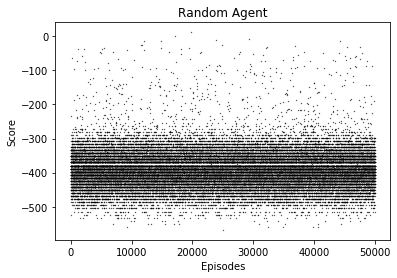

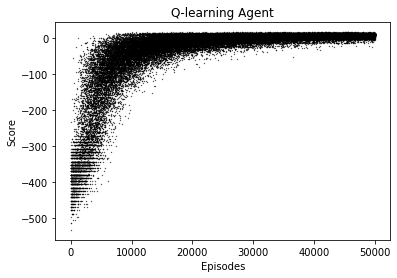

In [13]:
# Plot all agents
plt.plot(random_agent_scores, "ko", markersize=0.3)
plt.title("Random Agent")
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

plt.plot(q_agent_scores, "ko", markersize=0.3)
plt.title("Q-learning Agent")
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()